In [3]:
# import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
import glob

### Preprocessing 2024 Test data

In [5]:
# concatenate individial 2024 grid location files into a single merged dataset

def files_concat():
    
    # all 2024 grid location data stored here
    directory = "C:/Users/ngangaa/Documents/Classification_csvs_saved_here/A_file_for_metdata"
    
     #Use glob to get a list of all CSV files
    csv_files = glob.glob(os.path.join(directory, "*.csv"))

    # store each csv file as a list called list_of_dfs
    list_of_dfs = [pd.read_csv(file, encoding='latin-1') for file in csv_files]#for each file, read each file. each file named contained in list_of_dfs

    # merge all locations' files into 1
    merged_df = pd.concat(list_of_dfs, ignore_index=True)
    
    # Save merged file. Don't include index column
    merged_df.to_csv("C:/Users/ngangaa/Documents/Classification_csvs_saved_here/merged_2024.csv", index=False)

# function call    
files_concat()  

In [6]:
# split 2024's data by month
def split_data_by_month(file_path, output_dir):

    # read 2024's merged dataset 
    df = pd.read_csv(file_path)

    # make the output directory for each month's data. Ensure it exists. 
    os.makedirs(output_dir, exist_ok=True)

    # for each month
    for month in range(1, 13):
        # where rows in the Month column matches the current month number in for loop
        month_df = df[df['Month'] == month]
        
        # creae file path for that file
        output_file = os.path.join(output_dir, f"month_{month}.csv")

        # save that month's data to its own csv file
        month_df.to_csv(output_file, index=False)
        
        # ensure it's been saved. 
        print(f"Saved: {output_file}")

# input merged 2024 data
train_file = "C:/Users/ngangaa/Documents/Classification_csvs_saved_here/merged_2024.csv"

# folder for outputted 2024 data
train_output_dir = "C:/Users/ngangaa/Documents/Classification_csvs_saved_here/2024_files"

# function call
split_data_by_month(train_file, train_output_dir)


Saved: C:/Users/ngangaa/Documents/Classification_csvs_saved_here/2024_files\month_1.csv
Saved: C:/Users/ngangaa/Documents/Classification_csvs_saved_here/2024_files\month_2.csv
Saved: C:/Users/ngangaa/Documents/Classification_csvs_saved_here/2024_files\month_3.csv
Saved: C:/Users/ngangaa/Documents/Classification_csvs_saved_here/2024_files\month_4.csv
Saved: C:/Users/ngangaa/Documents/Classification_csvs_saved_here/2024_files\month_5.csv
Saved: C:/Users/ngangaa/Documents/Classification_csvs_saved_here/2024_files\month_6.csv
Saved: C:/Users/ngangaa/Documents/Classification_csvs_saved_here/2024_files\month_7.csv
Saved: C:/Users/ngangaa/Documents/Classification_csvs_saved_here/2024_files\month_8.csv
Saved: C:/Users/ngangaa/Documents/Classification_csvs_saved_here/2024_files\month_9.csv
Saved: C:/Users/ngangaa/Documents/Classification_csvs_saved_here/2024_files\month_10.csv
Saved: C:/Users/ngangaa/Documents/Classification_csvs_saved_here/2024_files\month_11.csv
Saved: C:/Users/ngangaa/Docume

### Loading 2000-2023 Training data

In [4]:
#Load each month's csv file into a df

# This is the directory where monthly files are stored
train_dir = "C:/Users/ngangaa/Documents/Regression_csvs_saved_here/Thesis_Monthly_Train"

# This dictionary stores DataFrames for each month
monthly_dfs = {}

# Each month's CSV file is loaded into a DataFrame
for month in range(1, 13):

    # construct file path for each month
    file_path = os.path.join(train_dir, f"month_{month}.csv")  

    # read each csv file into a df and store it in the monthly_dfs dictionary
    monthly_dfs[month] = pd.read_csv(file_path)          

# Show the first few rows of each month's data
print(monthly_dfs[1].head())
print(monthly_dfs[2].head())
print(monthly_dfs[3].head())
print(monthly_dfs[4].head())
print(monthly_dfs[5].head())
print(monthly_dfs[6].head())
print(monthly_dfs[7].head())
print(monthly_dfs[8].head())
print(monthly_dfs[9].head())
print(monthly_dfs[10].head())
print(monthly_dfs[11].head())
print(monthly_dfs[12].head())

   Year  Month  Day  pr(mm)  etr(mm)  rmax(%)  sph(kg/kg)  srad(Wm-2)  \
0  2000      1    1     0.3      2.2     85.0     0.00735        64.0   
1  2000      1    2     0.0      3.4     89.4     0.00845       118.9   
2  2000      1    3     0.0      4.2     92.3     0.00844       149.3   
3  2000      1    4     4.2      4.1     95.5     0.00825        92.4   
4  2000      1    5     0.0      3.3    100.0     0.00355       161.0   

   vs(mps)  th(DegreesClockwisefromnorth)  ClimateRegion  
0      1.9                            170              3  
1      2.7                            167              3  
2      3.1                            170              3  
3      5.9                            202              3  
4      4.2                            320              3  
   Year  Month  Day  pr(mm)  etr(mm)  rmax(%)  sph(kg/kg)  srad(Wm-2)  \
0  2000      2    1     0.0      3.4     90.7     0.00284       152.3   
1  2000      2    2     0.0      2.8     88.5     0.00281    

### Data preprocessing & Exploratory Data Analysis

In [27]:
# Display the percentage of missing values for each month

def check_missing_values(monthly_dfs):
    
    # empty dictionary stores % of missing values per month
    missing_values = {}
    
    # for each month
    for month, df in monthly_dfs.items():
        
        # calculate % of missing values in each column by counting the sum of missing values per column / length(# of rows) in the df
        missing_percentage = df.isnull().sum() / len(df) * 100
        
        # store percemtated in the dictionary 
        missing_values[month] = missing_percentage
    
    return pd.DataFrame(missing_values)


# function call
check_missing_values(monthly_dfs)

# print January's missing values)
print(missing_df[1])  


                                     1         2         3         4   \
Year                           0.000000  0.000000  0.000000  0.000000   
Month                          0.000000  0.000000  0.000000  0.000000   
Day                            0.000000  0.000000  0.000000  0.000000   
pr(mm)                         0.000000  0.000000  0.000000  0.000000   
etr(mm)                        2.631579  2.631579  2.631579  2.631579   
rmax(%)                        0.000000  0.000000  0.000000  0.000000   
sph(kg/kg)                     0.000000  0.000000  0.000000  0.000000   
srad(Wm-2)                     0.000000  0.000000  0.000000  0.000000   
vs(mps)                        0.000000  0.000000  0.000000  0.000000   
th(DegreesClockwisefromnorth)  0.000000  0.000000  0.000000  0.000000   
ClimateRegion                  0.000000  0.000000  0.000000  0.000000   

                                     5         6         7         8   \
Year                           0.000000  0.000000 

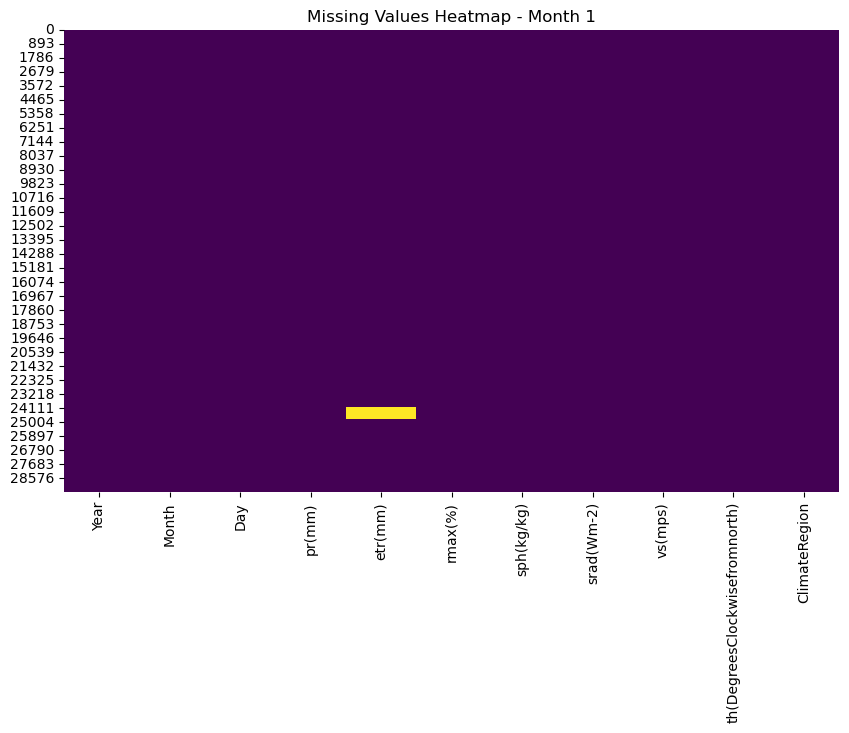

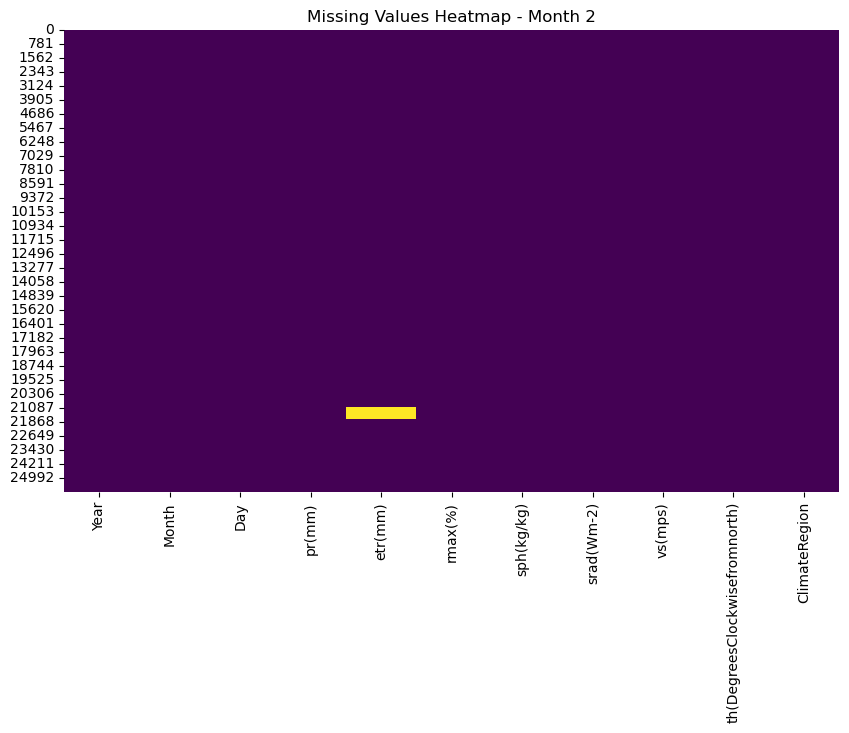

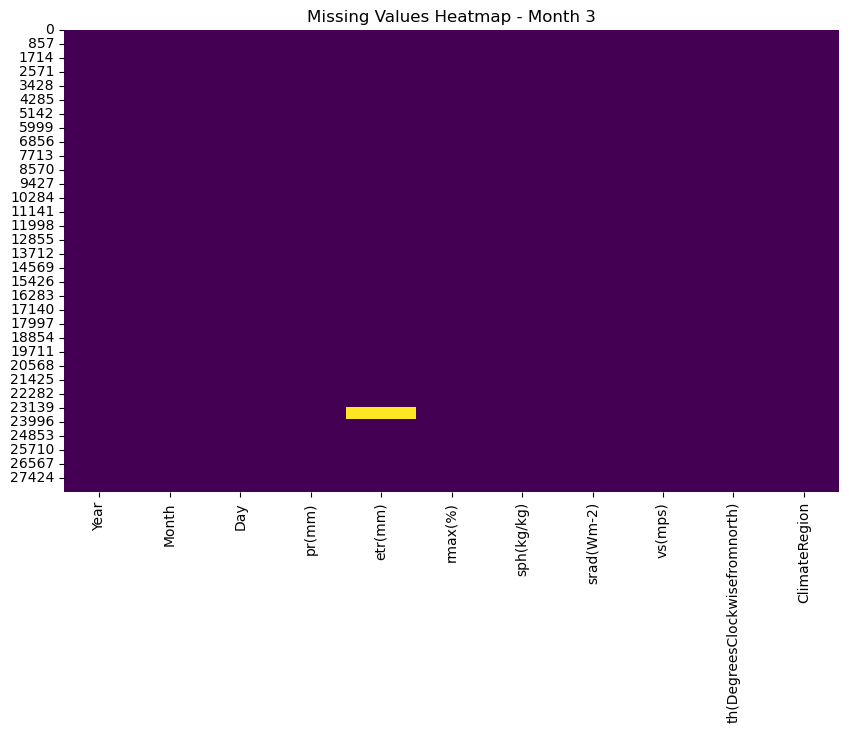

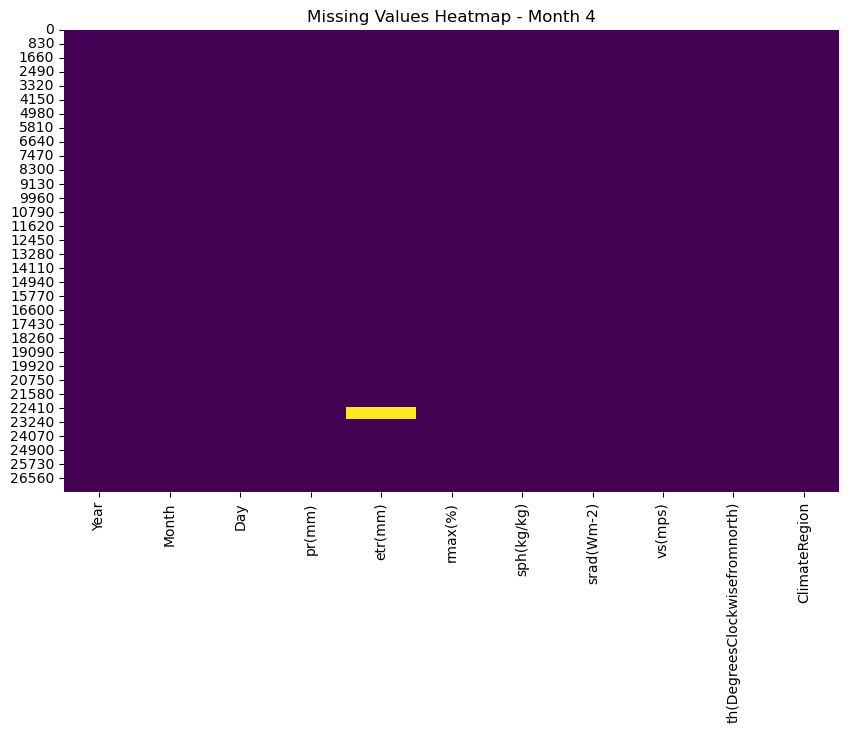

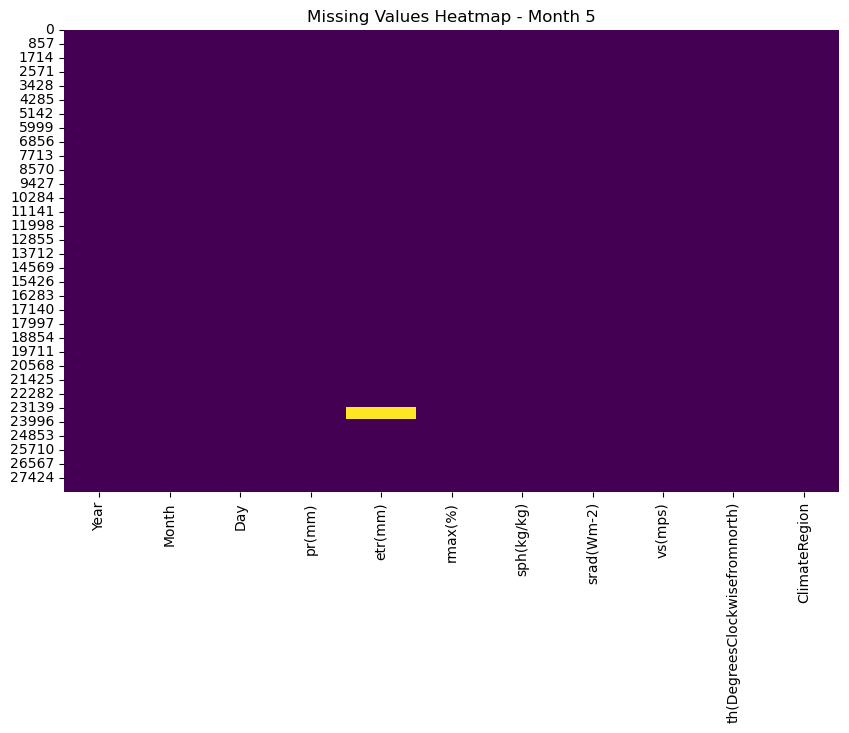

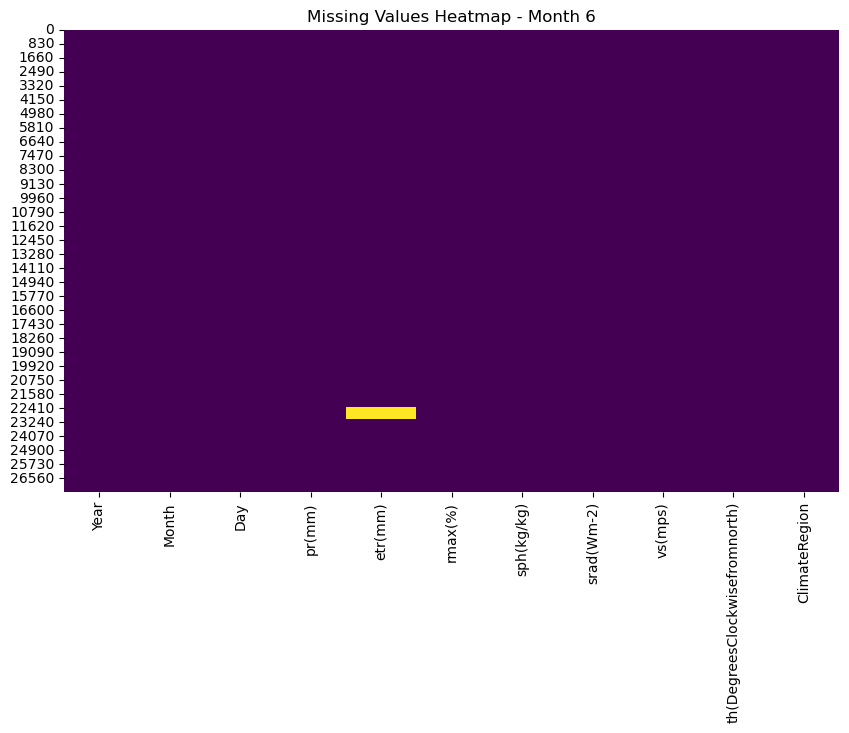

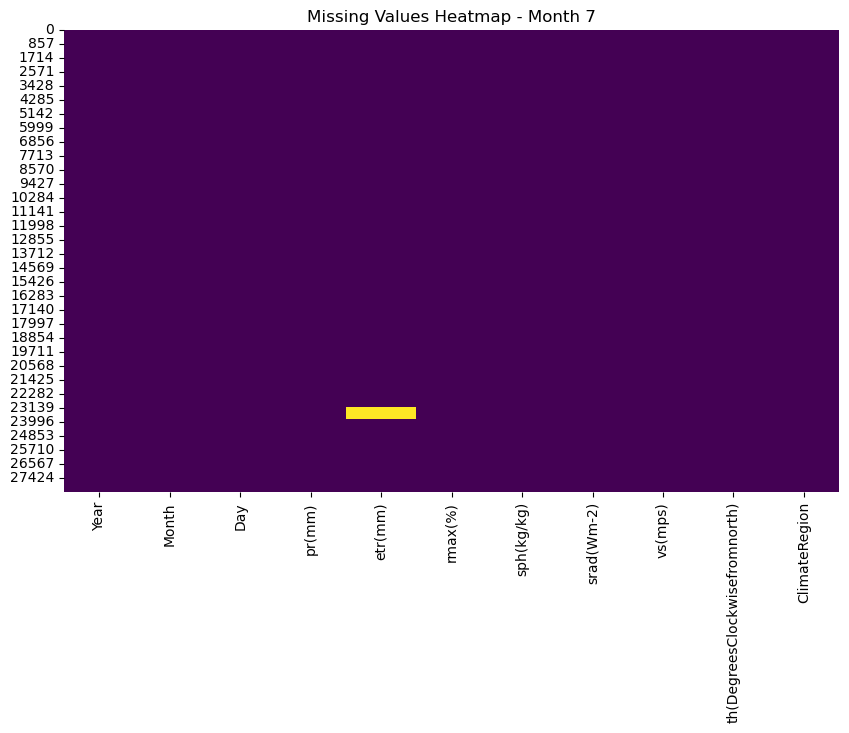

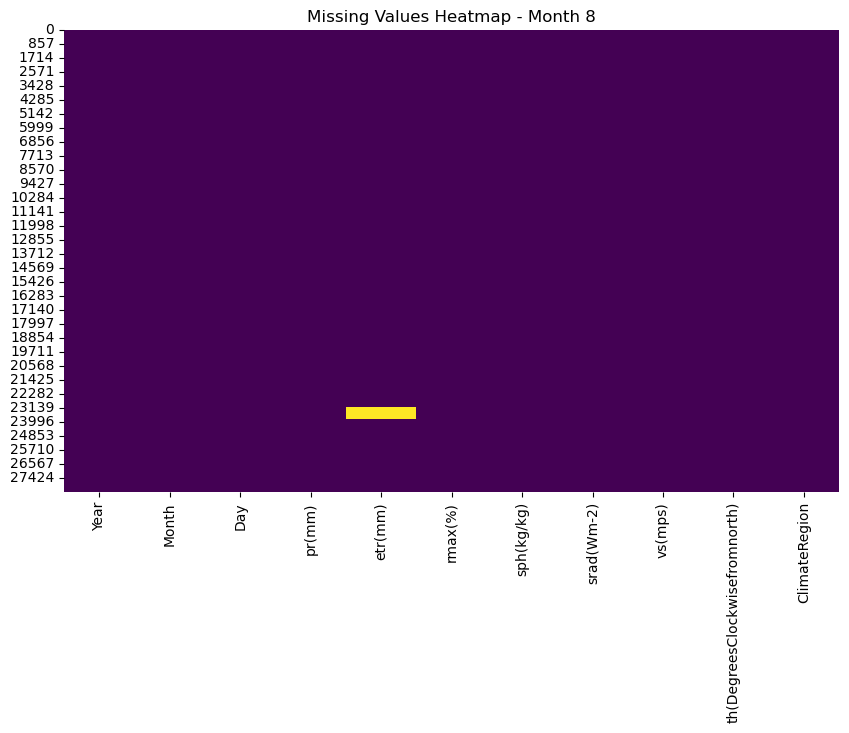

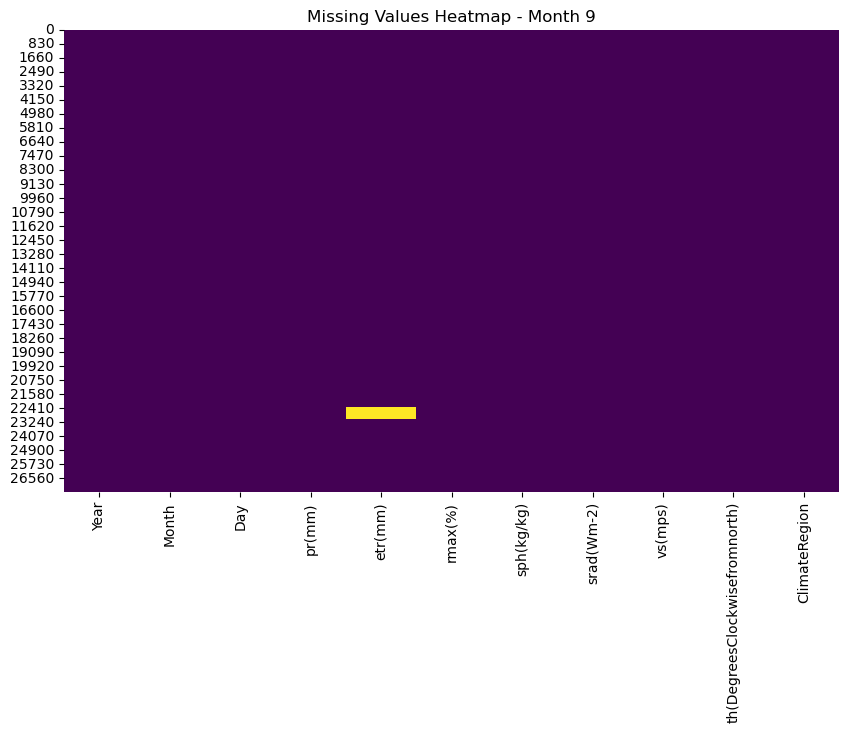

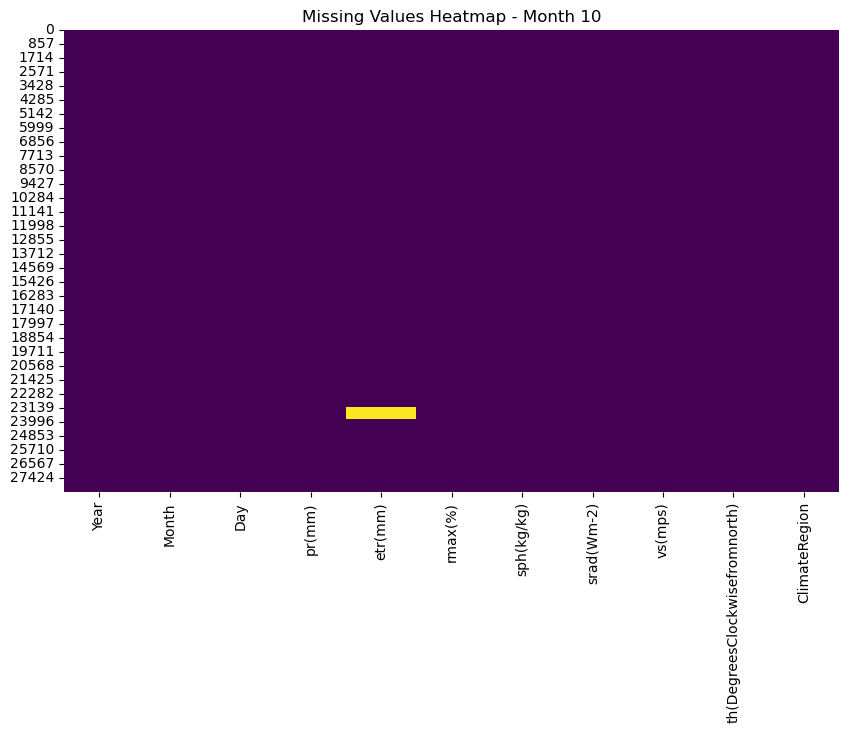

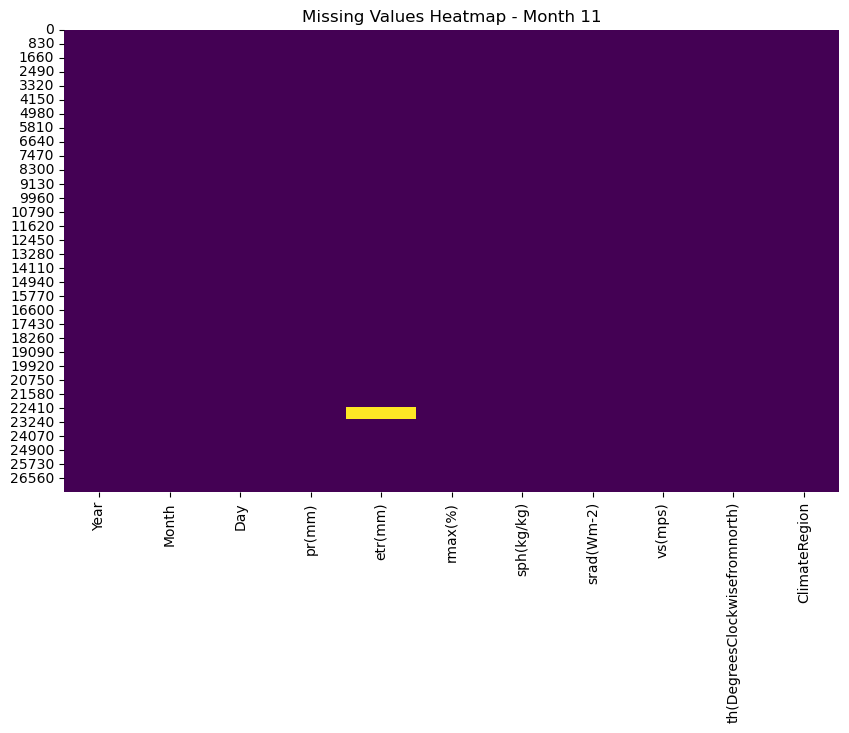

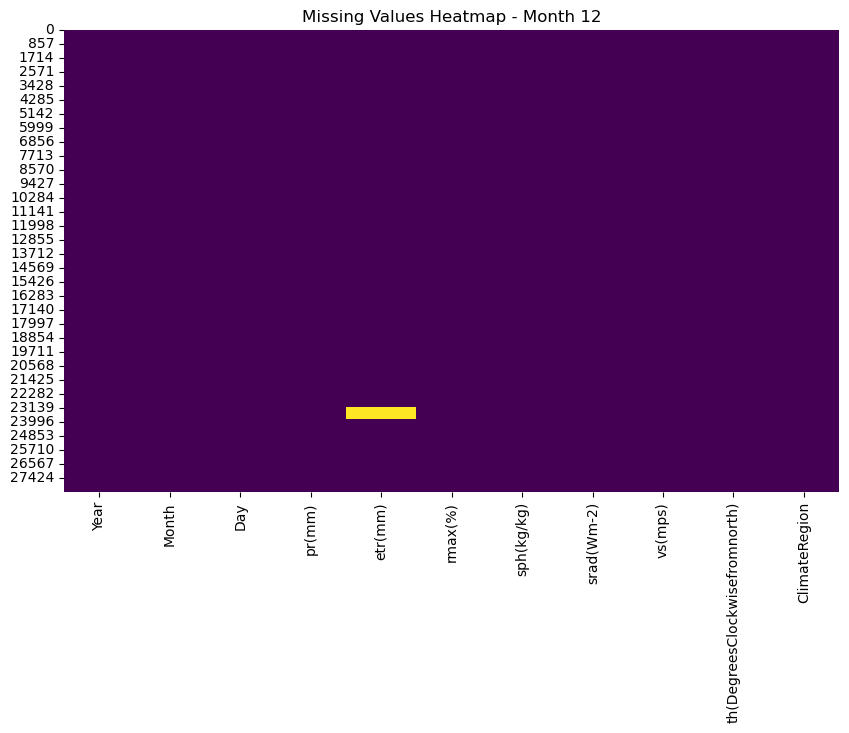

In [28]:
# create heat maps to show where missing values occur for each month in the training data

def plot_missing_values_heatmap(df, month):
    
    # specify heatmap size
    plt.figure(figsize=(10, 6))

    # visualize missing data with True for missing values and False otherwise.
    sns.heatmap(df.isnull(), cbar=False, cmap="viridis")

    # itertive title for each month
    plt.title(f"Missing Values Heatmap - Month {month}")
    plt.show()

# for each month's data
for month, df in monthly_dfs.items():
    
    # function call
    plot_missing_values_heatmap(df, month)


In [5]:
# median imputation for missing data

for month, df in monthly_dfs.items():
    # Fill missing values in the 'etr(mm)' column with the median of that column.
    df['etr(mm)'] = df['etr(mm)'].fillna(df['etr(mm)'].median())

# display remaining missing data    
monthly_dfs[12].isnull().sum()    

Year                             0
Month                            0
Day                              0
pr(mm)                           0
etr(mm)                          0
rmax(%)                          0
sph(kg/kg)                       0
srad(Wm-2)                       0
vs(mps)                          0
th(DegreesClockwisefromnorth)    0
ClimateRegion                    0
dtype: int64

In [31]:
monthly_dfs[12].head()

,Year,Month,Day,pr(mm),etr(mm),rmax(%),sph(kg/kg),srad(Wm-2),vs(mps),th(DegreesClockwisefromnorth),ClimateRegion
0,2000,12,1,0.0,2.7,81.0,0.00418,147.7,2.1,20,3
1,2000,12,2,0.7,2.8,85.1,0.00584,73.0,3.2,27,3
2,2000,12,3,0.0,2.8,81.5,0.00356,88.6,5.4,5,3
3,2000,12,4,0.0,3.6,71.7,0.00258,154.3,4.4,8,3
4,2000,12,5,0.0,3.4,72.1,0.00231,159.5,3.4,333,3


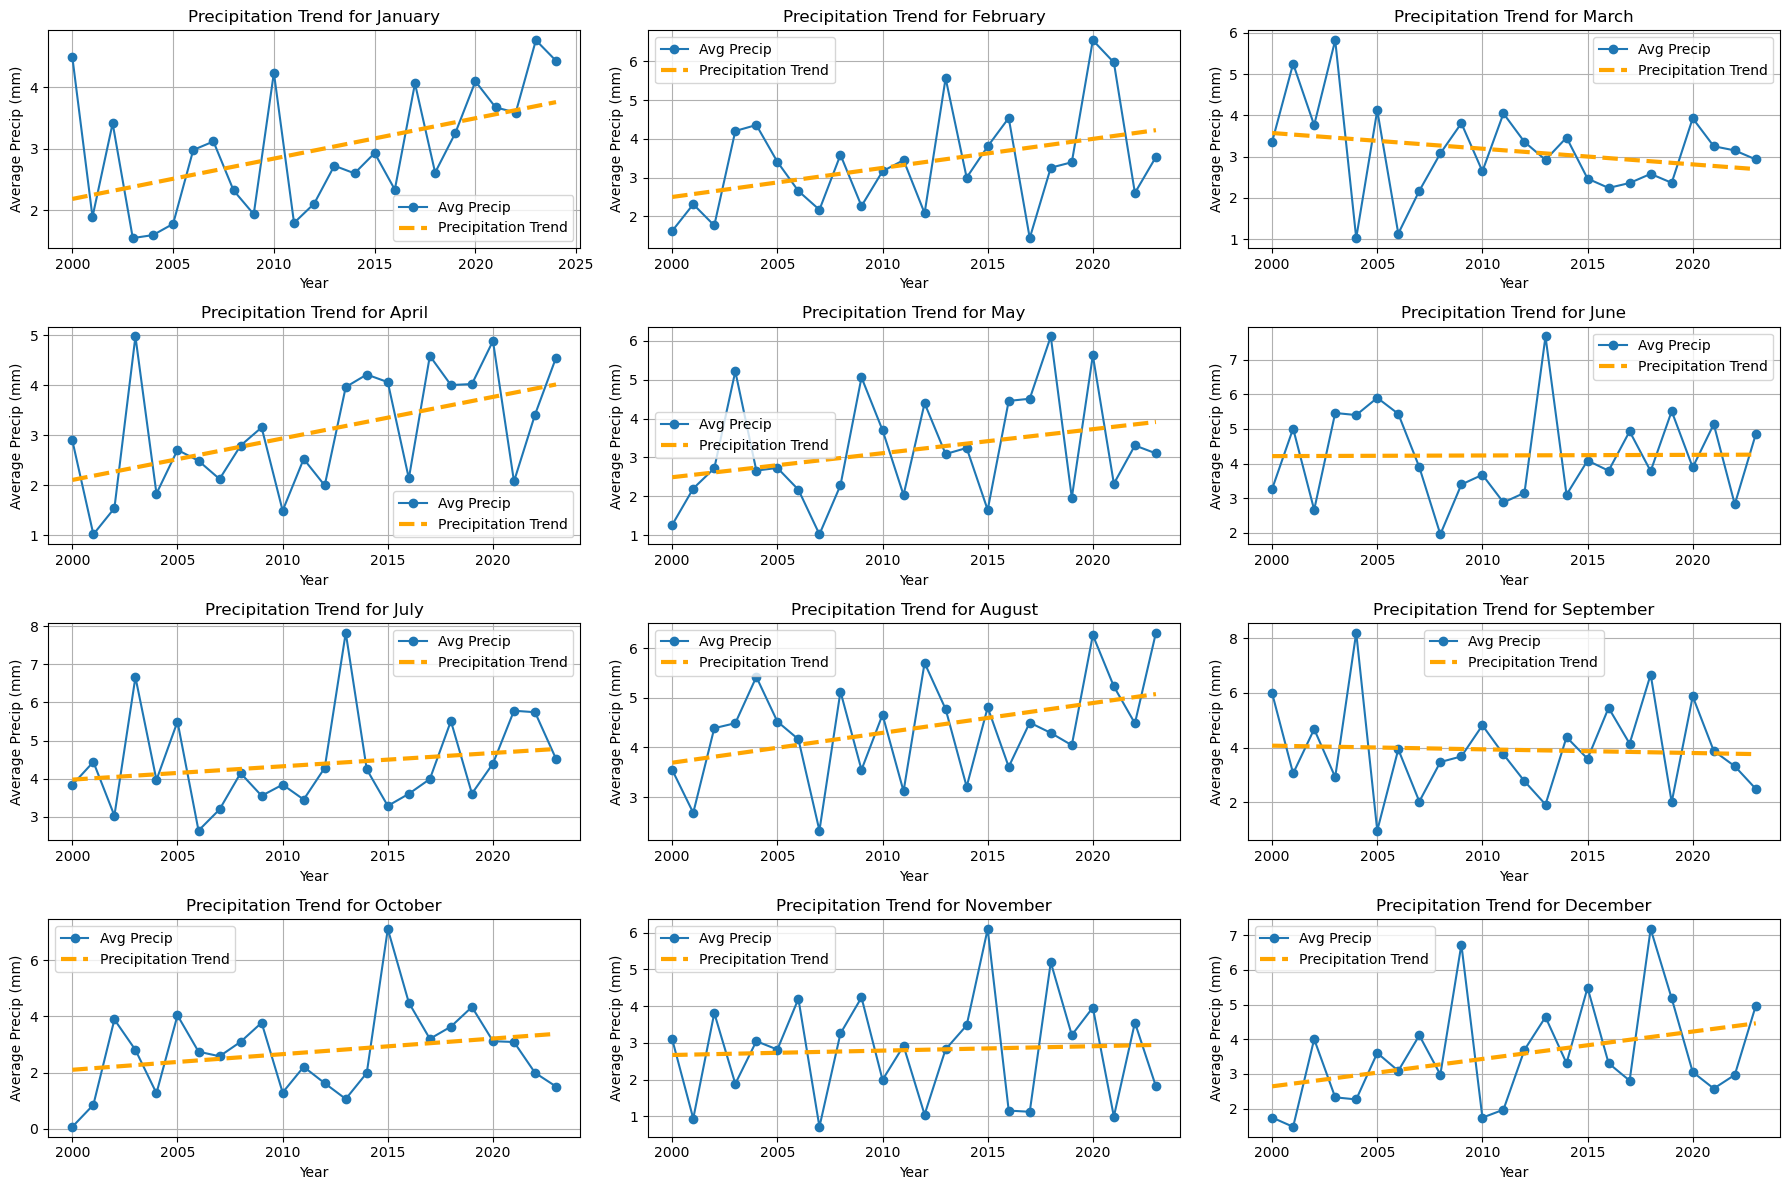

In [32]:
# Linear plots showing monthly average temperature trends from 2000–2023

#dfs contains DataFrames in order. eg January (dfs[0]), December (dfs[12])
dfs = [monthly_dfs[i] for i in range(1, 13)]
month_names = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

# Set up a 3-column layout
fig, axes = plt.subplots(4, 3, figsize=(18, 12))  
axes = axes.flatten() 

for i, df in enumerate(dfs):
     # Group the data by 'Year' and calculate the mean precipitation for each year.
    # e.g., calculate the avg precip per day for January 2000
    monthly_avg = df.groupby(df['Year'])['pr(mm)'].mean()

    # select corresponding axis for each month
    ax = axes[i]
    
    # Plot on corresponding subplot
    ax.plot(monthly_avg.index, monthly_avg.values, marker='o', linestyle='-', label='Avg Precip')
   
    # the index from monthly_avg is the years (2000, 2001, ..., 2023).
    trend = pd.Series(monthly_avg.index)

    # fit a linear polynomial to the precip data
    # x = the years (2000, 2001, ..., 2023) , y = computed avg precip per month series, degree 1 = linear trend
    z = np.polyfit(trend, monthly_avg.values, 1)
    
    # create a 1D polynomial object from the coefficients provided in the input 'z' variable
    p = np.poly1d(z)
    
    # Plot the trend line on the same plot.
    ax.plot(monthly_avg.index, p(monthly_avg.index), linestyle='--', linewidth=3, color='orange', label='Precipitation Trend')

    ax.set_xlabel("Year")
    ax.set_ylabel("Average Precip (mm)")
    ax.set_title(f"Precipitation Trend for {month_names[i]}")
    ax.grid(True)
    ax.legend()

#prevent overlapping
plt.tight_layout()
plt.show()


In [33]:
monthly_dfs[1].head()

,Year,Month,Day,pr(mm),etr(mm),rmax(%),sph(kg/kg),srad(Wm-2),vs(mps),th(DegreesClockwisefromnorth),ClimateRegion
0,2000,1,1,0.3,2.2,85.0,0.00735,64.0,1.9,170,3
1,2000,1,2,0.0,3.4,89.4,0.00845,118.9,2.7,167,3
2,2000,1,3,0.0,4.2,92.3,0.00844,149.3,3.1,170,3
3,2000,1,4,4.2,4.1,95.5,0.00825,92.4,5.9,202,3
4,2000,1,5,0.0,3.3,100.0,0.00355,161.0,4.2,320,3


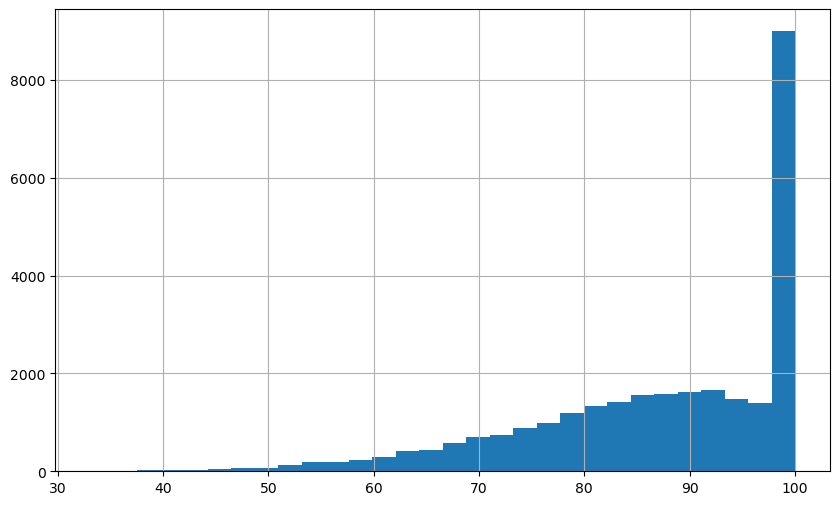

In [6]:
# histograms showing distribution of varables 

#precip_hist = monthly_dfs[12]['th(DegreesClockwisefromnorth)']
#precip_hist = monthly_dfs[12]['pr(mm)']
#precip_hist = monthly_dfs[12]['sph(kg/kg)']
precip_hist = monthly_dfs[12]['rmax(%)']

plt.figure(figsize=(10,6))  
precip_hist.hist(bins = 30)
plt.show()

In [8]:
# empty dictionary to store Pearson correlation values for each month.
pc = {}
for month, df in monthly_dfs.items():
    pearson = df.corr(method='pearson', min_periods=1)# Pearson correlation to find linear correlation for each month
    
    # Store correlation values for each month in the pc dictionary.
    pc[month] = pearson
    
pc[6]


,Year,Month,Day,pr(mm),etr(mm),rmax(%),sph(kg/kg),srad(Wm-2),vs(mps),th(DegreesClockwisefromnorth),ClimateRegion
Year,1.000000e+00,NaN,3.159002e-16,0.001439,0.022735,-0.072629,0.016508,0.131767,0.026617,-0.048483,6.063553e-14
Month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Day,3.159002e-16,NaN,1.000000e+00,-0.018641,0.093525,-0.071195,0.184262,-0.019785,-0.033318,0.050924,1.175355e-15
pr(mm),1.439385e-03,NaN,-1.864150e-02,1.000000,-0.344696,0.201604,0.194406,-0.433912,0.119159,-0.059119,3.356102e-02
etr(mm),2.273453e-02,NaN,9.352470e-02,-0.344696,1.000000,-0.390406,-0.107033,0.746408,0.186372,0.196751,1.682755e-01
rmax(%),-7.262868e-02,NaN,-7.119535e-02,0.201604,-0.390406,1.000000,0.425273,-0.333411,0.201575,-0.114936,1.011284e-01
sph(kg/kg),1.650762e-02,NaN,1.842624e-01,0.194406,-0.107033,0.425273,1.000000,-0.263420,0.132572,0.051758,2.822930e-01
srad(Wm-2),1.317671e-01,NaN,-1.978503e-02,-0.433912,0.746408,-0.333411,-0.263420,1.000000,-0.089784,0.105299,3.656917e-02
vs(mps),2.661666e-02,NaN,-3.331786e-02,0.119159,0.186372,0.201575,0.132572,-0.089784,1.000000,0.022127,1.849105e-01
th(DegreesClockwisefromnorth),-4.848252e-02,NaN,5.092422e-02,-0.059119,0.196751,-0.114936,0.051758,0.105299,0.022127,1.000000,-1.383154e-01


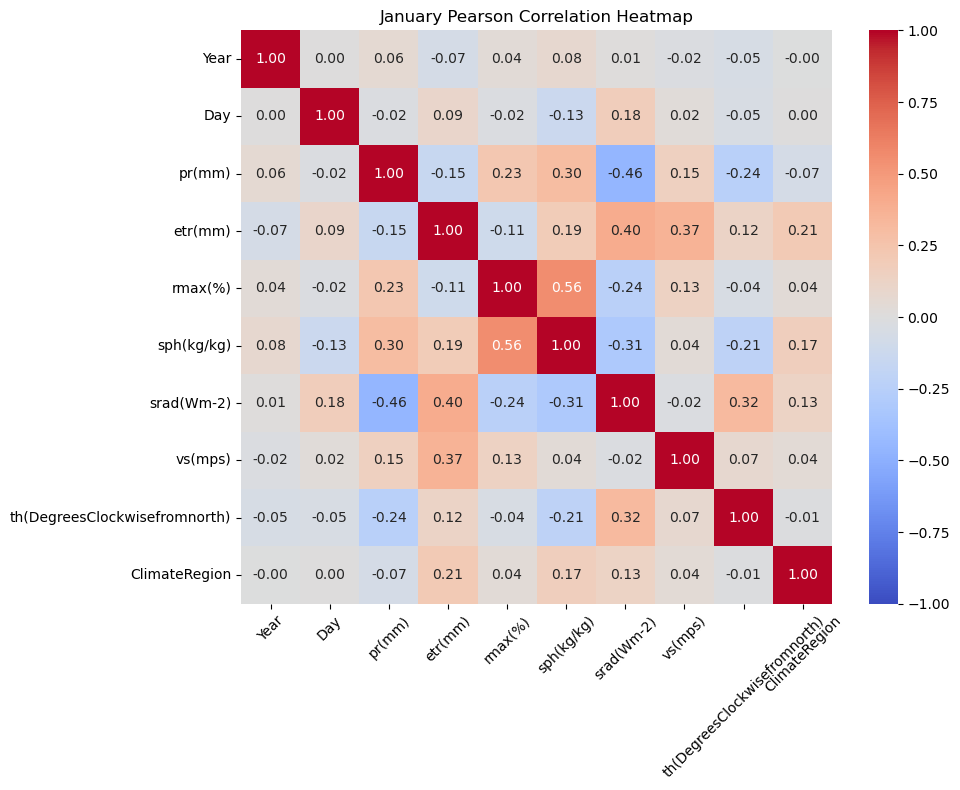

In [9]:
# Drop the 'Month' column
corr_matrix = pc[1].drop(columns='Month', errors='ignore')

# Drop the 'Month' row
corr_matrix = corr_matrix.drop(index='Month', errors='ignore')


# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("January Pearson Correlation Heatmap")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


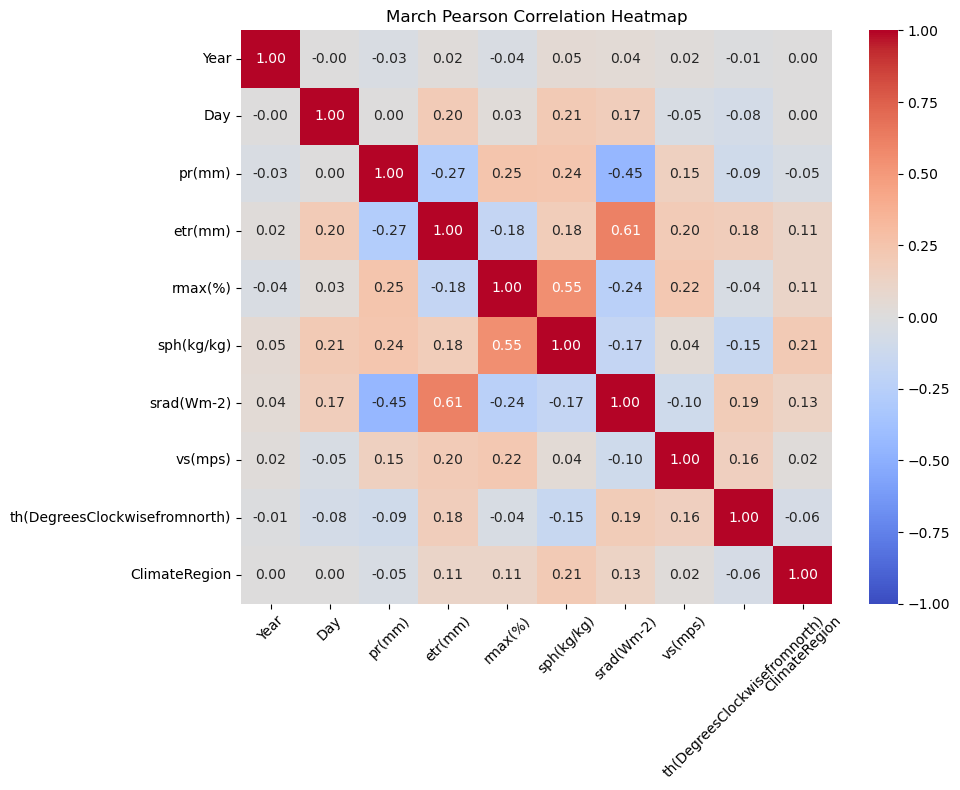

In [10]:
# Drop the 'Month' column
corr_matrix = pc[3].drop(columns='Month', errors='ignore')

# Drop the 'Month' row
corr_matrix = corr_matrix.drop(index='Month', errors='ignore')


# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("March Pearson Correlation Heatmap")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


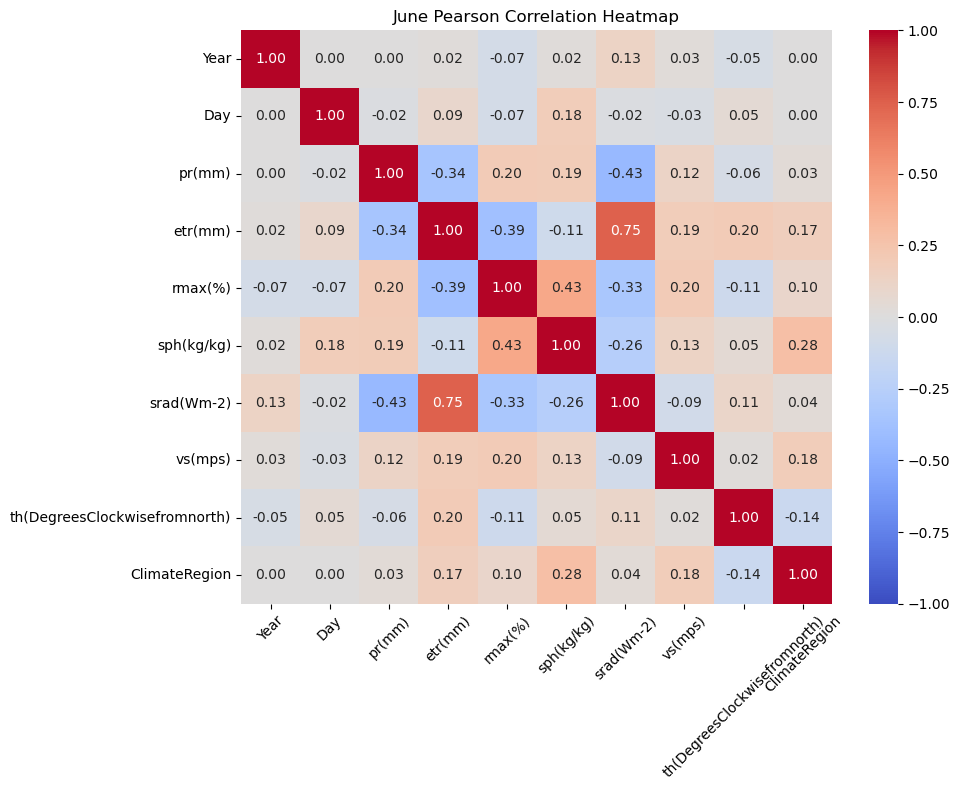

In [11]:
# Drop the 'Month' column
corr_matrix = pc[6].drop(columns='Month', errors='ignore')

# Drop the 'Month' row
corr_matrix = corr_matrix.drop(index='Month', errors='ignore')


# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("June Pearson Correlation Heatmap")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


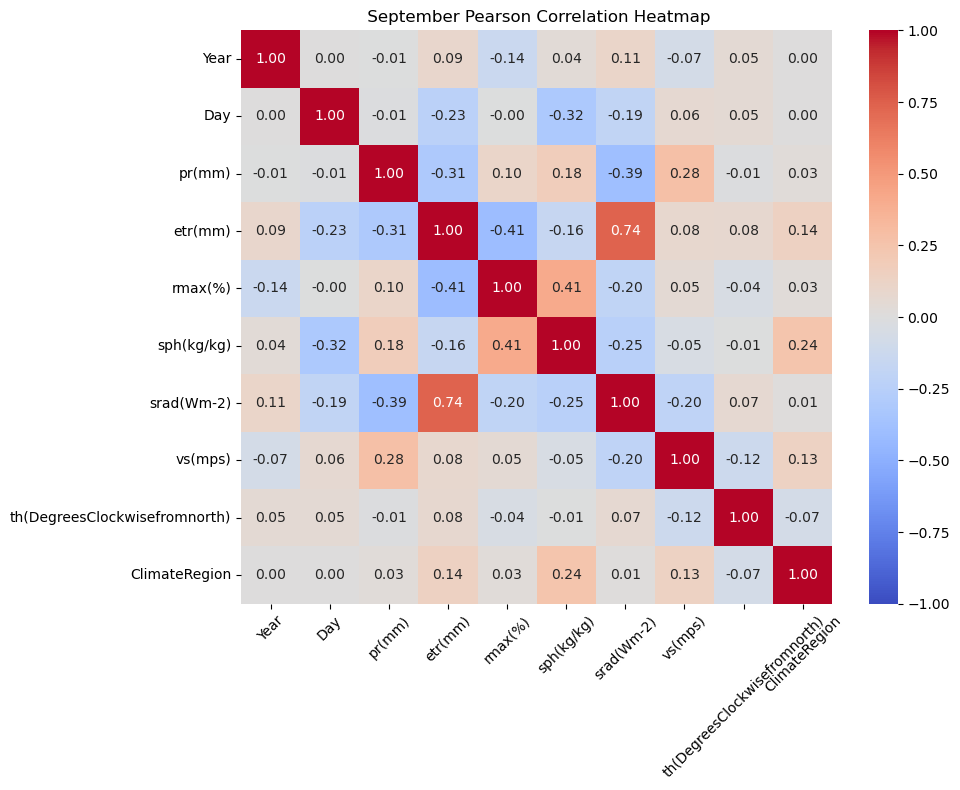

In [12]:
# Drop the 'Month' column
corr_matrix = pc[9].drop(columns='Month', errors='ignore')

# Drop the 'Month' row
corr_matrix = corr_matrix.drop(index='Month', errors='ignore')

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title(" September Pearson Correlation Heatmap")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# List of column names for which to calculate VIF.
features = ["etr(mm)", "rmax(%)", "sph(kg/kg)", "srad(Wm-2)", "vs(mps)", "th(DegreesClockwisefromnorth)"]
for month, df in monthly_dfs.items():
        
    # Only the columns listed in the features list above.
    X = df[features]

    # Add a constant for VIF calculation
    X_with_const = add_constant(X)

    # Create an empty DataFrame to store VIF results.
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X_with_const.columns

    # Calculate VIF for each feature using its column index in the numeric feature array
    vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

    # Display monthly VIF
    print(vif_data)


                         Feature        VIF
0                          const  60.159416
1                        etr(mm)   1.907622
2                        rmax(%)   1.722656
3                     sph(kg/kg)   2.083678
4                     srad(Wm-2)   1.654721
5                        vs(mps)   1.329588
6  th(DegreesClockwisefromnorth)   1.154981
                         Feature        VIF
0                          const  64.320762
1                        etr(mm)   2.287103
2                        rmax(%)   1.809317
3                     sph(kg/kg)   1.895242
4                     srad(Wm-2)   1.866468
5                        vs(mps)   1.248816
6  th(DegreesClockwisefromnorth)   1.120621
                         Feature        VIF
0                          const  73.152380
1                        etr(mm)   2.579356
2                        rmax(%)   1.891797
3                     sph(kg/kg)   2.083005
4                     srad(Wm-2)   2.134938
5                        vs(mps)

In [14]:
# create a copy of the initial monthly dictionary so as not to interfere with it
monthly_dfs_poly = monthly_dfs.copy()

# NOTE: Data was sorted by region, then date, due to the spatial and temporal dependencies.
# Creating lag and rolling features became an issue due to the Climate Region column
for month in range(1, 13):
    df = monthly_dfs_poly[month]

    # sort each df's values by climate region, then time. 
    df = df.sort_values(["ClimateRegion", "Year", "Month", "Day"])

    # create date column for future reference
    df["Date"] = pd.to_datetime(df[["Year","Month","Day"]])

    # Drop rows where Year == 2024
    df = df[df['Year'] != 2024]
    
    # Save to CSV
    df.to_csv(f"C:/Users/ngangaa/Documents/Regression_csvs_saved_here/poly_order_MONTH{month}.csv", index=False)
    
    # new updated dictionary containing all months' data 
    monthly_dfs_poly[month] = df


In [15]:
# Reset index for each month
for month in range(1, 13):
    monthly_dfs_poly[month] = monthly_dfs_poly[month].reset_index(drop=True)
# optional print statements.     
print(monthly_dfs_poly[1])
print(monthly_dfs_poly[2])
print(monthly_dfs_poly[3])
print(monthly_dfs_poly[4])
print(monthly_dfs_poly[5])
print(monthly_dfs_poly[6])
print(monthly_dfs_poly[7])
print(monthly_dfs_poly[8])
print(monthly_dfs_poly[9])
print(monthly_dfs_poly[10])
print(monthly_dfs_poly[11])
print(monthly_dfs_poly[12])




       Year  Month  Day  pr(mm)  etr(mm)  rmax(%)  sph(kg/kg)  srad(Wm-2)  \
0      2000      1    1     0.0      2.0     80.5     0.00646        59.5   
1      2000      1    1     0.0      1.7     88.5     0.00651        61.5   
2      2000      1    1     0.0      2.8     93.8     0.00577        72.9   
3      2000      1    1     0.0      2.4     90.8     0.00655        69.8   
4      2000      1    1     0.0      1.7     80.4     0.00615        74.1   
...     ...    ...  ...     ...      ...      ...         ...         ...   
28267  2023      1   31     0.7      2.8     67.4     0.00678        71.0   
28268  2023      1   31     0.0      2.4     72.4     0.00730        76.9   
28269  2023      1   31     0.0      2.3     76.8     0.00779        70.8   
28270  2023      1   31     0.8      1.9     66.9     0.00661        46.9   
28271  2023      1   31     0.0      2.1     76.7     0.00688        47.2   

       vs(mps)  th(DegreesClockwisefromnorth)  ClimateRegion       Date  
0

In [18]:
# count the # of values within each climatic region in January
category_counts = monthly_dfs_poly[1].groupby('ClimateRegion')['Day'].count()
category_counts

ClimateRegion
1    7440
2    9672
3    5952
4    5208
Name: Day, dtype: int64

# Model training and validation 

### Random Forest Regression; default hyperparameters  

In [16]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import r2_score 

# Function to split the precipitation time series into training and testing windows.
def split_data(precip_series, start, training_window, forecast_horizon):
    
    # Slice of the dataset for training to start on the start index, up to the training window length.
    training_data = precip_series[start : start + training_window]

    # Slice of the dataset to select the subsequent slice for testing to include the forecast horizon.
    testing_data = precip_series[start + training_window : start + training_window + forecast_horizon]
    return training_data, testing_data

#Run walk-forward cross-validation for a given window/ forecast horizon size.
def walk_forward_once(precip_series, training_window, forecast_horizon):
    #create lists to store R^2 scores for each training/testing window iteration.
    train_r2s, test_r2s = [], []

    # Loop over the series in increments of forecast_horizon to perform walk-forward validation.
    for start in range(0, len(precip_series) - training_window - forecast_horizon, forecast_horizon):
        # Split the data for this iteration using the split_data function.
        training_data, testing_data = split_data(precip_series, start, training_window, forecast_horizon)

        # X and y split;  drop the target 'pr(mm) and 'Date' columns if they exist.
        X_train = training_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        
        # define target column
        y_train = training_data['pr(mm)']

        # define features for testing
        X_test = testing_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_test = testing_data['pr(mm)']

        # One-hot encode the categorical variable 'ClimateRegion'
        X_train = pd.get_dummies(X_train, columns=['ClimateRegion'], prefix='Region')
        X_test = pd.get_dummies(X_test, columns=['ClimateRegion'], prefix='Region')

        # Align columns btw train and test
        X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

        # Initialize the rf regressor with default hyperparameters. random state =42 for reproducibility.
        rfmodel = RandomForestRegressor(n_estimators=100, random_state=42)
        # Fit the model on training data.
        rfmodel.fit(X_train, y_train)

        # Predict on the training data.
        y_train_pred = rfmodel.predict(X_train)
        # Predict on the testing data.
        y_test_pred = rfmodel.predict(X_test)

        # Calculate R^2 for training & testing data
        train_r2s.append(r2_score(y_train, y_train_pred))
        test_r2s.append(r2_score(y_test, y_test_pred))


    return np.mean(train_r2s), np.mean(test_r2s)


# Nested walk forward cv: Outer loop: test different fold sizes (3, 5, 10).
                        # Inner loop: test different train/test split ratios (2/3, 3/4,... 7/8).
def nested_walk_forward(precip_series, fold_sizes=[3,5,10], partition_ratios=None):
    if partition_ratios is None:
        # create train/test ratios from 2/3, 3/4, up to 11/12
        partition_ratios = [(i, i+1) for i in range(2, 12)]

    # Total number of rows in the dataset.
    n_rows = len(precip_series)
    
    # List to store results for all combinations of fold sizes and split ratios.
    results = []

    for fold_size in fold_sizes:
        # Determine the number of rows per fold.
        fold_length = n_rows // fold_size 

        for num, denom in partition_ratios:
            # Calculate training window length based on the partition ratio.
            train_size = (num * fold_length) // denom
            # Calculate testing window length.
            test_size = fold_length - train_size

            # this skips invalid splits where test size is zero or negative
            if test_size <= 0:
                continue

            # Run walk-forward once with the calculated train/test sizes and get average R^2.
            avg_train_r2, avg_test_r2 = walk_forward_once(
                precip_series,
                training_window=train_size,
                forecast_horizon=test_size
            )

           # Store the results in a dictionary and append to the results list.
            results.append({
                "fold_size": fold_size,
                "split": f"{num}/{denom}-{denom-num}/{denom}",
                "train_size": train_size,
                "test_size": test_size,
                "avg_train_r2": avg_train_r2,
                "avg_test_r2": avg_test_r2
            })

    return pd.DataFrame(results)

# Dictionary to store results for each month
monthly_results = {}

# Store the configuration with highest avg_test_r2 per month.
best_configs = {}

for month_idx in range(1, 13):
    # Run nested walk-forward validation function on each month's dataset.
    results_df = nested_walk_forward(monthly_dfs_poly[month_idx], fold_sizes=[3,5,10])

   # Store the results DataFrame for this month returned from the nested_walk_forward function
    monthly_results[month_idx] = results_df
    
   # Find the row with the highest testing R^2, i.e, the best performing configuration.
    best_config = results_df.loc[results_df['avg_test_r2'].idxmax()]

    # best _configs contains the best configuration for all months
    best_configs[month_idx] = best_config
    
    # print statement to confirm running function
    print(f"Best configuration for month {month_idx}:")
    
    # print the best configurations per month.
    print(best_config)


Best configuration for month 1:
fold_size              3
split            6/7-1/7
train_size          8077
test_size           1347
avg_train_r2    0.952156
avg_test_r2     0.343248
Name: 4, dtype: object
Best configuration for month 2:
fold_size              3
split            8/9-1/9
train_size          7633
test_size            955
avg_train_r2    0.955758
avg_test_r2      0.38048
Name: 6, dtype: object
Best configuration for month 3:
fold_size              3
split            7/8-1/8
train_size          8246
test_size           1178
avg_train_r2     0.94679
avg_test_r2     0.317204
Name: 5, dtype: object
Best configuration for month 4:
fold_size              3
split            6/7-1/7
train_size          7817
test_size           1303
avg_train_r2    0.944067
avg_test_r2     0.330643
Name: 4, dtype: object
Best configuration for month 5:
fold_size              3
split            5/6-1/6
train_size          7853
test_size           1571
avg_train_r2    0.919952
avg_test_r2     0.25612

### Compare monthly performance with seasonal performance. 
### Conclusion: Monthly perforemance was better

In [21]:
# load seasonal datasets
winter_df = pd.read_csv("C:/Users/ngangaa/Documents/Classification_csvs_saved_here/ordered_seasonwinter.csv")
spring_df = pd.read_csv("C:/Users/ngangaa/Documents/Classification_csvs_saved_here/ordered_seasonspring.csv")
summer_df = pd.read_csv("C:/Users/ngangaa/Documents/Classification_csvs_saved_here/ordered_seasonsummer.csv")
fall_df = pd.read_csv("C:/Users/ngangaa/Documents/Classification_csvs_saved_here/ordered_seasonfall.csv")

# make seasonal dictionary
seasonal_dfs = {
    'winter': winter_df,
    'spring': spring_df,
    'summer': summer_df,
    'fall': fall_df
}


In [22]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import r2_score 

# Function to split the precipitation time series into training and testing windows.
def split_data(precip_series, start, training_window, forecast_horizon):
    # Slice of the dataset for training to start on the start index, up to the training window length.
    training_data = precip_series[start : start + training_window]
    
    # Slice of the dataset to select the subsequent slice for testing to include the forecast horizon.
    testing_data = precip_series[start + training_window : start + training_window + forecast_horizon]
    return training_data, testing_data

#Run walk-forward cross-validation for a given window/ forecast horizon size.
def walk_forward_once(precip_series, training_window, forecast_horizon):
    #create lists to store R^2 scores for each training/testing window iteration.
    train_r2s, test_r2s = [], []

    # Loop over the series in increments of forecast_horizon to perform walk-forward validation.
    for start in range(0, len(precip_series) - training_window - forecast_horizon, forecast_horizon):
        # Split the data for this iteration using the split_data function.
        training_data, testing_data = split_data(precip_series, start, training_window, forecast_horizon)

        # X and y split;  drop the target 'pr(mm) and 'Date' columns if they exist.
        X_train = training_data.drop(columns=['pr(mm)'], errors='ignore')
        # define target column
        y_train = training_data['pr(mm)']

        # define features for testing
        X_test = testing_data.drop(columns=['pr(mm)'], errors='ignore')
        y_test = testing_data['pr(mm)']

        # One-hot encode the categorical variable 'ClimateRegion'
        X_train = pd.get_dummies(X_train, columns=['ClimateRegion'], prefix='Region')
        X_test = pd.get_dummies(X_test, columns=['ClimateRegion'], prefix='Region')

        # Align columns btw train and test
        X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

        # Initialize the rf regressor with default hyperparameters. random state =42 for reproducibility.
        rfmodel = RandomForestRegressor(n_estimators=100, random_state=42)
        
        # Fit the model on training data.
        rfmodel.fit(X_train, y_train)

        # Predict on the training data.
        y_train_pred = rfmodel.predict(X_train)
        # Predict on the testing data.
        y_test_pred = rfmodel.predict(X_test)

        # Calculate R^2 for training & testing data
        train_r2s.append(r2_score(y_train, y_train_pred))
        test_r2s.append(r2_score(y_test, y_test_pred))

    return np.mean(train_r2s), np.mean(test_r2s)



# Nested walk forward cv: Outer loop: test different fold sizes (3, 5, 10).
                        # Inner loop: test different train/test split ratios (2/3, 3/4,... 7/8).
def nested_walk_forward(precip_series, fold_sizes=[3,5,10], partition_ratios=None):
    if partition_ratios is None:
        # create train/test ratios from 2/3, 3/4, up to 11/12
        partition_ratios = [(i, i+1) for i in range(2, 12)]
        
    # Total number of rows in the dataset.
    n_rows = len(precip_series)
    
    # List to store results for all combinations of fold sizes and split ratios.  
    results = []

    for fold_size in fold_sizes:
        # Determine the number of rows per fold. 
        fold_length = n_rows // fold_size

        for num, denom in partition_ratios:
             # Calculate training window length based on the partition ratio.           
            train_size = (num * fold_length) // denom
            
            # Calculate testing window length.
            test_size = fold_length - train_size
            
            # this skips invalid splits where test size is zero or negative
            if test_size <= 0:
                continue 
                
            # Run walk-forward once with the calculated train/test sizes and get average R^2.
            avg_train_r2, avg_test_r2 = walk_forward_once(
                precip_series,
                training_window=train_size,
                forecast_horizon=test_size
            )
            
           # Store the results in a dictionary and append to the results list.
            results.append({
                "fold_size": fold_size,
                "split": f"{num}/{denom}-{denom-num}/{denom}",
                "train_size": train_size,
                "test_size": test_size,
                "avg_train_r2": avg_train_r2,
                "avg_test_r2": avg_test_r2
            })

    return pd.DataFrame(results)

# Dictionary to store results for each month
seasonal_results = {}

# Loop over season 1 through 4
best_configs = {}

for season in seasonal_dfs:  # iterates over 'winter', 'spring', 'summer', 'fall'
    results_df = nested_walk_forward(seasonal_dfs[season], fold_sizes=[3, 5, 10])
    seasonal_results[season] = results_df
    best_config = results_df.loc[results_df['avg_test_r2'].idxmax()]
    # will contain only the best config per month
    best_configs[season] = best_config
    
    print(f"Best configuration for {season}:")
    print(best_config)


Best configuration for winter:
fold_size              3
split            7/8-1/8
train_size         24006
test_size           3430
avg_train_r2    0.956195
avg_test_r2     0.124124
Name: 5, dtype: object
Best configuration for spring:
fold_size              3
split            7/8-1/8
train_size         24472
test_size           3496
avg_train_r2    0.943054
avg_test_r2     0.178884
Name: 5, dtype: object
Best configuration for summer:
fold_size              3
split            3/4-1/4
train_size         20976
test_size           6992
avg_train_r2     0.91107
avg_test_r2     0.127878
Name: 1, dtype: object
Best configuration for fall:
fold_size              3
split            3/4-1/4
train_size         20748
test_size           6916
avg_train_r2    0.944872
avg_test_r2     0.146201
Name: 1, dtype: object


### The code below investigates RF performance after including lag_1 features & rolling averages

#### default hyperparematers : default features + lag_1

In [27]:
lag1_monthly= {}

# monthly_dfs_poly contains the monthly datasets 
for month, df in monthly_dfs_poly.items():
    lag1_monthly[month] = df.copy()
    print(lag1_monthly[month])
    
main_features = ['etr(mm)','rmax(%)','sph(kg/kg)','srad(Wm-2)','vs(mps)']

for month, df in lag1_monthly.items():
    for feature in main_features:
        df[f'{feature}_lag1'] = df.groupby("ClimateRegion")[feature].shift(1)
        df[f'{feature}_lag1'] = df[f'{feature}_lag1'].fillna(df[f'{feature}_lag1'].mean())
    lag1_monthly[month]= df
    (print(lag1_monthly[month]))

       Year  Month  Day  pr(mm)  etr(mm)  rmax(%)  sph(kg/kg)  srad(Wm-2)  \
0      2000      1    1     0.0      2.0     80.5     0.00646        59.5   
1      2000      1    1     0.0      1.7     88.5     0.00651        61.5   
2      2000      1    1     0.0      2.8     93.8     0.00577        72.9   
3      2000      1    1     0.0      2.4     90.8     0.00655        69.8   
4      2000      1    1     0.0      1.7     80.4     0.00615        74.1   
...     ...    ...  ...     ...      ...      ...         ...         ...   
28267  2023      1   31     0.7      2.8     67.4     0.00678        71.0   
28268  2023      1   31     0.0      2.4     72.4     0.00730        76.9   
28269  2023      1   31     0.0      2.3     76.8     0.00779        70.8   
28270  2023      1   31     0.8      1.9     66.9     0.00661        46.9   
28271  2023      1   31     0.0      2.1     76.7     0.00688        47.2   

       vs(mps)  th(DegreesClockwisefromnorth)  ClimateRegion       Date  
0

In [29]:

# dictionary containing best rf train/test sizes; default parameters
best_configs_rf = {
    1: {'train_size': 8077, 'test_size': 1347},
    2: {'train_size': 7633, 'test_size': 955},
    3: {'train_size': 8246, 'test_size': 1178},
    4: {'train_size': 7817, 'test_size': 1303},
    5: {'train_size': 7853, 'test_size': 1571},
    6: {'train_size': 7600, 'test_size': 1520},
    7: {'train_size': 7539, 'test_size': 1885},
    8: {'train_size':8246, 'test_size':1178},
    9: {'train_size':7296, 'test_size':1824 },
    10: {'train_size': 7539 , 'test_size':1885},
    11: {'train_size':7980, 'test_size': 1140},
    12: {'train_size': 8481, 'test_size':943},
}

def split_data(precip_series, start, training_window, forecast_horizon):
    training_data = precip_series[start : start + training_window]
    testing_data = precip_series[start + training_window : start + training_window + forecast_horizon]
    return training_data, testing_data

#  Walk-forward cv with rf 
def walk_forward_once_rf(precip_series, training_window, forecast_horizon):
    train_r2s, test_r2s = [], []

    for start in range(0, len(precip_series) - training_window - forecast_horizon, forecast_horizon):
        training_data, testing_data = split_data(precip_series, start, training_window, forecast_horizon)

        # X/y split
        X_train = training_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_train = training_data['pr(mm)']
        X_test = testing_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_test = testing_data['pr(mm)']

        # One-hot encode
        X_train = pd.get_dummies(X_train, columns=['ClimateRegion'], prefix='Region')
        X_test = pd.get_dummies(X_test, columns=['ClimateRegion'], prefix='Region')
        
        X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

        rfmodel = RandomForestRegressor(n_estimators=100, random_state=42)

        rfmodel.fit(X_train, y_train)

        # Predictions
        y_train_pred = rfmodel.predict(X_train)
        y_test_pred = rfmodel.predict(X_test)

        # R2 scores
        train_r2s.append(r2_score(y_train, y_train_pred))
        test_r2s.append(r2_score(y_test, y_test_pred))

    return np.mean(train_r2s), np.mean(test_r2s)

# Walk-forward cv with default parameters 
monthly_results_rf = {}

for month_idx in range(1, 13):
    print(f"\nWalk-forward evaluation for month {month_idx}...")
    config = best_configs_rf[month_idx]
    train_size = config['train_size']
    test_size = config['test_size']

    avg_train_r2, avg_test_r2 = walk_forward_once_rf(
        lag1_monthly[month_idx],
        training_window=train_size,
        forecast_horizon=test_size    )

    monthly_results_rf[month_idx] = {
        'train_r2': avg_train_r2,
        'test_r2': avg_test_r2,
    }
    print(f"Month {month_idx}: Train R²={avg_train_r2:.3f}, Test R²={avg_test_r2:.3f}")



Walk-forward evaluation for month 1...
Month 1: Train R²=0.946, Test R²=0.317

Walk-forward evaluation for month 2...
Month 2: Train R²=0.949, Test R²=0.364

Walk-forward evaluation for month 3...
Month 3: Train R²=0.939, Test R²=0.295

Walk-forward evaluation for month 4...
Month 4: Train R²=0.938, Test R²=0.322

Walk-forward evaluation for month 5...
Month 5: Train R²=0.915, Test R²=0.245

Walk-forward evaluation for month 6...
Month 6: Train R²=0.907, Test R²=0.196

Walk-forward evaluation for month 7...
Month 7: Train R²=0.893, Test R²=0.123

Walk-forward evaluation for month 8...
Month 8: Train R²=0.897, Test R²=0.125

Walk-forward evaluation for month 9...
Month 9: Train R²=0.928, Test R²=0.227

Walk-forward evaluation for month 10...
Month 10: Train R²=0.929, Test R²=0.272

Walk-forward evaluation for month 11...
Month 11: Train R²=0.944, Test R²=0.272

Walk-forward evaluation for month 12...
Month 12: Train R²=0.942, Test R²=0.319


#### default hyperparematers : default features + lag_1 +rolling_7
 

In [37]:
rolling7_monthly= {}

for month, df in lag1_monthly.items():
    rolling7_monthly[month] = df.copy()
print(rolling7_monthly[1])
    

main_features = ['etr(mm)','rmax(%)','sph(kg/kg)','srad(Wm-2)','vs(mps)']

for month, df in rolling7_monthly.items():
    for feature in main_features:
        df[f'{feature}_rolling7'] = df.groupby("ClimateRegion")[feature].transform(lambda x: x.shift(1).rolling(7).mean())
        df[f'{feature}_rolling7'] = df[f'{feature}_rolling7'].fillna(df[f'{feature}_rolling7'].mean())
    rolling7_monthly[month]= df
print(rolling7_monthly[1])

       Year  Month  Day  pr(mm)  etr(mm)  rmax(%)  sph(kg/kg)  srad(Wm-2)  \
0      2000      1    1     0.0      2.0     80.5     0.00646        59.5   
1      2000      1    1     0.0      1.7     88.5     0.00651        61.5   
2      2000      1    1     0.0      2.8     93.8     0.00577        72.9   
3      2000      1    1     0.0      2.4     90.8     0.00655        69.8   
4      2000      1    1     0.0      1.7     80.4     0.00615        74.1   
...     ...    ...  ...     ...      ...      ...         ...         ...   
28267  2023      1   31     0.7      2.8     67.4     0.00678        71.0   
28268  2023      1   31     0.0      2.4     72.4     0.00730        76.9   
28269  2023      1   31     0.0      2.3     76.8     0.00779        70.8   
28270  2023      1   31     0.8      1.9     66.9     0.00661        46.9   
28271  2023      1   31     0.0      2.1     76.7     0.00688        47.2   

       vs(mps)  th(DegreesClockwisefromnorth)  ClimateRegion       Date  \


In [38]:

# dictionary containing best rf train/test sizes; default parameters
best_configs_rf = {
    1: {'train_size': 8077, 'test_size': 1347},
    2: {'train_size': 7633, 'test_size': 955},
    3: {'train_size': 8246, 'test_size': 1178},
    4: {'train_size': 7817, 'test_size': 1303},
    5: {'train_size': 7853, 'test_size': 1571},
    6: {'train_size': 7600, 'test_size': 1520},
    7: {'train_size': 7539, 'test_size': 1885},
    8: {'train_size':8246, 'test_size':1178},
    9: {'train_size':7296, 'test_size':1824 },
    10: {'train_size': 7539 , 'test_size':1885 },
    11: {'train_size':7980, 'test_size': 1140},
    12: {'train_size': 8481, 'test_size':943},
}

def split_data(precip_series, start, training_window, forecast_horizon):
    training_data = precip_series[start : start + training_window]
    testing_data = precip_series[start + training_window : start + training_window + forecast_horizon]
    return training_data, testing_data

#  Walk-forward cv with rf 
def walk_forward_once_rf(precip_series, training_window, forecast_horizon):
    train_r2s, test_r2s = [], []

    for start in range(0, len(precip_series) - training_window - forecast_horizon, forecast_horizon):
        training_data, testing_data = split_data(precip_series, start, training_window, forecast_horizon)

        # X/y split
        X_train = training_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_train = training_data['pr(mm)']
        X_test = testing_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_test = testing_data['pr(mm)']

        # One-hot encode
        X_train = pd.get_dummies(X_train, columns=['ClimateRegion'], prefix='Region')
        X_test = pd.get_dummies(X_test, columns=['ClimateRegion'], prefix='Region')
        
        X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

        rfmodel = RandomForestRegressor(n_estimators=100, random_state=42)

        rfmodel.fit(X_train, y_train)

        # Predictions
        y_train_pred = rfmodel.predict(X_train)
        y_test_pred = rfmodel.predict(X_test)

        # R² scores
        train_r2s.append(r2_score(y_train, y_train_pred))
        test_r2s.append(r2_score(y_test, y_test_pred))

    return np.mean(train_r2s), np.mean(test_r2s)

# Walk-forward cv with default parameters 
monthly_results_rf = {}

for month_idx in range(1, 13):
    print(f"\nWalk-forward evaluation for month {month_idx}...")
    config = best_configs_rf[month_idx]
    train_size = config['train_size']
    test_size = config['test_size']

    avg_train_r2, avg_test_r2 = walk_forward_once_rf(
        rolling7_monthly[month_idx],
        training_window=train_size,
        forecast_horizon=test_size    )

    monthly_results_rf[month_idx] = {
        'train_r2': avg_train_r2,
        'test_r2': avg_test_r2,
    }
    print(f"Month {month_idx}: Train R²={avg_train_r2:.3f}, Test R²={avg_test_r2:.3f}")



Walk-forward evaluation for month 1...
Month 1: Train R²=0.947, Test R²=0.294

Walk-forward evaluation for month 2...
Month 2: Train R²=0.949, Test R²=0.349

Walk-forward evaluation for month 3...
Month 3: Train R²=0.941, Test R²=0.269

Walk-forward evaluation for month 4...
Month 4: Train R²=0.939, Test R²=0.302

Walk-forward evaluation for month 5...
Month 5: Train R²=0.917, Test R²=0.224

Walk-forward evaluation for month 6...
Month 6: Train R²=0.908, Test R²=0.193

Walk-forward evaluation for month 7...
Month 7: Train R²=0.895, Test R²=0.105

Walk-forward evaluation for month 8...
Month 8: Train R²=0.899, Test R²=0.102

Walk-forward evaluation for month 9...
Month 9: Train R²=0.930, Test R²=0.209

Walk-forward evaluation for month 10...
Month 10: Train R²=0.935, Test R²=0.231

Walk-forward evaluation for month 11...
Month 11: Train R²=0.945, Test R²=0.258

Walk-forward evaluation for month 12...
Month 12: Train R²=0.943, Test R²=0.301


#### default hyperparematers : default features + lag_1 + rolling_7 + rolling_14


In [40]:
rolling14_monthly= {}

for month, df in rolling7_monthly.items():
    rolling14_monthly[month] = df.copy()
print(rolling14_monthly[1])
    
main_features = ['etr(mm)','rmax(%)','sph(kg/kg)','srad(Wm-2)','vs(mps)']

for month, df in rolling14_monthly.items():
    for feature in main_features: # 'etr(mm)'
        df[f'{feature}_rolling14'] = df.groupby("ClimateRegion")[feature].transform(lambda x: x.shift(1).rolling(14).mean())
        df[f'{feature}_rolling14'] = df[f'{feature}_rolling14'].fillna(df[f'{feature}_rolling14'].mean())
    rolling14_monthly[month]= df
print(rolling14_monthly[1])

       Year  Month  Day  pr(mm)  etr(mm)  rmax(%)  sph(kg/kg)  srad(Wm-2)  \
0      2000      1    1     0.0      2.0     80.5     0.00646        59.5   
1      2000      1    1     0.0      1.7     88.5     0.00651        61.5   
2      2000      1    1     0.0      2.8     93.8     0.00577        72.9   
3      2000      1    1     0.0      2.4     90.8     0.00655        69.8   
4      2000      1    1     0.0      1.7     80.4     0.00615        74.1   
...     ...    ...  ...     ...      ...      ...         ...         ...   
28267  2023      1   31     0.7      2.8     67.4     0.00678        71.0   
28268  2023      1   31     0.0      2.4     72.4     0.00730        76.9   
28269  2023      1   31     0.0      2.3     76.8     0.00779        70.8   
28270  2023      1   31     0.8      1.9     66.9     0.00661        46.9   
28271  2023      1   31     0.0      2.1     76.7     0.00688        47.2   

       vs(mps)  th(DegreesClockwisefromnorth)  ...  etr(mm)_lag1 rmax(%)_la

In [43]:

# dictionary containing best rf train/test sizes; default parameters
best_configs_rf = {
    1: {'train_size': 8077, 'test_size': 1347},
    2: {'train_size': 7633, 'test_size': 955},
    3: {'train_size': 8246, 'test_size': 1178},
    4: {'train_size': 7817, 'test_size': 1303},
    5: {'train_size': 7853, 'test_size': 1571},
    6: {'train_size': 7600, 'test_size': 1520},
    7: {'train_size': 7539, 'test_size': 1885},
    8: {'train_size':8246, 'test_size':1178},
    9: {'train_size':7296, 'test_size':1824 },
    10: {'train_size': 7539 , 'test_size':1885 },
    11: {'train_size':7980, 'test_size': 1140},
    12: {'train_size': 8481, 'test_size':943},
}

def split_data(precip_series, start, training_window, forecast_horizon):
    training_data = precip_series[start : start + training_window]
    testing_data = precip_series[start + training_window : start + training_window + forecast_horizon]
    return training_data, testing_data

#  Walk-forward cv with rf 
def walk_forward_once_rf(precip_series, training_window, forecast_horizon):
    train_r2s, test_r2s = [], []

    for start in range(0, len(precip_series) - training_window - forecast_horizon, forecast_horizon):
        training_data, testing_data = split_data(precip_series, start, training_window, forecast_horizon)

        # X/y split
        X_train = training_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_train = training_data['pr(mm)']
        X_test = testing_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_test = testing_data['pr(mm)']

        # One-hot encode
        X_train = pd.get_dummies(X_train, columns=['ClimateRegion'], prefix='Region')
        X_test = pd.get_dummies(X_test, columns=['ClimateRegion'], prefix='Region')
        
        X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

        rfmodel = RandomForestRegressor(n_estimators=100, random_state=42)

        rfmodel.fit(X_train, y_train)

        # Predictions
        y_train_pred = rfmodel.predict(X_train)
        y_test_pred = rfmodel.predict(X_test)

        # R2 scores
        train_r2s.append(r2_score(y_train, y_train_pred))
        test_r2s.append(r2_score(y_test, y_test_pred))

    return np.mean(train_r2s), np.mean(test_r2s)

# Walk-forward cv with default parameters 
monthly_results_rf = {}

for month_idx in range(1, 13):
    print(f"\nWalk-forward evaluation for month {month_idx}...")
    config = best_configs_rf[month_idx]
    train_size = config['train_size']
    test_size = config['test_size']

    avg_train_r2, avg_test_r2 = walk_forward_once_rf(
        rolling14_monthly[month_idx],
        training_window=train_size,
        forecast_horizon=test_size    )

    monthly_results_rf[month_idx] = {
        'train_r2': avg_train_r2,
        'test_r2': avg_test_r2,
    }
    print(f"Month {month_idx}: Train R²={avg_train_r2:.3f}, Test R²={avg_test_r2:.3f}")



Walk-forward evaluation for month 1...
Month 1: Train R²=0.950, Test R²=0.257

Walk-forward evaluation for month 2...
Month 2: Train R²=0.952, Test R²=0.335

Walk-forward evaluation for month 3...
Month 3: Train R²=0.944, Test R²=0.255

Walk-forward evaluation for month 4...
Month 4: Train R²=0.942, Test R²=0.289

Walk-forward evaluation for month 5...
Month 5: Train R²=0.920, Test R²=0.198

Walk-forward evaluation for month 6...
Month 6: Train R²=0.912, Test R²=0.187

Walk-forward evaluation for month 7...
Month 7: Train R²=0.898, Test R²=0.088

Walk-forward evaluation for month 8...
Month 8: Train R²=0.902, Test R²=0.078

Walk-forward evaluation for month 9...
Month 9: Train R²=0.932, Test R²=0.207

Walk-forward evaluation for month 10...
Month 10: Train R²=0.935, Test R²=0.250

Walk-forward evaluation for month 11...
Month 11: Train R²=0.949, Test R²=0.243

Walk-forward evaluation for month 12...
Month 12: Train R²=0.946, Test R²=0.298


#### default hyperparematers : default features + lag_1 + rolling_7 + rolling_14 + rolling_28


In [44]:
rolling28_monthly= {}

# monthly_dfs_poly is already defined as the monthly datasets 
for month, df in rolling14_monthly.items():
    rolling28_monthly[month] = df.copy()
print(rolling28_monthly[1])
    
main_features = ['etr(mm)','rmax(%)','sph(kg/kg)','srad(Wm-2)','vs(mps)']

for month, df in rolling28_monthly.items(): 
    for feature in main_features: 
        df[f'{feature}_rolling28'] = df.groupby("ClimateRegion")[feature].transform(lambda x: x.shift(1).rolling(28).mean())
        df[f'{feature}_rolling28'] = df[f'{feature}_rolling28'].fillna(df[f'{feature}_rolling28'].mean())
    rolling28_monthly[month]= df
print(rolling28_monthly[1])

       Year  Month  Day  pr(mm)  etr(mm)  rmax(%)  sph(kg/kg)  srad(Wm-2)  \
0      2000      1    1     0.0      2.0     80.5     0.00646        59.5   
1      2000      1    1     0.0      1.7     88.5     0.00651        61.5   
2      2000      1    1     0.0      2.8     93.8     0.00577        72.9   
3      2000      1    1     0.0      2.4     90.8     0.00655        69.8   
4      2000      1    1     0.0      1.7     80.4     0.00615        74.1   
...     ...    ...  ...     ...      ...      ...         ...         ...   
28267  2023      1   31     0.7      2.8     67.4     0.00678        71.0   
28268  2023      1   31     0.0      2.4     72.4     0.00730        76.9   
28269  2023      1   31     0.0      2.3     76.8     0.00779        70.8   
28270  2023      1   31     0.8      1.9     66.9     0.00661        46.9   
28271  2023      1   31     0.0      2.1     76.7     0.00688        47.2   

       vs(mps)  th(DegreesClockwisefromnorth)  ...  etr(mm)_rolling7  \
0  

In [45]:

# dictionary containing best rf train/test sizes; default parameters
best_configs_rf = {
    1: {'train_size': 8077, 'test_size': 1347},
    2: {'train_size': 7633, 'test_size': 955},
    3: {'train_size': 8246, 'test_size': 1178},
    4: {'train_size': 7817, 'test_size': 1303},
    5: {'train_size': 7853, 'test_size': 1571},
    6: {'train_size': 7600, 'test_size': 1520},
    7: {'train_size': 7539, 'test_size': 1885},
    8: {'train_size':8246, 'test_size':1178},
    9: {'train_size':7296, 'test_size':1824 },
    10: {'train_size': 7539 , 'test_size':1885},
    11: {'train_size':7980, 'test_size': 1140},
    12: {'train_size': 8481, 'test_size':943},
}

def split_data(precip_series, start, training_window, forecast_horizon):
    training_data = precip_series[start : start + training_window]
    testing_data = precip_series[start + training_window : start + training_window + forecast_horizon]
    return training_data, testing_data

#  Walk-forward cv with rf 
def walk_forward_once_rf(precip_series, training_window, forecast_horizon):
    train_r2s, test_r2s = [], []

    for start in range(0, len(precip_series) - training_window - forecast_horizon, forecast_horizon):
        training_data, testing_data = split_data(precip_series, start, training_window, forecast_horizon)

        # X/y split
        X_train = training_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_train = training_data['pr(mm)']
        X_test = testing_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_test = testing_data['pr(mm)']

        # One-hot encode
        X_train = pd.get_dummies(X_train, columns=['ClimateRegion'], prefix='Region')
        X_test = pd.get_dummies(X_test, columns=['ClimateRegion'], prefix='Region')
        
        X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

        rfmodel = RandomForestRegressor(n_estimators=100, random_state=42)

        rfmodel.fit(X_train, y_train)

        # Predictions
        y_train_pred = rfmodel.predict(X_train)
        y_test_pred = rfmodel.predict(X_test)

        # R² scores
        train_r2s.append(r2_score(y_train, y_train_pred))
        test_r2s.append(r2_score(y_test, y_test_pred))

    return np.mean(train_r2s), np.mean(test_r2s)

# Walk-forward cv with default parameters 
monthly_results_rf = {}

for month_idx in range(1, 13):
    print(f"\nWalk-forward evaluation for month {month_idx}...")
    config = best_configs_rf[month_idx]
    train_size = config['train_size']
    test_size = config['test_size']

    avg_train_r2, avg_test_r2 = walk_forward_once_rf(
        rolling28_monthly[month_idx],
        training_window=train_size,
        forecast_horizon=test_size    )

    monthly_results_rf[month_idx] = {
        'train_r2': avg_train_r2,
        'test_r2': avg_test_r2,
    }
    print(f"Month {month_idx}: Train R²={avg_train_r2:.3f}, Test R²={avg_test_r2:.3f}")


Walk-forward evaluation for month 1...
Month 1: Train R²=0.953, Test R²=0.221

Walk-forward evaluation for month 2...
Month 2: Train R²=0.956, Test R²=0.313

Walk-forward evaluation for month 3...
Month 3: Train R²=0.948, Test R²=0.237

Walk-forward evaluation for month 4...
Month 4: Train R²=0.944, Test R²=0.265

Walk-forward evaluation for month 5...
Month 5: Train R²=0.923, Test R²=0.177

Walk-forward evaluation for month 6...
Month 6: Train R²=0.914, Test R²=0.169

Walk-forward evaluation for month 7...
Month 7: Train R²=0.900, Test R²=0.054

Walk-forward evaluation for month 8...
Month 8: Train R²=0.904, Test R²=0.054

Walk-forward evaluation for month 9...
Month 9: Train R²=0.935, Test R²=0.211

Walk-forward evaluation for month 10...
Month 10: Train R²=0.936, Test R²=0.204

Walk-forward evaluation for month 11...
Month 11: Train R²=0.951, Test R²=0.239

Walk-forward evaluation for month 12...
Month 12: Train R²=0.949, Test R²=0.276


## Conclusion: Including lag & rolling features did not improve performance. 

### RF Hyperparameter tuning: 
#### n_estimators, 
#### max_depth ,
#### min_samples_split, 
#### min_samples_leaf,
#### max_features

In [50]:
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV

# dictionary containing best rf train/test sizes; default parameters
best_configs_rf = {
    1: {'train_size': 8077, 'test_size': 1347},
    2: {'train_size': 7633, 'test_size': 955},
    3: {'train_size': 8246, 'test_size': 1178},
    4: {'train_size': 7817, 'test_size': 1303},
    5: {'train_size': 7853, 'test_size': 1571},
    6: {'train_size': 7600, 'test_size': 1520},
    7: {'train_size': 7539, 'test_size': 1885},
    8: {'train_size':8246, 'test_size':1178},
    9: {'train_size':7296, 'test_size':1824 },
    10: {'train_size': 7539 , 'test_size':1885},
    11: {'train_size':7980, 'test_size': 1140},
    12: {'train_size': 8481, 'test_size':943},
}

# parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 500, 700, 1000],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', 'log2', 0.5, 0.8]
}

best_params_per_month_rf = {}
tscv = TimeSeriesSplit(n_splits=5)

for month_idx in range(1, 13):
    print(f"\n Hyperparameter tuning for month {month_idx}...")
    # dictionary containing datasets with default features
    df = monthly_dfs_poly[month_idx]

    # Separate features/target
    X = df.drop(columns=['pr(mm)', 'Date'], errors='ignore')
    y = df['pr(mm)']

    # One-hot encode categorical
    X = pd.get_dummies(X, columns=['ClimateRegion'], prefix='Region')

    rf = RandomForestRegressor(random_state=42)

    grid_search = RandomizedSearchCV(
        estimator=rf,
        param_distributions=param_grid_rf,
        cv=tscv,
        n_iter=60,
        verbose=2,
        n_jobs=-1,
        random_state=42
    )

    grid_search.fit(X, y)

    best_params_per_month_rf[month_idx] = grid_search.best_params_
    print(f" Month {month_idx} best params: {grid_search.best_params_}")

    
def split_data(precip_series, start, training_window, forecast_horizon):
    training_data = precip_series[start : start + training_window]
    testing_data = precip_series[start + training_window : start + training_window + forecast_horizon]
    return training_data, testing_data

def perform_walk_forward_rf(df, training_window, forecast_horizon, best_params):
    train_r2s, test_r2s = [], []

    for start in range(0, len(df) - training_window - forecast_horizon, forecast_horizon):
        train_df, test_df = split_data(df, start, training_window, forecast_horizon)

        X_train = train_df.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_train = train_df['pr(mm)']
        X_test = test_df.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_test = test_df['pr(mm)']

        # One-hot encode categorical
        X_train = pd.get_dummies(X_train, columns=['ClimateRegion'], prefix='Region')
        X_test = pd.get_dummies(X_test, columns=['ClimateRegion'], prefix='Region')
        X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

        rf = RandomForestRegressor(
            n_estimators=best_params['n_estimators'],
            max_depth=best_params['max_depth'],
            min_samples_split=best_params['min_samples_split'],
            min_samples_leaf=best_params['min_samples_leaf'],
            max_features=best_params['max_features'],
            random_state=42
        )

        rf.fit(X_train, y_train)

        y_train_pred = rf.predict(X_train)
        y_test_pred = rf.predict(X_test)

        train_r2s.append(r2_score(y_train, y_train_pred))
        test_r2s.append(r2_score(y_test, y_test_pred))

    return train_r2s, test_r2s

monthly_results_rf = {}

for month_idx in range(1, 13):
    print(f"\n Walk-forward evaluation for month {month_idx}...")
    config = best_configs_rf[month_idx]
    train_size = config['train_size']
    test_size = config['test_size']

    # default features ended up performing the best
    train_r2s, test_r2s = perform_walk_forward_rf(
        monthly_dfs_poly[month_idx],
        training_window=train_size,
        forecast_horizon=test_size,
        best_params=best_params_per_month_rf[month_idx])

    monthly_results_rf[month_idx] = {
        "train_r2": np.mean(train_r2s),
        "test_r2": np.mean(test_r2s),
        "best_params": best_params_per_month_rf[month_idx]
    }

    print(f"Month {month_idx}: ,Train R²={np.mean(train_r2s):.3f},  Test R²={np.mean(test_r2s):.3f}")


 Hyperparameter tuning for month 1...
Fitting 5 folds for each of 60 candidates, totalling 300 fits
 Month 1 best params: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 0.5, 'max_depth': None}

 Hyperparameter tuning for month 2...
Fitting 5 folds for each of 60 candidates, totalling 300 fits
 Month 2 best params: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 0.5, 'max_depth': None}

 Hyperparameter tuning for month 3...
Fitting 5 folds for each of 60 candidates, totalling 300 fits
 Month 3 best params: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 0.5, 'max_depth': None}

 Hyperparameter tuning for month 4...
Fitting 5 folds for each of 60 candidates, totalling 300 fits
 Month 4 best params: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 0.5, 'max_depth': None}

 Hyperparameter tuning for month 5...
Fitting 5 folds for each of 60 ca

### XGBoost Regression; default hyperparameters 

In [28]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score 

def split_data(precip_series, start, training_window, forecast_horizon):
    training_data = precip_series[start : start + training_window]
    testing_data = precip_series[start + training_window : start + training_window + forecast_horizon]
    return training_data, testing_data
    
#Run walk-forward validation for a given window/horizon size.
def walk_forward_once(precip_series, training_window, forecast_horizon):
    train_r2s, test_r2s = [], []

    for start in range(0, len(precip_series) - training_window - forecast_horizon, forecast_horizon):
        training_data, testing_data = split_data(precip_series, start, training_window, forecast_horizon)

        # X and y split
        X_train = training_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_train = training_data['pr(mm)']

        X_test = testing_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_test = testing_data['pr(mm)']

        # One-hot encode
        X_train = pd.get_dummies(X_train, columns=['ClimateRegion'], prefix='Region')
        X_test = pd.get_dummies(X_test, columns=['ClimateRegion'], prefix='Region')

        # Align columns
        X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

        # XGBoost Model
        xgbmodel = XGBRegressor(n_estimators=100, random_state=42)
        xgbmodel.fit(X_train, y_train)

        # Predictions
        y_train_pred = xgbmodel.predict(X_train)
        y_test_pred = xgbmodel.predict(X_test)

        # R2 Scores
        train_r2s.append(r2_score(y_train, y_train_pred))
        test_r2s.append(r2_score(y_test, y_test_pred))

    return np.mean(train_r2s), np.mean(test_r2s)
    
# Outer loop: test different fold sizes ( 3, 5, 10).
#Inner loop: test different train/test split ratios (2/3, 3/4...).
def nested_walk_forward(precip_series, fold_sizes=[3,5,10], partition_ratios=None):
    
    if partition_ratios is None:
        # Default: 10 splits (2/3, 3/4, 4/5,..., 11/12.)
        partition_ratios = [(i, i+1) for i in range(2, 12)]

    n_rows = len(precip_series)
    results = []

    for fold_size in fold_sizes:
        fold_length = n_rows // fold_size   # size of each fold

        for num, denom in partition_ratios:
            train_size = (num * fold_length) // denom
            test_size = fold_length - train_size

            if test_size <= 0:
                continue  #  skip the  invalid splits

            avg_train_r2, avg_test_r2 = walk_forward_once(
                precip_series,
                training_window=train_size,
                forecast_horizon=test_size
            )

            results.append({
                "fold_size": fold_size,
                "split": f"{num}/{denom}-{denom-num}/{denom}",
                "train_size": train_size,
                "test_size": test_size,
                "avg_train_r2": avg_train_r2,
                "avg_test_r2": avg_test_r2
            })

    return pd.DataFrame(results)

# Dictionary to store results for each month
monthly_results = {}

best_configs = {}
# Loop over all months
for month_idx in range(1, 13):
    results_df = nested_walk_forward(monthly_dfs_poly[month_idx], fold_sizes=[3,5,10])
    monthly_results[month_idx] = results_df
    best_config = results_df.loc[results_df['avg_test_r2'].idxmax()]
    best_configs[month_idx] = best_config
    print(f"Best configuration for month {month_idx}:")
    print(best_config)
    #best perf

Best configuration for month 1:
fold_size              3
split            5/6-1/6
train_size          7853
test_size           1571
avg_train_r2     0.97544
avg_test_r2     0.305449
Name: 3, dtype: object
Best configuration for month 2:
fold_size              3
split            5/6-1/6
train_size          7156
test_size           1432
avg_train_r2    0.973062
avg_test_r2     0.343793
Name: 3, dtype: object
Best configuration for month 3:
fold_size                3
split           11/12-1/12
train_size            8638
test_size              786
avg_train_r2       0.96213
avg_test_r2       0.294756
Name: 9, dtype: object
Best configuration for month 4:
fold_size              3
split            8/9-1/9
train_size          8106
test_size           1014
avg_train_r2    0.967778
avg_test_r2     0.277964
Name: 6, dtype: object
Best configuration for month 5:
fold_size              3
split            5/6-1/6
train_size          7853
test_size           1571
avg_train_r2    0.941082
avg_test_r2

### The code below investigates XGBoost performance after including lag_1 features & rolling averages

### XGBoost default hyperparameters: default features + lag1

In [52]:

# dictionary containing best xgb train/test sizes; default parameters
best_configs_xg = {
    1: {'train_size': 7853, 'test_size': 1571},
    2: {'train_size': 7156, 'test_size': 1432},
    3: {'train_size': 8638, 'test_size': 786},
    4: {'train_size': 8106, 'test_size': 1014},
    5: {'train_size': 7853, 'test_size': 1571},
    6: {'train_size': 6840, 'test_size': 2280},
    7: {'train_size': 7539, 'test_size': 1885},
    8: {'train_size': 8638, 'test_size': 786},
    9: {'train_size': 7296, 'test_size': 1824},
    10: {'train_size': 6282, 'test_size': 3142},
    11: {'train_size': 8290, 'test_size': 830},
    12: {'train_size': 8077, 'test_size': 1347},  
}

def split_data(precip_series, start, training_window, forecast_horizon):
    training_data = precip_series[start : start + training_window]
    testing_data = precip_series[start + training_window : start + training_window + forecast_horizon]
    return training_data, testing_data

#  Walk-forward cv with rf 
def walk_forward_once_xgb(precip_series, training_window, forecast_horizon):
    train_r2s, test_r2s = [], []

    for start in range(0, len(precip_series) - training_window - forecast_horizon, forecast_horizon):
        training_data, testing_data = split_data(precip_series, start, training_window, forecast_horizon)

        # X/y split
        X_train = training_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_train = training_data['pr(mm)']
        X_test = testing_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_test = testing_data['pr(mm)']

        # One-hot encode
        X_train = pd.get_dummies(X_train, columns=['ClimateRegion'], prefix='Region')
        X_test = pd.get_dummies(X_test, columns=['ClimateRegion'], prefix='Region')
        
        X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

        xgbmodel = XGBRegressor(n_estimators=100, random_state=42)

        xgbmodel.fit(X_train, y_train)

        # Predictions
        y_train_pred = xgbmodel.predict(X_train)
        y_test_pred = xgbmodel.predict(X_test)

        # R2 scores
        train_r2s.append(r2_score(y_train, y_train_pred))
        test_r2s.append(r2_score(y_test, y_test_pred))

    return np.mean(train_r2s), np.mean(test_r2s)

# Walk-forward CV with default parameters 
monthly_results_xgb = {}

for month_idx in range(1, 13):
    print(f"\nWalk-forward evaluation for month {month_idx}...")
    config = best_configs_xg[month_idx]
    train_size = config['train_size']
    test_size = config['test_size']

    avg_train_r2, avg_test_r2 = walk_forward_once_xgb(
        lag1_monthly[month_idx],
        training_window=train_size,
        forecast_horizon=test_size    )

    monthly_results_xgb[month_idx] = {
        'train_r2': avg_train_r2,
        'test_r2': avg_test_r2,
    }
    print(f"Month {month_idx}: Train R²={avg_train_r2:.3f}, Test R²={avg_test_r2:.3f}")



Walk-forward evaluation for month 1...
Month 1: Train R²=0.981, Test R²=0.273

Walk-forward evaluation for month 2...
Month 2: Train R²=0.978, Test R²=0.334

Walk-forward evaluation for month 3...
Month 3: Train R²=0.970, Test R²=0.229

Walk-forward evaluation for month 4...
Month 4: Train R²=0.976, Test R²=0.274

Walk-forward evaluation for month 5...
Month 5: Train R²=0.955, Test R²=0.179

Walk-forward evaluation for month 6...
Month 6: Train R²=0.931, Test R²=0.093

Walk-forward evaluation for month 7...
Month 7: Train R²=0.895, Test R²=0.019

Walk-forward evaluation for month 8...
Month 8: Train R²=0.885, Test R²=0.043

Walk-forward evaluation for month 9...
Month 9: Train R²=0.971, Test R²=0.172

Walk-forward evaluation for month 10...
Month 10: Train R²=0.991, Test R²=0.159

Walk-forward evaluation for month 11...
Month 11: Train R²=0.982, Test R²=0.233

Walk-forward evaluation for month 12...
Month 12: Train R²=0.973, Test R²=0.278


In [ ]:
print(lag1_monthly[1])

### XGBoost default hyperparameters: default features + lag1 + rolling7

In [53]:

# dictionary containing best xgb train/test sizes; default parameters
best_configs_xg = {
    1: {'train_size': 7853, 'test_size': 1571},
    2: {'train_size': 7156, 'test_size': 1432},
    3: {'train_size': 8638, 'test_size': 786},
    4: {'train_size': 8106, 'test_size': 1014},
    5: {'train_size': 7853, 'test_size': 1571},
    6: {'train_size': 6840, 'test_size': 2280},
    7: {'train_size': 7539, 'test_size': 1885},
    8: {'train_size': 8638, 'test_size': 786},
    9: {'train_size': 7296, 'test_size': 1824},
    10: {'train_size': 6282, 'test_size': 3142},
    11: {'train_size': 8290, 'test_size': 830},
    12: {'train_size': 8077, 'test_size': 1347},  
}

def split_data(precip_series, start, training_window, forecast_horizon):
    training_data = precip_series[start : start + training_window]
    testing_data = precip_series[start + training_window : start + training_window + forecast_horizon]
    return training_data, testing_data

#  Walk-forward cv with rf 
def walk_forward_once_xgb(precip_series, training_window, forecast_horizon):
    train_r2s, test_r2s = [], []

    for start in range(0, len(precip_series) - training_window - forecast_horizon, forecast_horizon):
        training_data, testing_data = split_data(precip_series, start, training_window, forecast_horizon)

        # X/y split
        X_train = training_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_train = training_data['pr(mm)']
        X_test = testing_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_test = testing_data['pr(mm)']

        # One-hot encode
        X_train = pd.get_dummies(X_train, columns=['ClimateRegion'], prefix='Region')
        X_test = pd.get_dummies(X_test, columns=['ClimateRegion'], prefix='Region')
        
        X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

        xgbmodel = XGBRegressor(n_estimators=100, random_state=42)

        xgbmodel.fit(X_train, y_train)

        # Predictions
        y_train_pred = xgbmodel.predict(X_train)
        y_test_pred = xgbmodel.predict(X_test)

        # R2 scores
        train_r2s.append(r2_score(y_train, y_train_pred))
        test_r2s.append(r2_score(y_test, y_test_pred))

    return np.mean(train_r2s), np.mean(test_r2s)

# Walk-forward CV with default parameters 
monthly_results_xgb = {}

for month_idx in range(1, 13):
    print(f"\nWalk-forward evaluation for month {month_idx}...")
    config = best_configs_xg[month_idx]
    train_size = config['train_size']
    test_size = config['test_size']

    avg_train_r2, avg_test_r2 = walk_forward_once_xgb(
        rolling7_monthly[month_idx],
        training_window=train_size,
        forecast_horizon=test_size    )

    monthly_results_xgb[month_idx] = {
        'train_r2': avg_train_r2,
        'test_r2': avg_test_r2,
    }
    print(f"Month {month_idx}: Train R²={avg_train_r2:.3f}, Test R²={avg_test_r2:.3f}")



Walk-forward evaluation for month 1...
Month 1: Train R²=0.986, Test R²=0.234

Walk-forward evaluation for month 2...
Month 2: Train R²=0.984, Test R²=0.320

Walk-forward evaluation for month 3...
Month 3: Train R²=0.978, Test R²=0.187

Walk-forward evaluation for month 4...
Month 4: Train R²=0.981, Test R²=0.235

Walk-forward evaluation for month 5...
Month 5: Train R²=0.968, Test R²=0.174

Walk-forward evaluation for month 6...
Month 6: Train R²=0.949, Test R²=0.067

Walk-forward evaluation for month 7...
Month 7: Train R²=0.919, Test R²=0.009

Walk-forward evaluation for month 8...
Month 8: Train R²=0.909, Test R²=0.026

Walk-forward evaluation for month 9...
Month 9: Train R²=0.978, Test R²=0.142

Walk-forward evaluation for month 10...
Month 10: Train R²=0.994, Test R²=0.165

Walk-forward evaluation for month 11...
Month 11: Train R²=0.987, Test R²=0.224

Walk-forward evaluation for month 12...
Month 12: Train R²=0.980, Test R²=0.264


In [54]:
print(rolling7_monthly[1])

       Year  Month  Day  pr(mm)  etr(mm)  rmax(%)  sph(kg/kg)  srad(Wm-2)  \
0      2000      1    1     0.0      2.0     80.5     0.00646        59.5   
1      2000      1    1     0.0      1.7     88.5     0.00651        61.5   
2      2000      1    1     0.0      2.8     93.8     0.00577        72.9   
3      2000      1    1     0.0      2.4     90.8     0.00655        69.8   
4      2000      1    1     0.0      1.7     80.4     0.00615        74.1   
...     ...    ...  ...     ...      ...      ...         ...         ...   
28267  2023      1   31     0.7      2.8     67.4     0.00678        71.0   
28268  2023      1   31     0.0      2.4     72.4     0.00730        76.9   
28269  2023      1   31     0.0      2.3     76.8     0.00779        70.8   
28270  2023      1   31     0.8      1.9     66.9     0.00661        46.9   
28271  2023      1   31     0.0      2.1     76.7     0.00688        47.2   

       vs(mps)  th(DegreesClockwisefromnorth)  ...  etr(mm)_lag1 rmax(%)_la

### XGBoost default hyperparameters: default features + lag1 + rolling7+rolling14

In [55]:

# dictionary containing best xgb train/test sizes; default parameters
best_configs_xg = {
    1: {'train_size': 7853, 'test_size': 1571},
    2: {'train_size': 7156, 'test_size': 1432},
    3: {'train_size': 8638, 'test_size': 786},
    4: {'train_size': 8106, 'test_size': 1014},
    5: {'train_size': 7853, 'test_size': 1571},
    6: {'train_size': 6840, 'test_size': 2280},
    7: {'train_size': 7539, 'test_size': 1885},
    8: {'train_size': 8638, 'test_size': 786},
    9: {'train_size': 7296, 'test_size': 1824},
    10: {'train_size': 6282, 'test_size': 3142},
    11: {'train_size': 8290, 'test_size': 830},
    12: {'train_size': 8077, 'test_size': 1347},  
}

def split_data(precip_series, start, training_window, forecast_horizon):
    training_data = precip_series[start : start + training_window]
    testing_data = precip_series[start + training_window : start + training_window + forecast_horizon]
    return training_data, testing_data

#  Walk-forward cv with rf 
def walk_forward_once_xgb(precip_series, training_window, forecast_horizon):
    train_r2s, test_r2s = [], []

    for start in range(0, len(precip_series) - training_window - forecast_horizon, forecast_horizon):
        training_data, testing_data = split_data(precip_series, start, training_window, forecast_horizon)

        # X/y split
        X_train = training_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_train = training_data['pr(mm)']
        X_test = testing_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_test = testing_data['pr(mm)']

        # One-hot encode
        X_train = pd.get_dummies(X_train, columns=['ClimateRegion'], prefix='Region')
        X_test = pd.get_dummies(X_test, columns=['ClimateRegion'], prefix='Region')
        
        X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

        xgbmodel = XGBRegressor(n_estimators=100, random_state=42)

        xgbmodel.fit(X_train, y_train)

        # Predictions
        y_train_pred = xgbmodel.predict(X_train)
        y_test_pred = xgbmodel.predict(X_test)

        # R² scores
        train_r2s.append(r2_score(y_train, y_train_pred))
        test_r2s.append(r2_score(y_test, y_test_pred))

    return np.mean(train_r2s), np.mean(test_r2s)

# Walk-forward CV with default parameters 
monthly_results_xgb = {}

for month_idx in range(1, 13):
    print(f"\nWalk-forward evaluation for month {month_idx}...")
    config = best_configs_xg[month_idx]
    train_size = config['train_size']
    test_size = config['test_size']

    avg_train_r2, avg_test_r2 = walk_forward_once_xgb(
        rolling14_monthly[month_idx],
        training_window=train_size,
        forecast_horizon=test_size    )

    monthly_results_xgb[month_idx] = {
        'train_r2': avg_train_r2,
        'test_r2': avg_test_r2,
    }
    print(f"Month {month_idx}: Train R²={avg_train_r2:.3f}, Test R²={avg_test_r2:.3f}")



Walk-forward evaluation for month 1...
Month 1: Train R²=0.988, Test R²=0.230

Walk-forward evaluation for month 2...
Month 2: Train R²=0.986, Test R²=0.330

Walk-forward evaluation for month 3...
Month 3: Train R²=0.981, Test R²=0.169

Walk-forward evaluation for month 4...
Month 4: Train R²=0.984, Test R²=0.220

Walk-forward evaluation for month 5...
Month 5: Train R²=0.972, Test R²=0.138

Walk-forward evaluation for month 6...
Month 6: Train R²=0.957, Test R²=0.075

Walk-forward evaluation for month 7...
Month 7: Train R²=0.929, Test R²=-0.010

Walk-forward evaluation for month 8...
Month 8: Train R²=0.918, Test R²=-0.003

Walk-forward evaluation for month 9...
Month 9: Train R²=0.982, Test R²=0.124

Walk-forward evaluation for month 10...
Month 10: Train R²=0.995, Test R²=0.184

Walk-forward evaluation for month 11...
Month 11: Train R²=0.988, Test R²=0.167

Walk-forward evaluation for month 12...
Month 12: Train R²=0.984, Test R²=0.251


### XGBoost default hyperparameters: default features + lag1 + rolling7+rolling14+rolling28

In [56]:

# dictionary containing best xgb train/test sizes; default parameters
best_configs_xg = {
    1: {'train_size': 7853, 'test_size': 1571},
    2: {'train_size': 7156, 'test_size': 1432},
    3: {'train_size': 8638, 'test_size': 786},
    4: {'train_size': 8106, 'test_size': 1014},
    5: {'train_size': 7853, 'test_size': 1571},
    6: {'train_size': 6840, 'test_size': 2280},
    7: {'train_size': 7539, 'test_size': 1885},
    8: {'train_size': 8638, 'test_size': 786},
    9: {'train_size': 7296, 'test_size': 1824},
    10: {'train_size': 6282, 'test_size': 3142},
    11: {'train_size': 8290, 'test_size': 830},
    12: {'train_size': 8077, 'test_size': 1347},  
}

def split_data(precip_series, start, training_window, forecast_horizon):
    training_data = precip_series[start : start + training_window]
    testing_data = precip_series[start + training_window : start + training_window + forecast_horizon]
    return training_data, testing_data

#  Walk-forward cv with rf 
def walk_forward_once_xgb(precip_series, training_window, forecast_horizon):
    train_r2s, test_r2s = [], []

    for start in range(0, len(precip_series) - training_window - forecast_horizon, forecast_horizon):
        training_data, testing_data = split_data(precip_series, start, training_window, forecast_horizon)

        # X/y split
        X_train = training_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_train = training_data['pr(mm)']
        X_test = testing_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_test = testing_data['pr(mm)']

        # One-hot encode
        X_train = pd.get_dummies(X_train, columns=['ClimateRegion'], prefix='Region')
        X_test = pd.get_dummies(X_test, columns=['ClimateRegion'], prefix='Region')
        
        X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

        xgbmodel = XGBRegressor(n_estimators=100, random_state=42)

        xgbmodel.fit(X_train, y_train)

        # Predictions
        y_train_pred = xgbmodel.predict(X_train)
        y_test_pred = xgbmodel.predict(X_test)

        # R² scores
        train_r2s.append(r2_score(y_train, y_train_pred))
        test_r2s.append(r2_score(y_test, y_test_pred))

    return np.mean(train_r2s), np.mean(test_r2s)

# Walk-forward CV with default parameters 
monthly_results_xgb = {}

for month_idx in range(1, 13):
    print(f"\nWalk-forward evaluation for month {month_idx}...")
    config = best_configs_xg[month_idx]
    train_size = config['train_size']
    test_size = config['test_size']

    avg_train_r2, avg_test_r2 = walk_forward_once_xgb(
        rolling28_monthly[month_idx],
        training_window=train_size,
        forecast_horizon=test_size    )

    monthly_results_xgb[month_idx] = {
        'train_r2': avg_train_r2,
        'test_r2': avg_test_r2,
    }
    print(f"Month {month_idx}: Train R²={avg_train_r2:.3f}, Test R²={avg_test_r2:.3f}")



Walk-forward evaluation for month 1...
Month 1: Train R²=0.990, Test R²=0.162

Walk-forward evaluation for month 2...
Month 2: Train R²=0.989, Test R²=0.292

Walk-forward evaluation for month 3...
Month 3: Train R²=0.982, Test R²=0.152

Walk-forward evaluation for month 4...
Month 4: Train R²=0.986, Test R²=0.201

Walk-forward evaluation for month 5...
Month 5: Train R²=0.975, Test R²=0.117

Walk-forward evaluation for month 6...
Month 6: Train R²=0.961, Test R²=0.068

Walk-forward evaluation for month 7...
Month 7: Train R²=0.936, Test R²=-0.063

Walk-forward evaluation for month 8...
Month 8: Train R²=0.926, Test R²=-0.002

Walk-forward evaluation for month 9...
Month 9: Train R²=0.983, Test R²=0.148

Walk-forward evaluation for month 10...
Month 10: Train R²=0.995, Test R²=0.136

Walk-forward evaluation for month 11...
Month 11: Train R²=0.989, Test R²=0.169

Walk-forward evaluation for month 12...
Month 12: Train R²=0.986, Test R²=0.225


In [ ]:
rolling28_monthly[1]

## Conclusion: Including lag & rolling features did not improve performance. 

### Final: Best XGBoost performance; 60 iterations

In [65]:

# dictionary containing best rf train/test sizes; default parameters
best_configs_xg = {
    1: {'train_size': 7853, 'test_size': 1571},
    2: {'train_size': 7156, 'test_size': 1432},
    3: {'train_size': 8638, 'test_size': 786},
    4: {'train_size': 8106, 'test_size': 1014},
    5: {'train_size': 7853, 'test_size': 1571},
    6: {'train_size': 6840, 'test_size': 2280},
    7: {'train_size': 7539, 'test_size': 1885},
    8: {'train_size': 8638, 'test_size': 786},
    9: {'train_size': 7296, 'test_size': 1824},
    10: {'train_size': 6282, 'test_size': 3142},
    11: {'train_size': 8290, 'test_size': 830},
    12: {'train_size': 8077, 'test_size': 1347},  
}


# parameter grid
param_grid_xg = { 

    'n_estimators': [50, 75, 100, 150, 200], 

    'max_depth': [2, 3, 4, 6, 8, 10], 

    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3], 

    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0], 

    'colsample_bytree':[0.6, 0.7, 0.8, 0.9, 1.0], 

    'gamma': [0, 0.1, 0.5, 1, 2], 

    'reg_alpha': [0, 0.01, 0.1, 0.5, 1] 

} 


best_params_per_month_xgb= {}
tscv = TimeSeriesSplit(n_splits=5)

for month_idx in range(1, 13):
    print(f"\n Hyperparameter tuning for month {month_idx}...")
    
    df = monthly_dfs_poly[month_idx]

    # Separate features/target
    X = df.drop(columns=['pr(mm)', 'Date'], errors='ignore')
    y = df['pr(mm)']

    # One-hot encode categorical
    X = pd.get_dummies(X, columns=['ClimateRegion'], prefix='Region')

    xgb = XGBRegressor(objective='reg:squarederror', random_state=42) 
    search = RandomizedSearchCV( 
        estimator=xgb, 
        n_iter = 50, 
        param_distributions=param_grid_xg, 
        cv=tscv, 
        verbose=2, 
        n_jobs=-1, 
        scoring='r2', 
        random_state = 42 
    ) 
 
    search.fit(X, y)

    best_params_per_month_xgb[month_idx] = search.best_params_
    print(f" Month {month_idx} best params: {search.best_params_}")

    
def split_data(precip_series, start, training_window, forecast_horizon):
    training_data = precip_series[start : start + training_window]
    testing_data = precip_series[start + training_window : start + training_window + forecast_horizon]
    return training_data, testing_data

def perform_walk_forward_xg(df, training_window, forecast_horizon, best_params):
    train_r2s, test_r2s = [], []

    for start in range(0, len(df) - training_window - forecast_horizon, forecast_horizon):
        train_df, test_df = split_data(df, start, training_window, forecast_horizon)

        X_train = train_df.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_train = train_df['pr(mm)']
        X_test = test_df.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_test = test_df['pr(mm)']

        # One-hot encode categorical
        X_train = pd.get_dummies(X_train, columns=['ClimateRegion'], prefix='Region')
        X_test = pd.get_dummies(X_test, columns=['ClimateRegion'], prefix='Region')
        X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

        xgb_model = XGBRegressor( 
        objective='reg:squarederror', 
        n_estimators=best_params['n_estimators'], 
        max_depth=best_params['max_depth'], 
        learning_rate=best_params['learning_rate'], 
        subsample=best_params['subsample'], 
        colsample_bytree=best_params['colsample_bytree'], 
        gamma=best_params['gamma'], 
        reg_alpha=best_params['reg_alpha'], 
        random_state=42 
    ) 

        xgb_model.fit(X_train, y_train)

        y_train_pred = xgb_model.predict(X_train)
        y_test_pred = xgb_model.predict(X_test)


        train_r2s.append(r2_score(y_train, y_train_pred))
        test_r2s.append(r2_score(y_test, y_test_pred))

    return train_r2s, test_r2s

monthly_results_xgb = {}

for month_idx in range(1, 13):
    print(f"\n Walk-forward evaluation for month {month_idx}...")
    config = best_configs_xg[month_idx]
    train_size = config['train_size']
    test_size = config['test_size']

    train_r2s, test_r2s = perform_walk_forward_xg(
        monthly_dfs_poly[month_idx],
        training_window=train_size,
        forecast_horizon=test_size,
        best_params=best_params_per_month_xgb[month_idx])

    monthly_results_xgb[month_idx] = {
        "train_r2": np.mean(train_r2s),
        "test_r2": np.mean(test_r2s),
        "best_params": best_params_per_month_xgb[month_idx]
    }

    print(f"Month {month_idx}:,Train R²={np.mean(train_r2s):.3f},  Test R²={np.mean(test_r2s):.3f}")


 Hyperparameter tuning for month 1...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
 Month 1 best params: {'subsample': 0.8, 'reg_alpha': 0.5, 'n_estimators': 75, 'max_depth': 8, 'learning_rate': 0.05, 'gamma': 0.5, 'colsample_bytree': 0.6}

 Hyperparameter tuning for month 2...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
 Month 2 best params: {'subsample': 0.9, 'reg_alpha': 1, 'n_estimators': 50, 'max_depth': 8, 'learning_rate': 0.1, 'gamma': 2, 'colsample_bytree': 0.7}

 Hyperparameter tuning for month 3...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
 Month 3 best params: {'subsample': 0.8, 'reg_alpha': 1, 'n_estimators': 50, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.7}

 Hyperparameter tuning for month 4...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
 Month 4 best params: {'subsample': 0.9, 'reg_alpha': 0, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0.5, '

### Linear regression: default hyperparameters, default features 


In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

def split_data(precip_series, start, training_window, forecast_horizon):
    training_data = precip_series[start : start + training_window]
    testing_data = precip_series[start + training_window : start + training_window + forecast_horizon]
    return training_data, testing_data

#Run walk-forward validation for a given window/horizon size with Linear Regression.
def walk_forward_once_linear(precip_series, training_window, forecast_horizon):
    train_r2s, test_r2s = [], []

    for start in range(0, len(precip_series) - training_window - forecast_horizon, forecast_horizon):
        training_data, testing_data = split_data(precip_series, start, training_window, forecast_horizon)

        # X and y split
        X_train = training_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_train = training_data['pr(mm)']

        X_test = testing_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_test = testing_data['pr(mm)']

        # One-hot encode
        X_train = pd.get_dummies(X_train, columns=['ClimateRegion'], prefix='Region')
        X_test = pd.get_dummies(X_test, columns=['ClimateRegion'], prefix='Region')

        # Align columns
        X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

        # Linear regression needs scaling
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Model: Linear Regression
        lin_model = LinearRegression()
        lin_model.fit(X_train_scaled, y_train)

        y_train_pred = lin_model.predict(X_train_scaled)
        y_test_pred = lin_model.predict(X_test_scaled)

        # Scores
        train_r2s.append(r2_score(y_train, y_train_pred))
        test_r2s.append(r2_score(y_test, y_test_pred))

    return np.mean(train_r2s), np.mean(test_r2s)


#Outer loop: test different fold sizes (e.g. 3, 5, 10).
#Inner loop: test different train/test split ratios (2/3, 3/4,..).
def nested_walk_forward_linear(precip_series, fold_sizes=[3,5,10], partition_ratios=None):

    if partition_ratios is None:
        partition_ratios = [(i, i+1) for i in range(2, 8)]

    n_rows = len(precip_series)
    results = []

    for fold_size in fold_sizes:
        fold_length = n_rows // fold_size   # size of each fold

        for num, denom in partition_ratios:
            train_size = (num * fold_length) // denom
            test_size = fold_length - train_size

            if test_size <= 0:
                continue

            avg_train_r2, avg_test_r2 = walk_forward_once_linear(
                precip_series,
                training_window=train_size,
                forecast_horizon=test_size
            )

            results.append({
                "fold_size": fold_size,
                "split": f"{num}/{denom}-{denom-num}/{denom}",
                "train_size": train_size,
                "test_size": test_size,
                "avg_train_r2": avg_train_r2,
                "avg_test_r2": avg_test_r2
            })

    return pd.DataFrame(results)

# Run for each month with Linear Regression
monthly_results_linear = {}
best_configs_linear = {}

for month_idx in range(1, 13):
    results_df = nested_walk_forward_linear(monthly_dfs_poly[month_idx], fold_sizes=[3,5,10])
    monthly_results_linear[month_idx] = results_df
    best_config = results_df.loc[results_df['avg_test_r2'].idxmax()]
    best_configs_linear[month_idx] = best_config
    print(f"Linear Regression best configuration for month {month_idx}:")
    print(best_config)


Linear Regression best configuration for month 1:
fold_size              3
split            2/3-1/3
train_size          6282
test_size           3142
avg_train_r2    0.302532
avg_test_r2     0.223859
Name: 0, dtype: object
Linear Regression best configuration for month 2:
fold_size              3
split            5/6-1/6
train_size          7156
test_size           1432
avg_train_r2    0.271638
avg_test_r2     0.253204
Name: 3, dtype: object
Linear Regression best configuration for month 3:
fold_size              3
split            3/4-1/4
train_size          7068
test_size           2356
avg_train_r2    0.259165
avg_test_r2      0.22152
Name: 1, dtype: object
Linear Regression best configuration for month 4:
fold_size              3
split            7/8-1/8
train_size          7980
test_size           1140
avg_train_r2    0.273892
avg_test_r2     0.221342
Name: 5, dtype: object
Linear Regression best configuration for month 5:
fold_size              3
split            2/3-1/3
train_si

### The code below investigates Linear Regression performance after including lag_1 features & rolling averages

### default features + lag1

In [70]:
from sklearn.linear_model import LinearRegression

lr_best_configs = {
    1: {"train_size": 8246, "test_size": 1178},
    2: {"train_size": 5725, "test_size": 2863},
    3: {"train_size": 8246, "test_size": 1178},
    4: {"train_size": 7817, "test_size": 1303},
    5: {"train_size": 6282, "test_size": 3142},
    6: {"train_size": 7296, "test_size": 1824},
    7: {"train_size": 7539, "test_size": 1885},
    8: {"train_size": 7853, "test_size": 1571},
    9: {"train_size": 7980, "test_size": 1140},
    10: {"train_size": 6282, "test_size": 3142},
    11: {"train_size": 6080, "test_size": 3040},
    12: {"train_size": 7853, "test_size": 1571},
}

def split_data(precip_series, start, training_window, forecast_horizon):
    training_data = precip_series[start : start + training_window]
    testing_data = precip_series[start + training_window : start + training_window + forecast_horizon]
    return training_data, testing_data

# Walk-forward for Linear Regression
def walk_forward_once_linear(precip_series, training_window, forecast_horizon):
    """Run walk-forward validation with Linear Regression."""
    train_r2s, test_r2s = [], []

    for start in range(0, len(precip_series) - training_window - forecast_horizon, forecast_horizon):
        training_data, testing_data = split_data(precip_series, start, training_window, forecast_horizon)

        # X and y split
        X_train = training_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_train = training_data['pr(mm)']

        X_test = testing_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_test = testing_data['pr(mm)']

        # One-hot encode
        X_train = pd.get_dummies(X_train, columns=['ClimateRegion'], prefix='Region')
        X_test = pd.get_dummies(X_test, columns=['ClimateRegion'], prefix='Region')

        # Align columns
        X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

        # Scaling
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Model: Linear Regression
        lin_model = LinearRegression()
        lin_model.fit(X_train_scaled, y_train)

        y_train_pred = lin_model.predict(X_train_scaled)
        y_test_pred = lin_model.predict(X_test_scaled)

        # Scores
        train_r2s.append(r2_score(y_train, y_train_pred))
        test_r2s.append(r2_score(y_test, y_test_pred))

    return np.mean(train_r2s), np.mean(test_r2s)

# Run per month with LR configs
monthly_results_linear = {}

for month_idx in range(1, 13):
    print(f"\nWalk-forward evaluation for month {month_idx}...")
    config = lr_best_configs[month_idx]
    train_size = config['train_size']
    test_size = config['test_size']

    avg_train_r2, avg_test_r2 = walk_forward_once_linear(
        lag1_monthly[month_idx],
        training_window=train_size,
        forecast_horizon=test_size
    )

    monthly_results_linear[month_idx] = {
        'train_r2': avg_train_r2,
        'test_r2': avg_test_r2
    }

    print(f"Month {month_idx}: Train R²={avg_train_r2:.3f}, Test R²={avg_test_r2:.3f}")
#ran last night



Walk-forward evaluation for month 1...
Month 1: Train R²=0.293, Test R²=0.190

Walk-forward evaluation for month 2...
Month 2: Train R²=0.277, Test R²=0.247

Walk-forward evaluation for month 3...
Month 3: Train R²=0.256, Test R²=0.219

Walk-forward evaluation for month 4...
Month 4: Train R²=0.277, Test R²=0.215

Walk-forward evaluation for month 5...
Month 5: Train R²=0.241, Test R²=0.197

Walk-forward evaluation for month 6...
Month 6: Train R²=0.212, Test R²=0.180

Walk-forward evaluation for month 7...
Month 7: Train R²=0.158, Test R²=0.139

Walk-forward evaluation for month 8...
Month 8: Train R²=0.162, Test R²=0.137

Walk-forward evaluation for month 9...
Month 9: Train R²=0.240, Test R²=0.165

Walk-forward evaluation for month 10...
Month 10: Train R²=0.229, Test R²=0.156

Walk-forward evaluation for month 11...
Month 11: Train R²=0.279, Test R²=0.202

Walk-forward evaluation for month 12...
Month 12: Train R²=0.241, Test R²=0.198


### default features + lag1+rolling7

In [71]:
from sklearn.linear_model import LinearRegression

lr_best_configs = {
    1: {"train_size": 8246, "test_size": 1178},
    2: {"train_size": 5725, "test_size": 2863},
    3: {"train_size": 8246, "test_size": 1178},
    4: {"train_size": 7817, "test_size": 1303},
    5: {"train_size": 6282, "test_size": 3142},
    6: {"train_size": 7296, "test_size": 1824},
    7: {"train_size": 7539, "test_size": 1885},
    8: {"train_size": 7853, "test_size": 1571},
    9: {"train_size": 7980, "test_size": 1140},
    10: {"train_size": 6282, "test_size": 3142},
    11: {"train_size": 6080, "test_size": 3040},
    12: {"train_size": 7853, "test_size": 1571},
}

def split_data(precip_series, start, training_window, forecast_horizon):
    training_data = precip_series[start : start + training_window]
    testing_data = precip_series[start + training_window : start + training_window + forecast_horizon]
    return training_data, testing_data

# Walk-forward for Linear Regression
def walk_forward_once_linear(precip_series, training_window, forecast_horizon):
    """Run walk-forward validation with Linear Regression."""
    train_r2s, test_r2s = [], []

    for start in range(0, len(precip_series) - training_window - forecast_horizon, forecast_horizon):
        training_data, testing_data = split_data(precip_series, start, training_window, forecast_horizon)

        # X and y split
        X_train = training_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_train = training_data['pr(mm)']

        X_test = testing_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_test = testing_data['pr(mm)']

        # One-hot encode
        X_train = pd.get_dummies(X_train, columns=['ClimateRegion'], prefix='Region')
        X_test = pd.get_dummies(X_test, columns=['ClimateRegion'], prefix='Region')

        # Align columns
        X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

        # Scaling
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Model: Linear Regression
        lin_model = LinearRegression()
        lin_model.fit(X_train_scaled, y_train)

        y_train_pred = lin_model.predict(X_train_scaled)
        y_test_pred = lin_model.predict(X_test_scaled)

        # Scores
        train_r2s.append(r2_score(y_train, y_train_pred))
        test_r2s.append(r2_score(y_test, y_test_pred))

    return np.mean(train_r2s), np.mean(test_r2s)

# Run per month with LR configs
monthly_results_linear = {}

for month_idx in range(1, 13):
    print(f"\nWalk-forward evaluation for month {month_idx}...")
    config = lr_best_configs[month_idx]
    train_size = config['train_size']
    test_size = config['test_size']

    avg_train_r2, avg_test_r2 = walk_forward_once_linear(
        rolling7_monthly[month_idx],
        training_window=train_size,
        forecast_horizon=test_size
    )

    monthly_results_linear[month_idx] = {
        'train_r2': avg_train_r2,
        'test_r2': avg_test_r2
    }

    print(f"Month {month_idx}: Train R²={avg_train_r2:.3f}, Test R²={avg_test_r2:.3f}")




Walk-forward evaluation for month 1...
Month 1: Train R²=0.296, Test R²=0.191

Walk-forward evaluation for month 2...
Month 2: Train R²=0.282, Test R²=0.248

Walk-forward evaluation for month 3...
Month 3: Train R²=0.260, Test R²=0.220

Walk-forward evaluation for month 4...
Month 4: Train R²=0.283, Test R²=0.220

Walk-forward evaluation for month 5...
Month 5: Train R²=0.243, Test R²=0.195

Walk-forward evaluation for month 6...
Month 6: Train R²=0.218, Test R²=0.186

Walk-forward evaluation for month 7...
Month 7: Train R²=0.164, Test R²=0.148

Walk-forward evaluation for month 8...
Month 8: Train R²=0.167, Test R²=0.141

Walk-forward evaluation for month 9...
Month 9: Train R²=0.242, Test R²=0.164

Walk-forward evaluation for month 10...
Month 10: Train R²=0.233, Test R²=0.156

Walk-forward evaluation for month 11...
Month 11: Train R²=0.282, Test R²=0.202

Walk-forward evaluation for month 12...
Month 12: Train R²=0.248, Test R²=0.201


## default features + lag1+rolling7+rolling14

In [72]:
from sklearn.linear_model import LinearRegression

lr_best_configs = {
    1: {"train_size": 8246, "test_size": 1178},
    2: {"train_size": 5725, "test_size": 2863},
    3: {"train_size": 8246, "test_size": 1178},
    4: {"train_size": 7817, "test_size": 1303},
    5: {"train_size": 6282, "test_size": 3142},
    6: {"train_size": 7296, "test_size": 1824},
    7: {"train_size": 7539, "test_size": 1885},
    8: {"train_size": 7853, "test_size": 1571},
    9: {"train_size": 7980, "test_size": 1140},
    10: {"train_size": 6282, "test_size": 3142},
    11: {"train_size": 6080, "test_size": 3040},
    12: {"train_size": 7853, "test_size": 1571},
}

def split_data(precip_series, start, training_window, forecast_horizon):
    training_data = precip_series[start : start + training_window]
    testing_data = precip_series[start + training_window : start + training_window + forecast_horizon]
    return training_data, testing_data

# Walk-forward for Linear Regression
def walk_forward_once_linear(precip_series, training_window, forecast_horizon):
    """Run walk-forward validation with Linear Regression."""
    train_r2s, test_r2s = [], []

    for start in range(0, len(precip_series) - training_window - forecast_horizon, forecast_horizon):
        training_data, testing_data = split_data(precip_series, start, training_window, forecast_horizon)

        # X and y split
        X_train = training_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_train = training_data['pr(mm)']

        X_test = testing_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_test = testing_data['pr(mm)']

        # One-hot encode
        X_train = pd.get_dummies(X_train, columns=['ClimateRegion'], prefix='Region')
        X_test = pd.get_dummies(X_test, columns=['ClimateRegion'], prefix='Region')

        # Align columns
        X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

        # Scaling
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Model: Linear Regression
        lin_model = LinearRegression()
        lin_model.fit(X_train_scaled, y_train)

        y_train_pred = lin_model.predict(X_train_scaled)
        y_test_pred = lin_model.predict(X_test_scaled)

        # Scores
        train_r2s.append(r2_score(y_train, y_train_pred))
        test_r2s.append(r2_score(y_test, y_test_pred))

    return np.mean(train_r2s), np.mean(test_r2s)

# Run per month with LR configs
monthly_results_linear = {}

for month_idx in range(1, 13):
    print(f"\nWalk-forward evaluation for month {month_idx}...")
    config = lr_best_configs[month_idx]
    train_size = config['train_size']
    test_size = config['test_size']

    avg_train_r2, avg_test_r2 = walk_forward_once_linear(
        rolling14_monthly[month_idx],
        training_window=train_size,
        forecast_horizon=test_size
    )

    monthly_results_linear[month_idx] = {
        'train_r2': avg_train_r2,
        'test_r2': avg_test_r2
    }

    print(f"Month {month_idx}: Train R²={avg_train_r2:.3f}, Test R²={avg_test_r2:.3f}")




Walk-forward evaluation for month 1...
Month 1: Train R²=0.299, Test R²=0.187

Walk-forward evaluation for month 2...
Month 2: Train R²=0.287, Test R²=0.249

Walk-forward evaluation for month 3...
Month 3: Train R²=0.264, Test R²=0.223

Walk-forward evaluation for month 4...
Month 4: Train R²=0.290, Test R²=0.224

Walk-forward evaluation for month 5...
Month 5: Train R²=0.245, Test R²=0.190

Walk-forward evaluation for month 6...
Month 6: Train R²=0.223, Test R²=0.192

Walk-forward evaluation for month 7...
Month 7: Train R²=0.173, Test R²=0.155

Walk-forward evaluation for month 8...
Month 8: Train R²=0.171, Test R²=0.142

Walk-forward evaluation for month 9...
Month 9: Train R²=0.247, Test R²=0.166

Walk-forward evaluation for month 10...
Month 10: Train R²=0.238, Test R²=0.157

Walk-forward evaluation for month 11...
Month 11: Train R²=0.288, Test R²=0.204

Walk-forward evaluation for month 12...
Month 12: Train R²=0.257, Test R²=0.203


## default features + lag1+ rolling7+ rolling14 +rolling28

In [73]:
from sklearn.linear_model import LinearRegression

lr_best_configs = {
    1: {"train_size": 8246, "test_size": 1178},
    2: {"train_size": 5725, "test_size": 2863},
    3: {"train_size": 8246, "test_size": 1178},
    4: {"train_size": 7817, "test_size": 1303},
    5: {"train_size": 6282, "test_size": 3142},
    6: {"train_size": 7296, "test_size": 1824},
    7: {"train_size": 7539, "test_size": 1885},
    8: {"train_size": 7853, "test_size": 1571},
    9: {"train_size": 7980, "test_size": 1140},
    10: {"train_size": 6282, "test_size": 3142},
    11: {"train_size": 6080, "test_size": 3040},
    12: {"train_size": 7853, "test_size": 1571},
}
# -----------------------------
# Walk-forward for Linear Regression
# -----------------------------
def walk_forward_once_linear(precip_series, training_window, forecast_horizon):
    """Run walk-forward validation with Linear Regression."""
    train_r2s, test_r2s = [], []

    for start in range(0, len(precip_series) - training_window - forecast_horizon, forecast_horizon):
        training_data, testing_data = split_data(precip_series, start, training_window, forecast_horizon)

        # X and y split
        X_train = training_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_train = training_data['pr(mm)']

        X_test = testing_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_test = testing_data['pr(mm)']

        # One-hot encode
        X_train = pd.get_dummies(X_train, columns=['ClimateRegion'], prefix='Region')
        X_test = pd.get_dummies(X_test, columns=['ClimateRegion'], prefix='Region')

        # Align columns
        X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

        # Scaling
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Model: Linear Regression
        lin_model = LinearRegression()
        lin_model.fit(X_train_scaled, y_train)

        y_train_pred = lin_model.predict(X_train_scaled)
        y_test_pred = lin_model.predict(X_test_scaled)

        # Scores
        train_r2s.append(r2_score(y_train, y_train_pred))
        test_r2s.append(r2_score(y_test, y_test_pred))

     

    return np.mean(train_r2s), np.mean(test_r2s)

# Run per month with LR configs
monthly_results_linear = {}

for month_idx in range(1, 13):
    print(f"\nWalk-forward evaluation for month {month_idx}...")
    config = lr_best_configs[month_idx]
    train_size = config['train_size']
    test_size = config['test_size']

    avg_train_r2, avg_test_r2 = walk_forward_once_linear(
        rolling28_monthly[month_idx],
        training_window=train_size,
        forecast_horizon=test_size
    )

    monthly_results_linear[month_idx] = {
        'train_r2': avg_train_r2,
        'test_r2': avg_test_r2
    }

    print(f"Month {month_idx}: Train R²={avg_train_r2:.3f}, Test R²={avg_test_r2:.3f}")




Walk-forward evaluation for month 1...
Month 1: Train R²=0.302, Test R²=0.182

Walk-forward evaluation for month 2...
Month 2: Train R²=0.290, Test R²=0.246

Walk-forward evaluation for month 3...
Month 3: Train R²=0.268, Test R²=0.224

Walk-forward evaluation for month 4...
Month 4: Train R²=0.293, Test R²=0.222

Walk-forward evaluation for month 5...
Month 5: Train R²=0.248, Test R²=0.187

Walk-forward evaluation for month 6...
Month 6: Train R²=0.226, Test R²=0.191

Walk-forward evaluation for month 7...
Month 7: Train R²=0.175, Test R²=0.152

Walk-forward evaluation for month 8...
Month 8: Train R²=0.173, Test R²=0.141

Walk-forward evaluation for month 9...
Month 9: Train R²=0.252, Test R²=0.167

Walk-forward evaluation for month 10...
Month 10: Train R²=0.242, Test R²=0.154

Walk-forward evaluation for month 11...
Month 11: Train R²=0.290, Test R²=0.202

Walk-forward evaluation for month 12...
Month 12: Train R²=0.262, Test R²=0.200


In [74]:
rolling28_monthly[1]# sanity check

,Year,Month,Day,pr(mm),etr(mm),rmax(%),sph(kg/kg),srad(Wm-2),vs(mps),th(DegreesClockwisefromnorth),...,etr(mm)_rolling14,rmax(%)_rolling14,sph(kg/kg)_rolling14,srad(Wm-2)_rolling14,vs(mps)_rolling14,etr(mm)_rolling28,rmax(%)_rolling28,sph(kg/kg)_rolling28,srad(Wm-2)_rolling28,vs(mps)_rolling28
0,2000,1,1,0.0,2.0,80.5,0.00646,59.5,2.0,178,...,3.016735,82.180169,0.004048,119.801828,4.301690,3.017045,82.171464,0.004042,119.850079,4.304471
1,2000,1,1,0.0,1.7,88.5,0.00651,61.5,1.8,180,...,3.016735,82.180169,0.004048,119.801828,4.301690,3.017045,82.171464,0.004042,119.850079,4.304471
2,2000,1,1,0.0,2.8,93.8,0.00577,72.9,4.6,194,...,3.016735,82.180169,0.004048,119.801828,4.301690,3.017045,82.171464,0.004042,119.850079,4.304471
3,2000,1,1,0.0,2.4,90.8,0.00655,69.8,3.4,221,...,3.016735,82.180169,0.004048,119.801828,4.301690,3.017045,82.171464,0.004042,119.850079,4.304471
4,2000,1,1,0.0,1.7,80.4,0.00615,74.1,1.7,185,...,3.016735,82.180169,0.004048,119.801828,4.301690,3.017045,82.171464,0.004042,119.850079,4.304471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28267,2023,1,31,0.7,2.8,67.4,0.00678,71.0,2.3,181,...,2.164286,82.828571,0.006079,87.264286,1.671429,2.650000,81.346429,0.004601,120.221429,2.232143
28268,2023,1,31,0.0,2.4,72.4,0.00730,76.9,2.0,182,...,2.157143,80.500000,0.006194,82.771429,1.685714,2.610714,80.753571,0.004748,116.803571,2.121429
28269,2023,1,31,0.0,2.3,76.8,0.00779,70.8,2.1,187,...,2.150000,78.528571,0.006347,78.485714,1.692857,2.578571,80.607143,0.004915,113.814286,2.050000
28270,2023,1,31,0.8,1.9,66.9,0.00661,46.9,1.5,175,...,2.164286,76.871429,0.006523,74.635714,1.692857,2.550000,80.528571,0.005095,110.667857,2.003571


In [75]:
rolling7_monthly[1]

,Year,Month,Day,pr(mm),etr(mm),rmax(%),sph(kg/kg),srad(Wm-2),vs(mps),th(DegreesClockwisefromnorth),...,etr(mm)_lag1,rmax(%)_lag1,sph(kg/kg)_lag1,srad(Wm-2)_lag1,vs(mps)_lag1,etr(mm)_rolling7,rmax(%)_rolling7,sph(kg/kg)_rolling7,srad(Wm-2)_rolling7,vs(mps)_rolling7
0,2000,1,1,0.0,2.0,80.5,0.00646,59.5,2.0,178,...,3.015438,82.180186,0.004053,119.721561,4.297998,3.016140,82.180036,0.004051,119.764053,4.299764
1,2000,1,1,0.0,1.7,88.5,0.00651,61.5,1.8,180,...,2.000000,80.500000,0.006460,59.500000,2.000000,3.016140,82.180036,0.004051,119.764053,4.299764
2,2000,1,1,0.0,2.8,93.8,0.00577,72.9,4.6,194,...,1.700000,88.500000,0.006510,61.500000,1.800000,3.016140,82.180036,0.004051,119.764053,4.299764
3,2000,1,1,0.0,2.4,90.8,0.00655,69.8,3.4,221,...,2.800000,93.800000,0.005770,72.900000,4.600000,3.016140,82.180036,0.004051,119.764053,4.299764
4,2000,1,1,0.0,1.7,80.4,0.00615,74.1,1.7,185,...,2.400000,90.800000,0.006550,69.800000,3.400000,3.016140,82.180036,0.004051,119.764053,4.299764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28267,2023,1,31,0.7,2.8,67.4,0.00678,71.0,2.3,181,...,2.400000,72.400000,0.007570,72.400000,1.900000,2.042857,72.285714,0.006639,63.085714,1.528571
28268,2023,1,31,0.0,2.4,72.4,0.00730,76.9,2.0,182,...,2.800000,67.400000,0.006780,71.000000,2.300000,2.114286,72.142857,0.006704,65.428571,1.614286
28269,2023,1,31,0.0,2.3,76.8,0.00779,70.8,2.1,187,...,2.400000,72.400000,0.007300,76.900000,2.000000,2.214286,72.014286,0.006809,68.042857,1.728571
28270,2023,1,31,0.8,1.9,66.9,0.00661,46.9,1.5,175,...,2.300000,76.800000,0.007790,70.800000,2.100000,2.314286,71.300000,0.006930,70.157143,1.842857


### KNN Regression: default hyperparameters; default features 


In [77]:
from sklearn.neighbors import KNeighborsRegressor

def split_data(precip_series, start, training_window, forecast_horizon):
    training_data = precip_series[start : start + training_window]
    testing_data = precip_series[start + training_window : start + training_window + forecast_horizon]
    return training_data, testing_data

#Run walk-forward validation using KNN Regressor with default parameters.
    
def walk_forward_once_knn(precip_series, training_window, forecast_horizon):
    train_r2s, test_r2s = [], []

    for start in range(0, len(precip_series) - training_window - forecast_horizon, forecast_horizon):
        training_data, testing_data = split_data(precip_series, start, training_window, forecast_horizon)

        # X/y split
        X_train = training_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_train = training_data['pr(mm)']
        X_test = testing_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_test = testing_data['pr(mm)']

        # One-hot encode
        X_train = pd.get_dummies(X_train, columns=['ClimateRegion'], prefix='Region')
        X_test = pd.get_dummies(X_test, columns=['ClimateRegion'], prefix='Region')
        X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

        # Scaling 
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # KNN model 
        knn_model = KNeighborsRegressor()  # n_neighbors=5, weights='uniform', p=2 by default
        knn_model.fit(X_train_scaled, y_train)

        # Predictions
        y_train_pred = knn_model.predict(X_train_scaled)
        y_test_pred = knn_model.predict(X_test_scaled)

        # Scores
        train_r2s.append(r2_score(y_train, y_train_pred))
        test_r2s.append(r2_score(y_test, y_test_pred))

    return np.mean(train_r2s), np.mean(test_r2s)


def nested_walk_forward_knn(precip_series, fold_sizes=[3,5,10], partition_ratios=None):
    if partition_ratios is None:
        partition_ratios = [(i, i+1) for i in range(2, 8)]

    n_rows = len(precip_series)
    results = []

    for fold_size in fold_sizes:
        fold_length = n_rows // fold_size

        for num, denom in partition_ratios:
            train_size = (num * fold_length) // denom
            test_size = fold_length - train_size

            if test_size <= 0:
                continue

            avg_train_r2, avg_test_r2 = walk_forward_once_knn(
                precip_series,
                training_window=train_size,
                forecast_horizon=test_size
            )

            results.append({
                "fold_size": fold_size,
                "split": f"{num}/{denom}-{denom-num}/{denom}",
                "train_size": train_size,
                "test_size": test_size,
                "avg_train_r2": avg_train_r2,
                "avg_test_r2": avg_test_r2
            })

    return pd.DataFrame(results)

# Run nested walk-forward for each month
monthly_results_knn = {}
best_configs_knn = {}

for month_idx in range(1, 13):
    print(f"\nRunning KNN walk-forward for month {month_idx}...")
    results_df = nested_walk_forward_knn(monthly_dfs_poly[month_idx], fold_sizes=[3,5,10])
    monthly_results_knn[month_idx] = results_df
    best_config = results_df.loc[results_df['avg_test_r2'].idxmax()]
    best_configs_knn[month_idx] = best_config
    print(f"Best configuration for month {month_idx}:")
    print(best_config)



Running KNN walk-forward for month 1...
Best configuration for month 1:
fold_size              3
split            4/5-1/5
train_size          7539
test_size           1885
avg_train_r2    0.816427
avg_test_r2     0.061639
Name: 2, dtype: object

Running KNN walk-forward for month 2...
Best configuration for month 2:
fold_size              3
split            2/3-1/3
train_size          5725
test_size           2863
avg_train_r2    0.818806
avg_test_r2      0.05583
Name: 0, dtype: object

Running KNN walk-forward for month 3...
Best configuration for month 3:
fold_size              3
split            2/3-1/3
train_size          6282
test_size           3142
avg_train_r2    0.793697
avg_test_r2     0.053759
Name: 0, dtype: object

Running KNN walk-forward for month 4...
Best configuration for month 4:
fold_size              3
split            2/3-1/3
train_size          6080
test_size           3040
avg_train_r2    0.754776
avg_test_r2     0.184392
Name: 0, dtype: object

Running KNN wal

# defualt hyperparameters; default feautres + lag1  

In [78]:
from sklearn.neighbors import KNeighborsRegressor
best_configs_knn = {
    1: {"train_size": 7539, "test_size": 1885},
    2: {"train_size": 5725, "test_size": 2863},
    3: {"train_size": 6282, "test_size": 3142},
    4: {"train_size": 6080, "test_size": 3040},
    5: {"train_size": 6282, "test_size": 3142},
   6: {"train_size": 6840, "test_size": 2280},
   7: {"train_size": 6282, "test_size": 3142},
    8: {"train_size": 7539, "test_size": 1885},
    9: {"train_size": 6080, "test_size": 3040},
    10: {"train_size": 6282, "test_size": 3142},
   11: {"train_size": 7817, "test_size": 1303},
    12: {"train_size": 6282, "test_size": 3142}
}


def split_data(precip_series, start, training_window, forecast_horizon):
    training_data = precip_series[start : start + training_window]
    testing_data = precip_series[start + training_window : start + training_window + forecast_horizon]
    return training_data, testing_data

#Run walk-forward validation using KNN Regressor with default parameters.
    
def walk_forward_once_knn(precip_series, training_window, forecast_horizon):
    train_r2s, test_r2s = [], []

    for start in range(0, len(precip_series) - training_window - forecast_horizon, forecast_horizon):
        training_data, testing_data = split_data(precip_series, start, training_window, forecast_horizon)

        # X/y split
        X_train = training_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_train = training_data['pr(mm)']
        X_test = testing_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_test = testing_data['pr(mm)']

        # One-hot encode
        X_train = pd.get_dummies(X_train, columns=['ClimateRegion'], prefix='Region')
        X_test = pd.get_dummies(X_test, columns=['ClimateRegion'], prefix='Region')
        X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

        # Scaling 
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # KNN model 
        knn_model = KNeighborsRegressor()  # n_neighbors=5, weights='uniform', p=2 by default
        knn_model.fit(X_train_scaled, y_train)

        # Predictions
        y_train_pred = knn_model.predict(X_train_scaled)
        y_test_pred = knn_model.predict(X_test_scaled)

        # R2 Scores
        train_r2s.append(r2_score(y_train, y_train_pred))
        test_r2s.append(r2_score(y_test, y_test_pred))

    return np.mean(train_r2s), np.mean(test_r2s)

# Run nested walk-forward for each month
monthly_results_knn = {}

for month_idx in range(1, 13): 
    print(f"\nWalk-forward evaluation for month {month_idx}...")
    config = best_configs_knn[month_idx]
    train_size = config['train_size'] 
    test_size = config['test_size'] 
    
    avg_train_r2, avg_test_r2 = walk_forward_once_knn( 
        lag1_monthly[month_idx], 
        training_window=train_size, 
        forecast_horizon=test_size 
    ) 
     
    monthly_results_knn[month_idx] = { 
        'train_r2': avg_train_r2, 
        'test_r2': avg_test_r2 
    } 
     
    print(f"Month {month_idx}: Train R²={avg_train_r2:.3f}, Test R²={avg_test_r2:.3f}")



Walk-forward evaluation for month 1...
Month 1: Train R²=0.765, Test R²=0.086

Walk-forward evaluation for month 2...
Month 2: Train R²=0.771, Test R²=0.108

Walk-forward evaluation for month 3...
Month 3: Train R²=0.750, Test R²=0.072

Walk-forward evaluation for month 4...
Month 4: Train R²=0.710, Test R²=0.213

Walk-forward evaluation for month 5...
Month 5: Train R²=0.612, Test R²=0.060

Walk-forward evaluation for month 6...
Month 6: Train R²=0.556, Test R²=0.092

Walk-forward evaluation for month 7...
Month 7: Train R²=0.482, Test R²=0.032

Walk-forward evaluation for month 8...
Month 8: Train R²=0.507, Test R²=-0.004

Walk-forward evaluation for month 9...
Month 9: Train R²=0.679, Test R²=0.159

Walk-forward evaluation for month 10...
Month 10: Train R²=0.662, Test R²=0.135

Walk-forward evaluation for month 11...
Month 11: Train R²=0.750, Test R²=0.057

Walk-forward evaluation for month 12...
Month 12: Train R²=0.740, Test R²=0.099


# defualt hyperparameters; default feautres + lag1  +rolling7

In [79]:
from sklearn.neighbors import KNeighborsRegressor
best_configs_knn = {
    1: {"train_size": 7539, "test_size": 1885},
    2: {"train_size": 5725, "test_size": 2863},
    3: {"train_size": 6282, "test_size": 3142},
    4: {"train_size": 6080, "test_size": 3040},
    5: {"train_size": 6282, "test_size": 3142},
   6: {"train_size": 6840, "test_size": 2280},
   7: {"train_size": 6282, "test_size": 3142},
    8: {"train_size": 7539, "test_size": 1885},
    9: {"train_size": 6080, "test_size": 3040},
    10: {"train_size": 6282, "test_size": 3142},
   11: {"train_size": 7817, "test_size": 1303},
    12: {"train_size": 6282, "test_size": 3142}
}


def split_data(precip_series, start, training_window, forecast_horizon):
    training_data = precip_series[start : start + training_window]
    testing_data = precip_series[start + training_window : start + training_window + forecast_horizon]
    return training_data, testing_data
    
def walk_forward_once_knn(precip_series, training_window, forecast_horizon):
    train_r2s, test_r2s = [], []

    for start in range(0, len(precip_series) - training_window - forecast_horizon, forecast_horizon):
        training_data, testing_data = split_data(precip_series, start, training_window, forecast_horizon)

        # X/y split
        X_train = training_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_train = training_data['pr(mm)']
        X_test = testing_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_test = testing_data['pr(mm)']

        # One-hot encode
        X_train = pd.get_dummies(X_train, columns=['ClimateRegion'], prefix='Region')
        X_test = pd.get_dummies(X_test, columns=['ClimateRegion'], prefix='Region')
        X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

        # Scaling 
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # KNN model 
        knn_model = KNeighborsRegressor()  # n_neighbors=5, weights='uniform', p=2 by default
        knn_model.fit(X_train_scaled, y_train)

        # Predictions
        y_train_pred = knn_model.predict(X_train_scaled)
        y_test_pred = knn_model.predict(X_test_scaled)

        # Scores
        train_r2s.append(r2_score(y_train, y_train_pred))
        test_r2s.append(r2_score(y_test, y_test_pred))

    return np.mean(train_r2s), np.mean(test_r2s)

# Run nested walk-forward for each month
monthly_results_knn = {}

for month_idx in range(1, 13): 
    print(f"\nWalk-forward evaluation for month {month_idx}...")
    config = best_configs_knn[month_idx]
    train_size = config['train_size'] 
    test_size = config['test_size'] 
    
    avg_train_r2, avg_test_r2 = walk_forward_once_knn( 
        rolling7_monthly[month_idx], 
        training_window=train_size, 
        forecast_horizon=test_size 
    ) 
     
    monthly_results_knn[month_idx] = { 
        'train_r2': avg_train_r2, 
        'test_r2': avg_test_r2 
    } 
     
    print(f"Month {month_idx}: Train R²={avg_train_r2:.3f}, Test R²={avg_test_r2:.3f}")



Walk-forward evaluation for month 1...
Month 1: Train R²=0.790, Test R²=0.060

Walk-forward evaluation for month 2...
Month 2: Train R²=0.790, Test R²=0.106

Walk-forward evaluation for month 3...
Month 3: Train R²=0.782, Test R²=0.057

Walk-forward evaluation for month 4...
Month 4: Train R²=0.730, Test R²=0.187

Walk-forward evaluation for month 5...
Month 5: Train R²=0.645, Test R²=0.059

Walk-forward evaluation for month 6...
Month 6: Train R²=0.579, Test R²=0.050

Walk-forward evaluation for month 7...
Month 7: Train R²=0.507, Test R²=0.008

Walk-forward evaluation for month 8...
Month 8: Train R²=0.528, Test R²=-0.019

Walk-forward evaluation for month 9...
Month 9: Train R²=0.701, Test R²=0.139

Walk-forward evaluation for month 10...
Month 10: Train R²=0.719, Test R²=0.154

Walk-forward evaluation for month 11...
Month 11: Train R²=0.777, Test R²=0.021

Walk-forward evaluation for month 12...
Month 12: Train R²=0.767, Test R²=0.093


### defualt hyperparameters; default features + lag1  +rolling7+rolling14

In [80]:
from sklearn.neighbors import KNeighborsRegressor
best_configs_knn = {
    1: {"train_size": 7539, "test_size": 1885},
    2: {"train_size": 5725, "test_size": 2863},
    3: {"train_size": 6282, "test_size": 3142},
    4: {"train_size": 6080, "test_size": 3040},
    5: {"train_size": 6282, "test_size": 3142},
   6: {"train_size": 6840, "test_size": 2280},
   7: {"train_size": 6282, "test_size": 3142},
    8: {"train_size": 7539, "test_size": 1885},
    9: {"train_size": 6080, "test_size": 3040},
    10: {"train_size": 6282, "test_size": 3142},
   11: {"train_size": 7817, "test_size": 1303},
    12: {"train_size": 6282, "test_size": 3142}
}


def split_data(precip_series, start, training_window, forecast_horizon):
    training_data = precip_series[start : start + training_window]
    testing_data = precip_series[start + training_window : start + training_window + forecast_horizon]
    return training_data, testing_data
    
def walk_forward_once_knn(precip_series, training_window, forecast_horizon):
    """Run walk-forward validation using KNN Regressor with default parameters."""
    train_r2s, test_r2s = [], []

    for start in range(0, len(precip_series) - training_window - forecast_horizon, forecast_horizon):
        training_data, testing_data = split_data(precip_series, start, training_window, forecast_horizon)

        # X/y split
        X_train = training_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_train = training_data['pr(mm)']
        X_test = testing_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_test = testing_data['pr(mm)']

        # One-hot encode
        X_train = pd.get_dummies(X_train, columns=['ClimateRegion'], prefix='Region')
        X_test = pd.get_dummies(X_test, columns=['ClimateRegion'], prefix='Region')
        X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

        # Scaling 
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # KNN model 
        knn_model = KNeighborsRegressor()  # n_neighbors=5, weights='uniform', p=2 by default
        knn_model.fit(X_train_scaled, y_train)

        # Predictions
        y_train_pred = knn_model.predict(X_train_scaled)
        y_test_pred = knn_model.predict(X_test_scaled)

        # Scores
        train_r2s.append(r2_score(y_train, y_train_pred))
        test_r2s.append(r2_score(y_test, y_test_pred))

    return np.mean(train_r2s), np.mean(test_r2s)

# Run nested walk-forward for each month
monthly_results_knn = {}

for month_idx in range(1, 13): 
    print(f"\nWalk-forward evaluation for month {month_idx}...")
    config = best_configs_knn[month_idx]
    train_size = config['train_size'] 
    test_size = config['test_size'] 
    
    avg_train_r2, avg_test_r2 = walk_forward_once_knn( 
        rolling14_monthly[month_idx], 
        training_window=train_size, 
        forecast_horizon=test_size 
    ) 
     
    monthly_results_knn[month_idx] = { 
        'train_r2': avg_train_r2, 
        'test_r2': avg_test_r2 
    } 
     
    print(f"Month {month_idx}: Train R²={avg_train_r2:.3f}, Test R²={avg_test_r2:.3f}")



Walk-forward evaluation for month 1...
Month 1: Train R²=0.815, Test R²=0.025

Walk-forward evaluation for month 2...
Month 2: Train R²=0.818, Test R²=0.053

Walk-forward evaluation for month 3...
Month 3: Train R²=0.807, Test R²=-0.028

Walk-forward evaluation for month 4...
Month 4: Train R²=0.755, Test R²=0.164

Walk-forward evaluation for month 5...
Month 5: Train R²=0.670, Test R²=0.051

Walk-forward evaluation for month 6...
Month 6: Train R²=0.606, Test R²=0.026

Walk-forward evaluation for month 7...
Month 7: Train R²=0.531, Test R²=-0.020

Walk-forward evaluation for month 8...
Month 8: Train R²=0.550, Test R²=-0.055

Walk-forward evaluation for month 9...
Month 9: Train R²=0.718, Test R²=0.084

Walk-forward evaluation for month 10...
Month 10: Train R²=0.728, Test R²=0.134

Walk-forward evaluation for month 11...
Month 11: Train R²=0.804, Test R²=-0.006

Walk-forward evaluation for month 12...
Month 12: Train R²=0.797, Test R²=0.057


### defualt hyperparameters; default feautres + lag1  +rolling7+rolling14+rolling28

In [81]:
from sklearn.neighbors import KNeighborsRegressor
best_configs_knn = {
    1: {"train_size": 7539, "test_size": 1885},
    2: {"train_size": 5725, "test_size": 2863},
    3: {"train_size": 6282, "test_size": 3142},
    4: {"train_size": 6080, "test_size": 3040},
    5: {"train_size": 6282, "test_size": 3142},
   6: {"train_size": 6840, "test_size": 2280},
   7: {"train_size": 6282, "test_size": 3142},
    8: {"train_size": 7539, "test_size": 1885},
    9: {"train_size": 6080, "test_size": 3040},
    10: {"train_size": 6282, "test_size": 3142},
   11: {"train_size": 7817, "test_size": 1303},
    12: {"train_size": 6282, "test_size": 3142}
}


def split_data(precip_series, start, training_window, forecast_horizon):
    training_data = precip_series[start : start + training_window]
    testing_data = precip_series[start + training_window : start + training_window + forecast_horizon]
    return training_data, testing_data
    
def walk_forward_once_knn(precip_series, training_window, forecast_horizon):
    train_r2s, test_r2s = [], []

    for start in range(0, len(precip_series) - training_window - forecast_horizon, forecast_horizon):
        training_data, testing_data = split_data(precip_series, start, training_window, forecast_horizon)

        # X/y split
        X_train = training_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_train = training_data['pr(mm)']
        X_test = testing_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_test = testing_data['pr(mm)']

        # One-hot encode
        X_train = pd.get_dummies(X_train, columns=['ClimateRegion'], prefix='Region')
        X_test = pd.get_dummies(X_test, columns=['ClimateRegion'], prefix='Region')
        X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

        # Scaling 
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # KNN model 
        knn_model = KNeighborsRegressor()  # n_neighbors=5, weights='uniform', p=2 by default
        knn_model.fit(X_train_scaled, y_train)

        # Predictions
        y_train_pred = knn_model.predict(X_train_scaled)
        y_test_pred = knn_model.predict(X_test_scaled)

        # Scores
        train_r2s.append(r2_score(y_train, y_train_pred))
        test_r2s.append(r2_score(y_test, y_test_pred))

    return np.mean(train_r2s), np.mean(test_r2s)

# Run nested walk-forward for each month
monthly_results_knn = {}

for month_idx in range(1, 13): 
    print(f"\nWalk-forward evaluation for month {month_idx}...")
    config = best_configs_knn[month_idx]
    train_size = config['train_size'] 
    test_size = config['test_size'] 
    
    avg_train_r2, avg_test_r2 = walk_forward_once_knn( 
        rolling28_monthly[month_idx], 
        training_window=train_size, 
        forecast_horizon=test_size 
    ) 
     
    monthly_results_knn[month_idx] = { 
        'train_r2': avg_train_r2, 
        'test_r2': avg_test_r2 
    } 
     
    print(f"Month {month_idx}: Train R²={avg_train_r2:.3f}, Test R²={avg_test_r2:.3f}")



Walk-forward evaluation for month 1...
Month 1: Train R²=0.830, Test R²=0.015

Walk-forward evaluation for month 2...
Month 2: Train R²=0.841, Test R²=0.050

Walk-forward evaluation for month 3...
Month 3: Train R²=0.824, Test R²=-0.080

Walk-forward evaluation for month 4...
Month 4: Train R²=0.772, Test R²=0.135

Walk-forward evaluation for month 5...
Month 5: Train R²=0.685, Test R²=0.004

Walk-forward evaluation for month 6...
Month 6: Train R²=0.615, Test R²=0.023

Walk-forward evaluation for month 7...
Month 7: Train R²=0.545, Test R²=-0.014

Walk-forward evaluation for month 8...
Month 8: Train R²=0.565, Test R²=-0.072

Walk-forward evaluation for month 9...
Month 9: Train R²=0.722, Test R²=0.060

Walk-forward evaluation for month 10...
Month 10: Train R²=0.737, Test R²=0.126

Walk-forward evaluation for month 11...
Month 11: Train R²=0.820, Test R²=-0.054

Walk-forward evaluation for month 12...
Month 12: Train R²=0.822, Test R²=0.035


### Hyperparameter tuning for KNN regressor:'n_neighbors': [3, 5, 7, 10, 15, 20]
 

In [83]:
from sklearn.model_selection import GridSearchCV

best_configs_knn = {
    1: {'train_size': 8246, 'test_size': 1178},
    2: {'train_size': 6441, 'test_size': 2147},
    3: {'train_size': 6282, 'test_size': 3142} ,
    4: {'train_size': 6840, 'test_size': 2280},
    5: {'train_size': 6282, 'test_size': 3142},
    6: {'train_size': 6080, 'test_size': 3040},
    7: {'train_size': 7539, 'test_size': 1885},
    8: {'train_size': 7853, 'test_size': 1571},
    9: {'train_size': 7600, 'test_size': 1520},
    10: {'train_size': 6282, 'test_size': 3142},
    11: {'train_size': 6080, 'test_size': 3040},
    12: {'train_size': 4240, 'test_size': 1414},
}

# Hyperparameter search space for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10, 15, 20],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  #1:  Manhattan distance, 2: Euclidean distance
}

tscv = TimeSeriesSplit(n_splits=5)
best_params_per_month_knn = {}

# Loop over months for hyperparameter tuning
for month_idx in range(1, 13):
    print(f"\nHyperparameter tuning for month {month_idx}...")
    config = best_configs_knn[month_idx]
    train_size = config['train_size']

    ## lag_1 datasets performed best
    df = lag1_monthly[month_idx]

    # X/y split
    X = df.drop(columns=['pr(mm)', 'Date'], errors='ignore')
    y = df['pr(mm)']

    # One-hot encode
    X = pd.get_dummies(X, columns=['ClimateRegion'], prefix='Region')

    # Scaling
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # use gridsearch in ths case because the hyperparmeters are not that many for KNN
    knn = KNeighborsRegressor()
    search = GridSearchCV(
        estimator=knn,
        param_grid=param_grid_knn,
        cv=tscv,
        verbose=2,
        n_jobs=-1,
        scoring='r2',
    )
    search.fit(X_scaled, y)
    best_params_per_month_knn[month_idx] = search.best_params_
    print(f"Month {month_idx} best params: {search.best_params_}")


def split_data(precip_series, start, training_window, forecast_horizon):
    training_data = precip_series[start : start + training_window]
    testing_data = precip_series[start + training_window : start + training_window + forecast_horizon]
    return training_data, testing_data

# Walk-forward function for KNN with month-specific hyperparameters.
def walk_forward_once_knn(precip_series, training_window, forecast_horizon, best_params):
    train_r2s, test_r2s = [], []

    for start in range(0, len(precip_series) - training_window - forecast_horizon, forecast_horizon):
        training_data, testing_data = split_data(precip_series, start, training_window, forecast_horizon)

        # X/y split
        X_train = training_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_train = training_data['pr(mm)']
        X_test = testing_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_test = testing_data['pr(mm)']

        # One-hot encode
        X_train = pd.get_dummies(X_train, columns=['ClimateRegion'], prefix='Region')
        X_test = pd.get_dummies(X_test, columns=['ClimateRegion'], prefix='Region')
        X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

        # Scaling
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # KNN model with tuned parameters
        knn_model = KNeighborsRegressor(
            n_neighbors=best_params['n_neighbors'],
            weights=best_params['weights'],
            p=best_params['p']
        )
        knn_model.fit(X_train_scaled, y_train)

        # Predictions
        y_train_pred = knn_model.predict(X_train_scaled)
        y_test_pred = knn_model.predict(X_test_scaled)

        # R2 scores
        train_r2s.append(r2_score(y_train, y_train_pred))
        test_r2s.append(r2_score(y_test, y_test_pred))


    return np.mean(train_r2s), np.mean(test_r2s)

# Walk-forward evaluation using tuned KNN
monthly_results_knn = {}

for month_idx in range(1, 13):
    print(f"\nWalk-forward evaluation for month {month_idx}...")
    config = best_configs_knn[month_idx]
    train_size = config['train_size']
    test_size = config['test_size']

    avg_train_r2, avg_test_r2 = walk_forward_once_knn(
        lag1_monthly[month_idx],
        training_window=train_size,
        forecast_horizon=test_size,
        best_params=best_params_per_month_knn[month_idx]
    )

    monthly_results_knn[month_idx] = {
        'train_r2': avg_train_r2,
        'test_r2': avg_test_r2,
        'best_params': best_params_per_month_knn[month_idx]
    }
    print(f"Month {month_idx}: Train R²={avg_train_r2:.3f}, Test R²={avg_test_r2:.3f}")



Hyperparameter tuning for month 1...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Month 1 best params: {'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}

Hyperparameter tuning for month 2...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Month 2 best params: {'n_neighbors': 20, 'p': 1, 'weights': 'distance'}

Hyperparameter tuning for month 3...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Month 3 best params: {'n_neighbors': 20, 'p': 1, 'weights': 'distance'}

Hyperparameter tuning for month 4...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Month 4 best params: {'n_neighbors': 20, 'p': 1, 'weights': 'distance'}

Hyperparameter tuning for month 5...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Month 5 best params: {'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}

Hyperparameter tuning for month 6...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Month 6 best params: {'n_neighbors': 20, '

### Hyperparameter tuning for KNN regressor: 'n_neighbors': [20, 25, 30, 40, 50]


In [85]:

best_configs_knn = {
    1: {'train_size': 8246, 'test_size': 1178},
    2: {'train_size': 6441, 'test_size': 2147},
    3: {'train_size': 6282, 'test_size': 3142} ,
    4: {'train_size': 6840, 'test_size': 2280},
    5: {'train_size': 6282, 'test_size': 3142},
    6: {'train_size': 6080, 'test_size': 3040},
    7: {'train_size': 7539, 'test_size': 1885},
    8: {'train_size': 7853, 'test_size': 1571},
    9: {'train_size': 7600, 'test_size': 1520},
    10: {'train_size': 6282, 'test_size': 3142},
    11: {'train_size': 6080, 'test_size': 3040},
    12: {'train_size': 4240, 'test_size': 1414},
}

# Hyperparameter tuning setup
param_grid_knn = {
    'n_neighbors': [20, 25, 30, 40, 50],  # expanded range
    'p': [1, 2],                          # Manhattan vs Euclidean
    'weights': ['uniform', 'distance']    # 2 weighting options
}

tscv = TimeSeriesSplit(n_splits=5)
best_params_per_month_knn = {}

# Loop over months for hyperparameter tuning
for month_idx in range(1, 13):
    print(f"\nHyperparameter tuning for month {month_idx}...")
    config = best_configs_knn[month_idx]
    train_size = config['train_size']

    df = lag1_monthly[month_idx]

    # X/y split
    X = df.drop(columns=['pr(mm)', 'Date'], errors='ignore')
    y = df['pr(mm)']

    # One-hot encode
    X = pd.get_dummies(X, columns=['ClimateRegion'], prefix='Region')

    # Scaling
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # use gridsearch in ths case becuase the hyperparmeters are not that many for KNN
    knn = KNeighborsRegressor()
    search = GridSearchCV(
        estimator=knn,
        param_grid=param_grid_knn,
        cv=tscv,
        verbose=2,
        n_jobs=-1,
        scoring='r2',
    )
    search.fit(X_scaled, y)
    best_params_per_month_knn[month_idx] = search.best_params_
    print(f"Month {month_idx} best params: {search.best_params_}")


def split_data(precip_series, start, training_window, forecast_horizon):
    training_data = precip_series[start : start + training_window]
    testing_data = precip_series[start + training_window : start + training_window + forecast_horizon]
    return training_data, testing_data

# Walk-forward function for KNN with month-specific hyperparameters.
def walk_forward_once_knn(precip_series, training_window, forecast_horizon, best_params):
    train_r2s, test_r2s = [], []

    for start in range(0, len(precip_series) - training_window - forecast_horizon, forecast_horizon):
        training_data, testing_data = split_data(precip_series, start, training_window, forecast_horizon)

        # X/y split
        X_train = training_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_train = training_data['pr(mm)']
        X_test = testing_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_test = testing_data['pr(mm)']

        # One-hot encode
        X_train = pd.get_dummies(X_train, columns=['ClimateRegion'], prefix='Region')
        X_test = pd.get_dummies(X_test, columns=['ClimateRegion'], prefix='Region')
        X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

        # Scaling
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # KNN model with tuned parameters
        knn_model = KNeighborsRegressor(
            n_neighbors=best_params['n_neighbors'],
            weights=best_params['weights'],
            p=best_params['p']
        )
        knn_model.fit(X_train_scaled, y_train)

        # Predictions
        y_train_pred = knn_model.predict(X_train_scaled)
        y_test_pred = knn_model.predict(X_test_scaled)

        # R2 scores
        train_r2s.append(r2_score(y_train, y_train_pred))
        test_r2s.append(r2_score(y_test, y_test_pred))


    return np.mean(train_r2s), np.mean(test_r2s)

# Walk-forward evaluation using tuned KNN
monthly_results_knn = {}

for month_idx in range(1, 13):
    print(f"\nWalk-forward evaluation for month {month_idx}...")
    config = best_configs_knn[month_idx]
    train_size = config['train_size']
    test_size = config['test_size']

    avg_train_r2, avg_test_r2 = walk_forward_once_knn(
        lag1_monthly[month_idx],
        training_window=train_size,
        forecast_horizon=test_size,
        best_params=best_params_per_month_knn[month_idx]
    )

    monthly_results_knn[month_idx] = {
        'train_r2': avg_train_r2,
        'test_r2': avg_test_r2,
        'best_params': best_params_per_month_knn[month_idx]
    }
    print(f"Month {month_idx}: Train R²={avg_train_r2:.3f}, Test R²={avg_test_r2:.3f}")



Hyperparameter tuning for month 1...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Month 1 best params: {'n_neighbors': 50, 'p': 1, 'weights': 'uniform'}

Hyperparameter tuning for month 2...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Month 2 best params: {'n_neighbors': 30, 'p': 1, 'weights': 'distance'}

Hyperparameter tuning for month 3...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Month 3 best params: {'n_neighbors': 50, 'p': 1, 'weights': 'distance'}

Hyperparameter tuning for month 4...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Month 4 best params: {'n_neighbors': 25, 'p': 1, 'weights': 'distance'}

Hyperparameter tuning for month 5...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Month 5 best params: {'n_neighbors': 50, 'p': 1, 'weights': 'distance'}

Hyperparameter tuning for month 6...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Month 6 best params: {'n_neighbors': 50, 

### Hyperparameter tuning for KNN regressor:'n_neighbors': [20, 25, 30, 40, 50, 65, 80, 100, 120]

#### best KNN regression performance

In [86]:
best_configs_knn = {
    1: {'train_size': 8246, 'test_size': 1178},
    2: {'train_size': 6441, 'test_size': 2147},
    3: {'train_size': 6282, 'test_size': 3142} ,
    4: {'train_size': 6840, 'test_size': 2280},
    5: {'train_size': 6282, 'test_size': 3142},
    6: {'train_size': 6080, 'test_size': 3040},
    7: {'train_size': 7539, 'test_size': 1885},
    8: {'train_size': 7853, 'test_size': 1571},
    9: {'train_size': 7600, 'test_size': 1520},
    10: {'train_size': 6282, 'test_size': 3142},
    11: {'train_size': 6080, 'test_size': 3040},
    12: {'train_size': 4240, 'test_size': 1414},
}
param_grid_knn = {
    'n_neighbors': [20, 25, 30, 40, 50, 65, 80, 100, 120],  # expanded range
    'p': [1, 2],                          # Manhattan or Euclidean
    'weights': ['uniform', 'distance']    # weighting options
}

tscv = TimeSeriesSplit(n_splits=5)
best_params_per_month_knn = {}

# Loop over months for hyperparameter tuning
for month_idx in range(1, 13):
    print(f"\nHyperparameter tuning for month {month_idx}...")
    config = best_configs_knn[month_idx]
    train_size = config['train_size']

    df = lag1_monthly[month_idx]

    # X/y split
    X = df.drop(columns=['pr(mm)', 'Date'], errors='ignore')
    y = df['pr(mm)']

    # One-hot encode
    X = pd.get_dummies(X, columns=['ClimateRegion'], prefix='Region')

    # Scaling
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # use gridsearch in ths case becuase the hyperparmeters are not that many for KNN
    knn = KNeighborsRegressor()
    search = GridSearchCV(
        estimator=knn,
        param_grid=param_grid_knn,
        cv=tscv,
        verbose=2,
        n_jobs=-1,
        scoring='r2',
    )
    search.fit(X_scaled, y)
    best_params_per_month_knn[month_idx] = search.best_params_
    print(f"Month {month_idx} best params: {search.best_params_}")


def split_data(precip_series, start, training_window, forecast_horizon):
    training_data = precip_series[start : start + training_window]
    testing_data = precip_series[start + training_window : start + training_window + forecast_horizon]
    return training_data, testing_data

# Walk-forward function for KNN with month-specific hyperparameters.
def walk_forward_once_knn(precip_series, training_window, forecast_horizon, best_params):
    train_r2s, test_r2s = [], []

    for start in range(0, len(precip_series) - training_window - forecast_horizon, forecast_horizon):
        training_data, testing_data = split_data(precip_series, start, training_window, forecast_horizon)

        # X/y split
        X_train = training_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_train = training_data['pr(mm)']
        X_test = testing_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_test = testing_data['pr(mm)']

        # One-hot encode
        X_train = pd.get_dummies(X_train, columns=['ClimateRegion'], prefix='Region')
        X_test = pd.get_dummies(X_test, columns=['ClimateRegion'], prefix='Region')
        X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

        # Scaling
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # KNN model with tuned parameters
        knn_model = KNeighborsRegressor(
            n_neighbors=best_params['n_neighbors'],
            weights=best_params['weights'],
            p=best_params['p']
        )
        knn_model.fit(X_train_scaled, y_train)

        # Predictions
        y_train_pred = knn_model.predict(X_train_scaled)
        y_test_pred = knn_model.predict(X_test_scaled)

        # R2 scores
        train_r2s.append(r2_score(y_train, y_train_pred))
        test_r2s.append(r2_score(y_test, y_test_pred))


    return np.mean(train_r2s), np.mean(test_r2s)

# Walk-forward evaluation using tuned KNN
monthly_results_knn = {}

for month_idx in range(1, 13):
    print(f"\nWalk-forward evaluation for month {month_idx}...")
    config = best_configs_knn[month_idx]
    train_size = config['train_size']
    test_size = config['test_size']

    avg_train_r2, avg_test_r2 = walk_forward_once_knn(
        # *** whiechever feautre size ends up perfowhichever featureeming the best 
        lag1_monthly[month_idx],
        training_window=train_size,
        forecast_horizon=test_size,
        best_params=best_params_per_month_knn[month_idx]
    )

    monthly_results_knn[month_idx] = {
        'train_r2': avg_train_r2,
        'test_r2': avg_test_r2,
        'best_params': best_params_per_month_knn[month_idx]
    }
    print(f"Month {month_idx}: Train R²={avg_train_r2:.3f}, Test R²={avg_test_r2:.3f}")



Hyperparameter tuning for month 1...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Month 1 best params: {'n_neighbors': 65, 'p': 1, 'weights': 'distance'}

Hyperparameter tuning for month 2...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Month 2 best params: {'n_neighbors': 30, 'p': 1, 'weights': 'distance'}

Hyperparameter tuning for month 3...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Month 3 best params: {'n_neighbors': 80, 'p': 1, 'weights': 'distance'}

Hyperparameter tuning for month 4...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Month 4 best params: {'n_neighbors': 25, 'p': 1, 'weights': 'distance'}

Hyperparameter tuning for month 5...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Month 5 best params: {'n_neighbors': 65, 'p': 1, 'weights': 'distance'}

Hyperparameter tuning for month 6...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Month 6 best params: {'n_neighbors': 80,

## Catboost Regressor; default hyperparameters  

In [62]:
from catboost import CatBoostRegressor

def split_data(precip_series, start, training_window, forecast_horizon):
    training_data = precip_series[start : start + training_window]
    testing_data = precip_series[start + training_window : start + training_window + forecast_horizon]
    return training_data, testing_data

def walk_forward_once_cat(precip_series, training_window, forecast_horizon):
    train_r2s, test_r2s = [], []

    for start in range(0, len(precip_series) - training_window - forecast_horizon, forecast_horizon):
        training_data, testing_data = split_data(precip_series, start, training_window, forecast_horizon)

        # Split into X and y
        X_train = training_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_train = training_data['pr(mm)']
        
        X_test = testing_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_test = testing_data['pr(mm)']

        # One-hot encode
        X_train = pd.get_dummies(X_train, columns=['ClimateRegion'], prefix='Region')
        X_test = pd.get_dummies(X_test, columns=['ClimateRegion'], prefix='Region')

        # Align columns
        X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)
      
        # CatBoost model with default parameters
        cat_model = CatBoostRegressor(
            iterations=100,         # 1000 is the default but too slow
            learning_rate=0.03,     # default
            depth=6,                # default
            verbose=0,
            random_state=42
        )

        cat_model.fit(X_train, y_train)

        # Predictions
        y_train_pred = cat_model.predict(X_train)
        y_test_pred = cat_model.predict(X_test)

        # R2 scores
        train_r2s.append(r2_score(y_train, y_train_pred))
        test_r2s.append(r2_score(y_test, y_test_pred))

    return np.mean(train_r2s), np.mean(test_r2s)

def nested_walk_forward_cat(precip_series, fold_sizes=[3,5,10], partition_ratios=None):
    if partition_ratios is None:
        partition_ratios = [(i, i+1) for i in range(2, 8)]

    n_rows = len(precip_series)
    results = []

    for fold_size in fold_sizes:
        fold_length = n_rows // fold_size

        for num, denom in partition_ratios:
            train_size = (num * fold_length) // denom
            test_size = fold_length - train_size

            if test_size <= 0:
                continue

            avg_train_r2, avg_test_r2 = walk_forward_once_cat(
                precip_series,
                training_window=train_size,
                forecast_horizon=test_size
            )

            results.append({
                "fold_size": fold_size,
                "split": f"{num}/{denom}-{denom-num}/{denom}",
                "train_size": train_size,
                "test_size": test_size,
                "avg_train_r2": avg_train_r2,
                "avg_test_r2": avg_test_r2
            })

    return pd.DataFrame(results)

monthly_results_cat = {} # Empty dictionary to contain fold size, split, train & test size, train and test r2 for each month
best_configs_cat = {}# Empty dictionary to store the highest R2 for each month

for month_idx in range(1, 13):# for each month
    print(f"\nRunning CatBoost walk-forward for month {month_idx}...")
    
    # Running this function for January for example, outputs results for fold sizes 3, 5, and 10. and the partution ratios within.
    # Outputs the df containing results for all months 
    results_df = nested_walk_forward_cat(monthly_dfs_poly[month_idx], fold_sizes=[3,5,10])
    
    # For each month; Create a new column to contain results for each month 
    monthly_results_cat[month_idx] = results_df
    
    # This line looks for the row which contains the value of the best test R2 value. It stores that row as best config; for each month
    best_config = results_df.loc[results_df['avg_test_r2'].idxmax()]

    # populate the empty dictionary to contain the row above. For each month
    best_configs_cat[month_idx] = best_config

    # Within that best_configs_cat, print out each value which is what's below
    print(f"Best configuration for month {month_idx}:")
    print(best_config)



Running CatBoost walk-forward for month 1...
Best configuration for month 1:
fold_size              3
split            6/7-1/7
train_size          8077
test_size           1347
avg_train_r2    0.543602
avg_test_r2     0.350029
Name: 4, dtype: object

Running CatBoost walk-forward for month 2...
Best configuration for month 2:
fold_size              3
split            5/6-1/6
train_size          7156
test_size           1432
avg_train_r2    0.536856
avg_test_r2     0.357004
Name: 3, dtype: object

Running CatBoost walk-forward for month 3...
Best configuration for month 3:
fold_size              3
split            7/8-1/8
train_size          8246
test_size           1178
avg_train_r2    0.497529
avg_test_r2      0.31748
Name: 5, dtype: object

Running CatBoost walk-forward for month 4...
Best configuration for month 4:
fold_size              3
split            6/7-1/7
train_size          7817
test_size           1303
avg_train_r2    0.533605
avg_test_r2     0.324149
Name: 4, dtype: obj

### The code below investigates CatBoost performance after including lag_1 features & rolling averages

### CatBoost: default hyperparameters, default features +lag1 

In [87]:

best_configs_cat = {
    1: {'train_size': 8077, 'test_size': 1347},
    2: {'train_size': 7156, 'test_size': 1432},
    3: {'train_size': 8246, 'test_size': 1178},
    4: {'train_size': 7817, 'test_size': 1303},
    5: {'train_size': 7539, 'test_size': 1885},
    6: {'train_size': 7296, 'test_size': 1824},
    7: {'train_size': 7539, 'test_size': 1885},
    8: {'train_size': 7539, 'test_size': 1885},
    9: {'train_size': 6080, 'test_size': 3040},
    10: {'train_size': 6282, 'test_size': 3142},
    11: {'train_size': 7817, 'test_size': 1303},
    12: {'train_size': 8077, 'test_size': 1347}}


def split_data(precip_series, start, training_window, forecast_horizon):
    training_data = precip_series[start : start + training_window]
    testing_data = precip_series[start + training_window : start + training_window + forecast_horizon]
    return training_data, testing_data

#  Walk-forward cv with catboost
def walk_forward_once_cat(precip_series, training_window, forecast_horizon):
    train_r2s, test_r2s = [], []

    for start in range(0, len(precip_series) - training_window - forecast_horizon, forecast_horizon):
        training_data, testing_data = split_data(precip_series, start, training_window, forecast_horizon)

        # X/y split
        X_train = training_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_train = training_data['pr(mm)']
        X_test = testing_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_test = testing_data['pr(mm)']

        # One-hot encode
        X_train = pd.get_dummies(X_train, columns=['ClimateRegion'], prefix='Region')
        X_test = pd.get_dummies(X_test, columns=['ClimateRegion'], prefix='Region')
        
        X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

        catmodel = CatBoostRegressor(
            iterations=100,         # 1000 is the default but too slow
            learning_rate=0.03,     # default
            depth=6,                # default
            verbose=0,
            random_state=42
        )
        catmodel.fit(X_train, y_train)

        # Predictions
        y_train_pred = catmodel.predict(X_train)
        y_test_pred = catmodel.predict(X_test)

        # R² scores
        train_r2s.append(r2_score(y_train, y_train_pred))
        test_r2s.append(r2_score(y_test, y_test_pred))

    return np.mean(train_r2s), np.mean(test_r2s)

# Walk-forward cv with default parameters 
monthly_results_cat = {}

for month_idx in range(1, 13):
    print(f"\nWalk-forward evaluation for month {month_idx}...")
    config = best_configs_cat[month_idx]
    train_size = config['train_size']
    test_size = config['test_size']

    avg_train_r2, avg_test_r2 = walk_forward_once_cat(
        lag1_monthly[month_idx],
        training_window=train_size,
        forecast_horizon=test_size    )

    monthly_results_cat[month_idx] = {
        'train_r2': avg_train_r2,
        'test_r2': avg_test_r2,
    }
    print(f"Month {month_idx}: Train R²={avg_train_r2:.3f}, Test R²={avg_test_r2:.3f}")



Walk-forward evaluation for month 1...
Month 1: Train R²=0.541, Test R²=0.347

Walk-forward evaluation for month 2...
Month 2: Train R²=0.534, Test R²=0.351

Walk-forward evaluation for month 3...
Month 3: Train R²=0.492, Test R²=0.317

Walk-forward evaluation for month 4...
Month 4: Train R²=0.532, Test R²=0.321

Walk-forward evaluation for month 5...
Month 5: Train R²=0.422, Test R²=0.280

Walk-forward evaluation for month 6...
Month 6: Train R²=0.359, Test R²=0.235

Walk-forward evaluation for month 7...
Month 7: Train R²=0.278, Test R²=0.177

Walk-forward evaluation for month 8...
Month 8: Train R²=0.299, Test R²=0.160

Walk-forward evaluation for month 9...
Month 9: Train R²=0.547, Test R²=0.293

Walk-forward evaluation for month 10...
Month 10: Train R²=0.556, Test R²=0.268

Walk-forward evaluation for month 11...
Month 11: Train R²=0.539, Test R²=0.336

Walk-forward evaluation for month 12...
Month 12: Train R²=0.471, Test R²=0.322


### default hyperparaeters: defualt features+lag1 +rolling7

In [88]:
best_configs_cat = {
    1: {'train_size': 8077, 'test_size': 1347},
    2: {'train_size': 7156, 'test_size': 1432},
    3: {'train_size': 8246, 'test_size': 1178},
    4: {'train_size': 7817, 'test_size': 1303},
    5: {'train_size': 7539, 'test_size': 1885},
    6: {'train_size': 7296, 'test_size': 1824},
    7: {'train_size': 7539, 'test_size': 1885},
    8: {'train_size': 7539, 'test_size': 1885},
    9: {'train_size': 6080, 'test_size': 3040},
    10: {'train_size': 6282, 'test_size': 3142},
    11: {'train_size': 7817, 'test_size': 1303},
    12: {'train_size': 8077, 'test_size': 1347}}


def split_data(precip_series, start, training_window, forecast_horizon):
    training_data = precip_series[start : start + training_window]
    testing_data = precip_series[start + training_window : start + training_window + forecast_horizon]
    return training_data, testing_data

#  Walk-forward cv with catboost
def walk_forward_once_cat(precip_series, training_window, forecast_horizon):
    train_r2s, test_r2s = [], []

    for start in range(0, len(precip_series) - training_window - forecast_horizon, forecast_horizon):
        training_data, testing_data = split_data(precip_series, start, training_window, forecast_horizon)

        # X/y split
        X_train = training_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_train = training_data['pr(mm)']
        X_test = testing_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_test = testing_data['pr(mm)']

        # One-hot encode
        X_train = pd.get_dummies(X_train, columns=['ClimateRegion'], prefix='Region')
        X_test = pd.get_dummies(X_test, columns=['ClimateRegion'], prefix='Region')
        
        X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

        catmodel = CatBoostRegressor(
            iterations=100,         # 1000 is the default but too slow
            learning_rate=0.03,     # default
            depth=6,                # default
            verbose=0,
            random_state=42
        )
        catmodel.fit(X_train, y_train)

        # Predictions
        y_train_pred = catmodel.predict(X_train)
        y_test_pred = catmodel.predict(X_test)

        # R² scores
        train_r2s.append(r2_score(y_train, y_train_pred))
        test_r2s.append(r2_score(y_test, y_test_pred))

    return np.mean(train_r2s), np.mean(test_r2s)

# Walk-forward cv with default parameters 
monthly_results_cat = {}

for month_idx in range(1, 13):
    print(f"\nWalk-forward evaluation for month {month_idx}...")
    config = best_configs_cat[month_idx]
    train_size = config['train_size']
    test_size = config['test_size']

    avg_train_r2, avg_test_r2 = walk_forward_once_cat(
        rolling7_monthly[month_idx],
        training_window=train_size,
        forecast_horizon=test_size    )

    monthly_results_cat[month_idx] = {
        'train_r2': avg_train_r2,
        'test_r2': avg_test_r2,
    }
    print(f"Month {month_idx}: Train R²={avg_train_r2:.3f}, Test R²={avg_test_r2:.3f}")



Walk-forward evaluation for month 1...
Month 1: Train R²=0.541, Test R²=0.342

Walk-forward evaluation for month 2...
Month 2: Train R²=0.535, Test R²=0.347

Walk-forward evaluation for month 3...
Month 3: Train R²=0.494, Test R²=0.303

Walk-forward evaluation for month 4...
Month 4: Train R²=0.535, Test R²=0.319

Walk-forward evaluation for month 5...
Month 5: Train R²=0.430, Test R²=0.274

Walk-forward evaluation for month 6...
Month 6: Train R²=0.364, Test R²=0.230

Walk-forward evaluation for month 7...
Month 7: Train R²=0.282, Test R²=0.173

Walk-forward evaluation for month 8...
Month 8: Train R²=0.302, Test R²=0.157

Walk-forward evaluation for month 9...
Month 9: Train R²=0.552, Test R²=0.278

Walk-forward evaluation for month 10...
Month 10: Train R²=0.586, Test R²=0.248

Walk-forward evaluation for month 11...
Month 11: Train R²=0.545, Test R²=0.327

Walk-forward evaluation for month 12...
Month 12: Train R²=0.479, Test R²=0.313


### default hyperparaeters: defualt features+lag1 +rolling7 +roling14

In [89]:

best_configs_cat = {
    1: {'train_size': 8077, 'test_size': 1347},
    2: {'train_size': 7156, 'test_size': 1432},
    3: {'train_size': 8246, 'test_size': 1178},
    4: {'train_size': 7817, 'test_size': 1303},
    5: {'train_size': 7539, 'test_size': 1885},
    6: {'train_size': 7296, 'test_size': 1824},
    7: {'train_size': 7539, 'test_size': 1885},
    8: {'train_size': 7539, 'test_size': 1885},
    9: {'train_size': 6080, 'test_size': 3040},
    10: {'train_size': 6282, 'test_size': 3142},
    11: {'train_size': 7817, 'test_size': 1303},
    12: {'train_size': 8077, 'test_size': 1347}}

def split_data(precip_series, start, training_window, forecast_horizon):
    training_data = precip_series[start : start + training_window]
    testing_data = precip_series[start + training_window : start + training_window + forecast_horizon]
    return training_data, testing_data

#  Walk-forward cv with catboost
def walk_forward_once_cat(precip_series, training_window, forecast_horizon):
    train_r2s, test_r2s = [], []

    for start in range(0, len(precip_series) - training_window - forecast_horizon, forecast_horizon):
        training_data, testing_data = split_data(precip_series, start, training_window, forecast_horizon)

        # X/y split
        X_train = training_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_train = training_data['pr(mm)']
        X_test = testing_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_test = testing_data['pr(mm)']

        # One-hot encode
        X_train = pd.get_dummies(X_train, columns=['ClimateRegion'], prefix='Region')
        X_test = pd.get_dummies(X_test, columns=['ClimateRegion'], prefix='Region')
        
        X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

        catmodel = CatBoostRegressor(
            iterations=100,         # 1000 is the default but too slow
            learning_rate=0.03,     # default
            depth=6,                # default
            verbose=0,
            random_state=42
        )
        catmodel.fit(X_train, y_train)

        # Predictions
        y_train_pred = catmodel.predict(X_train)
        y_test_pred = catmodel.predict(X_test)

        # R² scores
        train_r2s.append(r2_score(y_train, y_train_pred))
        test_r2s.append(r2_score(y_test, y_test_pred))

    return np.mean(train_r2s), np.mean(test_r2s)

# Walk-forward cv with default parameters 
monthly_results_cat = {}

for month_idx in range(1, 13):
    print(f"\nWalk-forward evaluation for month {month_idx}...")
    config = best_configs_cat[month_idx]
    train_size = config['train_size']
    test_size = config['test_size']

    avg_train_r2, avg_test_r2 = walk_forward_once_cat(
        rolling14_monthly[month_idx],
        training_window=train_size,
        forecast_horizon=test_size    )

    monthly_results_cat[month_idx] = {
        'train_r2': avg_train_r2,
        'test_r2': avg_test_r2,
    }
    print(f"Month {month_idx}: Train R²={avg_train_r2:.3f}, Test R²={avg_test_r2:.3f}")



Walk-forward evaluation for month 1...
Month 1: Train R²=0.546, Test R²=0.335

Walk-forward evaluation for month 2...
Month 2: Train R²=0.541, Test R²=0.347

Walk-forward evaluation for month 3...
Month 3: Train R²=0.503, Test R²=0.305

Walk-forward evaluation for month 4...
Month 4: Train R²=0.540, Test R²=0.311

Walk-forward evaluation for month 5...
Month 5: Train R²=0.432, Test R²=0.268

Walk-forward evaluation for month 6...
Month 6: Train R²=0.371, Test R²=0.227

Walk-forward evaluation for month 7...
Month 7: Train R²=0.288, Test R²=0.174

Walk-forward evaluation for month 8...
Month 8: Train R²=0.308, Test R²=0.156

Walk-forward evaluation for month 9...
Month 9: Train R²=0.560, Test R²=0.274

Walk-forward evaluation for month 10...
Month 10: Train R²=0.590, Test R²=0.246

Walk-forward evaluation for month 11...
Month 11: Train R²=0.554, Test R²=0.318

Walk-forward evaluation for month 12...
Month 12: Train R²=0.492, Test R²=0.308


### default hyperparaeters: defualt features+lag1 +rolling7 +roling14 +rolling28

In [90]:

best_configs_cat = {
    1: {'train_size': 8077, 'test_size': 1347},
    2: {'train_size': 7156, 'test_size': 1432},
    3: {'train_size': 8246, 'test_size': 1178},
    4: {'train_size': 7817, 'test_size': 1303},
    5: {'train_size': 7539, 'test_size': 1885},
    6: {'train_size': 7296, 'test_size': 1824},
    7: {'train_size': 7539, 'test_size': 1885},
    8: {'train_size': 7539, 'test_size': 1885},
    9: {'train_size': 6080, 'test_size': 3040},
    10: {'train_size': 6282, 'test_size': 3142},
    11: {'train_size': 7817, 'test_size': 1303},
    12: {'train_size': 8077, 'test_size': 1347}}

def split_data(precip_series, start, training_window, forecast_horizon):
    training_data = precip_series[start : start + training_window]
    testing_data = precip_series[start + training_window : start + training_window + forecast_horizon]
    return training_data, testing_data

#  Walk-forward cv with catboost
def walk_forward_once_cat(precip_series, training_window, forecast_horizon):
    train_r2s, test_r2s = [], []

    for start in range(0, len(precip_series) - training_window - forecast_horizon, forecast_horizon):
        training_data, testing_data = split_data(precip_series, start, training_window, forecast_horizon)

        # X/y split
        X_train = training_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_train = training_data['pr(mm)']
        X_test = testing_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_test = testing_data['pr(mm)']

        # One-hot encode
        X_train = pd.get_dummies(X_train, columns=['ClimateRegion'], prefix='Region')
        X_test = pd.get_dummies(X_test, columns=['ClimateRegion'], prefix='Region')
        
        X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

        catmodel = CatBoostRegressor(
            iterations=100,         # 1000 is the default but too slow
            learning_rate=0.03,     # default
            depth=6,                # default
            verbose=0,
            random_state=42
        )
        catmodel.fit(X_train, y_train)

        # Predictions
        y_train_pred = catmodel.predict(X_train)
        y_test_pred = catmodel.predict(X_test)

        # R² scores
        train_r2s.append(r2_score(y_train, y_train_pred))
        test_r2s.append(r2_score(y_test, y_test_pred))

    return np.mean(train_r2s), np.mean(test_r2s)

# Walk-forward cv with default parameters 
monthly_results_cat = {}

for month_idx in range(1, 13):
    print(f"\nWalk-forward evaluation for month {month_idx}...")
    config = best_configs_cat[month_idx]
    train_size = config['train_size']
    test_size = config['test_size']

    avg_train_r2, avg_test_r2 = walk_forward_once_cat(
        rolling28_monthly[month_idx],
        training_window=train_size,
        forecast_horizon=test_size    )

    monthly_results_cat[month_idx] = {
        'train_r2': avg_train_r2,
        'test_r2': avg_test_r2,
    }
    print(f"Month {month_idx}: Train R²={avg_train_r2:.3f}, Test R²={avg_test_r2:.3f}")



Walk-forward evaluation for month 1...
Month 1: Train R²=0.552, Test R²=0.331

Walk-forward evaluation for month 2...
Month 2: Train R²=0.559, Test R²=0.342

Walk-forward evaluation for month 3...
Month 3: Train R²=0.509, Test R²=0.298

Walk-forward evaluation for month 4...
Month 4: Train R²=0.552, Test R²=0.301

Walk-forward evaluation for month 5...
Month 5: Train R²=0.438, Test R²=0.264

Walk-forward evaluation for month 6...
Month 6: Train R²=0.374, Test R²=0.225

Walk-forward evaluation for month 7...
Month 7: Train R²=0.298, Test R²=0.180

Walk-forward evaluation for month 8...
Month 8: Train R²=0.315, Test R²=0.157

Walk-forward evaluation for month 9...
Month 9: Train R²=0.569, Test R²=0.278

Walk-forward evaluation for month 10...
Month 10: Train R²=0.598, Test R²=0.247

Walk-forward evaluation for month 11...
Month 11: Train R²=0.563, Test R²=0.317

Walk-forward evaluation for month 12...
Month 12: Train R²=0.508, Test R²=0.308


## Conclusion: Including lag_1 improved performance slightly. 

## Catboost hyperparameter tuning

In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV

best_configs_cat = {
    1: {'train_size': 8077, 'test_size': 1347},
    2: {'train_size': 7156, 'test_size': 1432},
    3: {'train_size': 8246, 'test_size': 1178},
    4: {'train_size': 7817, 'test_size': 1303},
    5: {'train_size': 7539, 'test_size': 1885},
    6: {'train_size': 7296, 'test_size': 1824},
    7: {'train_size': 7539, 'test_size': 1885},
    8: {'train_size': 7539, 'test_size': 1885},
    9: {'train_size': 6080, 'test_size': 3040},
    10: {'train_size': 6282, 'test_size': 3142},
    11: {'train_size': 7817, 'test_size': 1303},
    12: {'train_size': 8077, 'test_size': 1347}}

#NB: In Catboost, when the no. of iteratons is decreased, learning rate needs to be increased!!! 
# Hyperparameter search space
param_grid_cat = {
    'iterations': [200, 400, 600],
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.075, 0.1],
    'l2_leaf_reg': [1, 3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0]
}

tscv = TimeSeriesSplit(n_splits=5)
best_params_per_month_cat = {}


# For each month
for month_idx in range(1, 13):
    print(f"\nHyperparameter tuning for month {month_idx}...")
    monthly_dfs_poly[month_idx]
    
    # X/y split
    X = df.drop(columns=['pr(mm)', 'Date'], errors='ignore')
    y = df['pr(mm)']

    # One-hot encode
    X = pd.get_dummies(X , columns=['ClimateRegion'], prefix='Region')

    # Randomized search for efficiency
    cat = CatBoostRegressor(random_state=42, verbose=0)
    
    search = RandomizedSearchCV(
        estimator=cat,
        n_iter=25, # the nuumber of random selestions. 
        param_distributions=param_grid_cat,
        cv=tscv,
        scoring='r2',
        n_jobs=-1,
        random_state=42,
        verbose=2
    )
    search.fit(X, y)
    best_params_per_month_cat[month_idx] = search.best_params_
    print(f"Month {month_idx} best params: {search.best_params_}")


# split training/test dataset
def split_data(precip_series, start, training_window, forecast_horizon):
    training_data = precip_series[start : start + training_window]
    testing_data = precip_series[start + training_window : start + training_window + forecast_horizon]
    return training_data, testing_data

# Walk-forward validation using CatBoost with tuned parameters.
def walk_forward_once_cat(precip_series, training_window, forecast_horizon, best_params):
    train_r2s, test_r2s = [], []

    for start in range(0, len(precip_series) - training_window - forecast_horizon, forecast_horizon):
        training_data, testing_data = split_data(precip_series, start, training_window, forecast_horizon)

        # Split into X and y
        X_train = training_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_train = training_data['pr(mm)']
        
        X_test = testing_data.drop(columns=['pr(mm)', 'Date'], errors='ignore')
        y_test = testing_data['pr(mm)']

        # One-hot encode categorical
        X_train = pd.get_dummies(X_train, columns=['ClimateRegion'], prefix='Region')
        X_test = pd.get_dummies(X_test, columns=['ClimateRegion'], prefix='Region')
        
        X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

        # CatBoost model with tuned params
        cat_model = CatBoostRegressor(
            iterations=best_params['iterations'],
            learning_rate=best_params['learning_rate'],
            depth=best_params['depth'],
            l2_leaf_reg=best_params['l2_leaf_reg'],
            subsample=best_params['subsample'],
            random_state=42,
            verbose=0
        )
        cat_model.fit(X_train, y_train)

        # Predictions
        y_train_pred = cat_model.predict(X_train)
        y_test_pred = cat_model.predict(X_test)

        # R2 scores
        train_r2s.append(r2_score(y_train, y_train_pred))
        test_r2s.append(r2_score(y_test, y_test_pred))

    return np.mean(train_r2s), np.mean(test_r2s)


# Walk-forward evaluation using tuned CatBoost
monthly_results_cat_tuned = {}

for month_idx in range(1, 13):
    print(f"\nWalk-forward evaluation for month {month_idx}...")
    config = best_configs_cat[month_idx]
    train_size = config['train_size']
    test_size = config['test_size']

    avg_train_r2, avg_test_r2 = walk_forward_once_cat(
        monthly_dfs_poly[month_idx],
        
        training_window=train_size,
        forecast_horizon=test_size,
        best_params=best_params_per_month_cat[month_idx]
    )

    monthly_results_cat_tuned[month_idx] = {
        'train_r2': avg_train_r2,
        'test_r2': avg_test_r2,
        'best_params': best_params_per_month_cat[month_idx]
    }
    print(f"Month {month_idx}: Train R²={avg_train_r2:.3f}, Test R²={avg_test_r2:.3f}")



